# Part a): Ordinary Least Square (OLS) Regression

number of datapoints: 200 , test data percentage: 25.0 %
[[ 0.00088606]
 [ 0.13402668]
 [ 0.19003237]
 [-0.6745557 ]
 [ 0.56008584]
 [-0.20084322]
 [ 0.02963444]]


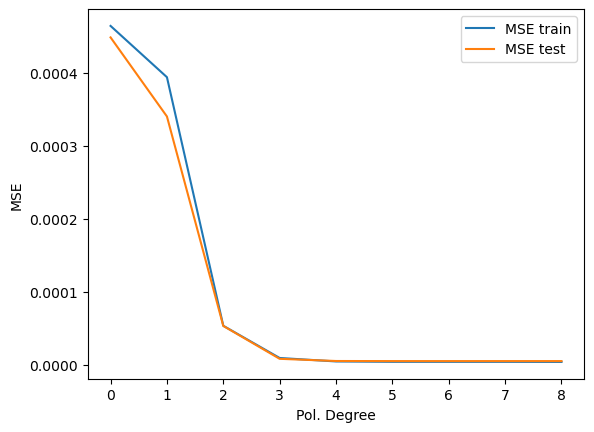

number of datapoints: 200 , test data percentage: 50.0 %


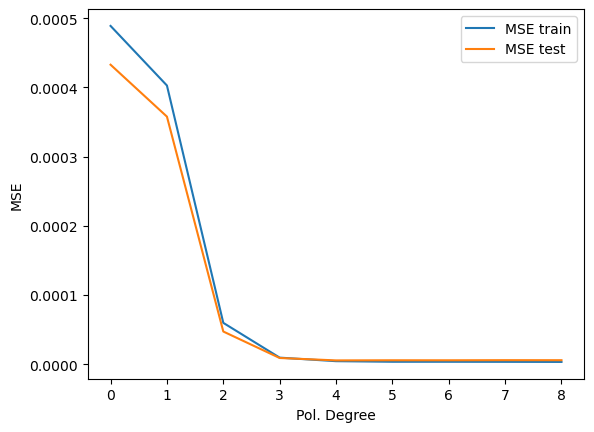

number of datapoints: 200 , test data percentage: 75.0 %


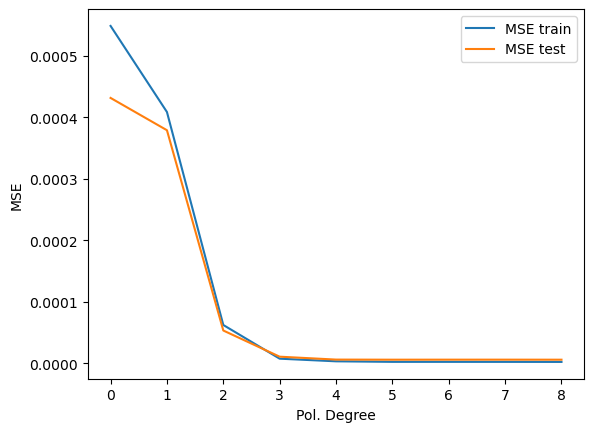

number of datapoints: 500 , test data percentage: 25.0 %


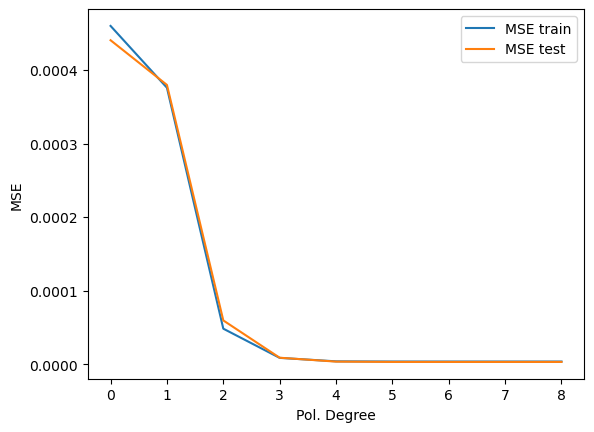

number of datapoints: 500 , test data percentage: 50.0 %


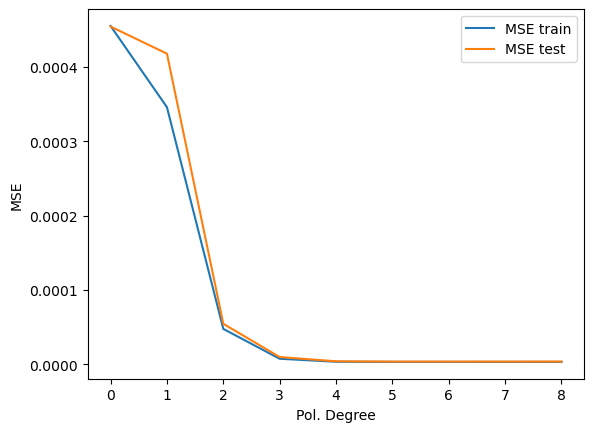

number of datapoints: 500 , test data percentage: 75.0 %


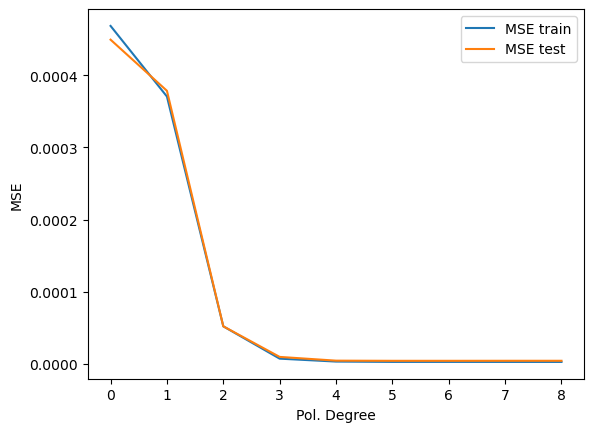

number of datapoints: 1000 , test data percentage: 25.0 %


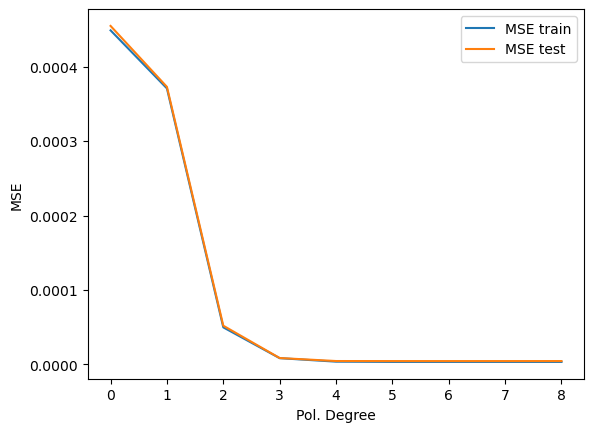

number of datapoints: 1000 , test data percentage: 50.0 %


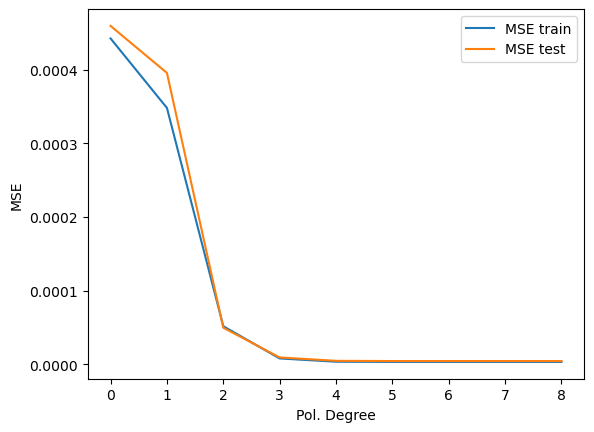

number of datapoints: 1000 , test data percentage: 75.0 %


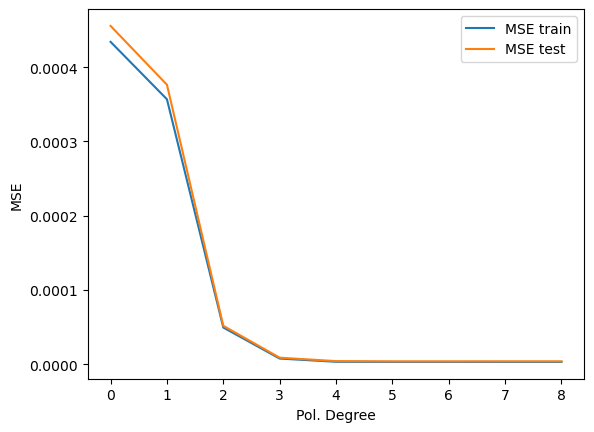

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

#varying the grid size:
for n in [200, 500, 1000]:    

    #maximum polynomial degree+1
    maxdegree = 9

    # Make data set: the longtitude values of the Northern Hemisphere in radiants.
    x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

    #Northern H. parameters
    s0 = 1
    s2 = -0.473
    a0 = 0.675
    a2 = -0.192
    i2 = -0.165

    #flux function (eqn. (14) from Stone_1978)
    y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

    #noisy flux function
    y_noisy = np.random.normal(y, abs(y*0.05)) 

    #varying the test/training data percentage
    for test_size in [0.25, 0.5, 0.75]:
        print('number of datapoints:', n,', test data percentage:', 100*test_size,'%')
        
        #MSE OLS analysis
        MSE_train = np.zeros(maxdegree)
        MSE_test = np.zeros(maxdegree)

        #Correlation OLS analysis
        R2_train=np.zeros(maxdegree)
        R2_test=np.zeros(maxdegree)

        polydegree = np.zeros(maxdegree) 

        for degree in range(maxdegree):
            #polynomial fit
            polydegree[degree]=degree
            poly = PolynomialFeatures(degree=degree)
            X = poly.fit_transform(x)
            
            n_iter=100
            
            MSE_train_iter=np.zeros(n_iter)
            MSE_test_iter=np.zeros(n_iter)
            
            R2_train_iter=np.zeros(n_iter)
            R2_test_iter=np.zeros(n_iter)
            
            #we iterrate 100 times to avoid erratic behvious. At least while the noise is turned off...
            for iter in range (n_iter):

                #splitting of the data
                X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=test_size, random_state=42) 
                
                #OLS regression, using matrix inversion
                OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train  
                #print(OLSbeta)
                ytilde = X_train @ OLSbeta 
                ypredict = X_test @ OLSbeta #<----I'm doing it here analytically, just to show what's inside the LinearRegression function. Doing a LinearRegression.predict at the test set yields the same results.
                #MSE prediction
                MSE_train_iter[iter]=MSE(y_train,ytilde) 
                MSE_test_iter[iter]=MSE(y_test,ypredict) 
                
                #Correlation prediction
                R2_train_iter[iter]=R2(y_train,ytilde) #train data, original vs predicted
                R2_test_iter[iter]=R2(y_test,ypredict) #test data original vs predicted

            #MSE prediction
            MSE_train[degree]=np.mean(MSE_train_iter) #train data, original vs predicted
            #print(MSE_train)
            MSE_test[degree]=np.mean(MSE_test_iter) #test data original vs predicted
            
            #Correlation prediction
            R2_train[degree]=np.mean(R2_train_iter) #train data, original vs predicted
            #print(R2_train)
            R2_test[degree]=np.mean(R2_test_iter) #test data original vs predicted
            
            if n==200 and test_size==0.25 and degree==6:
                print(OLSbeta)

        plt.plot(polydegree, MSE_train, label='MSE train')
        plt.plot(polydegree, MSE_test, label='MSE test')
        plt.xlabel('Pol. Degree')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

#        plt.plot(polydegree, R2_test, label='R2 Test')
#        plt.plot(polydegree, R2_train, label='R2 Train')
#        plt.xlabel('Pol. Degree')
#        plt.ylabel('R2')
#        plt.legend()
#        plt.show()

# Part b): Bias-variance trade-off and resampling techniques

number of datapoints: 200 , number of bootstraps: 1


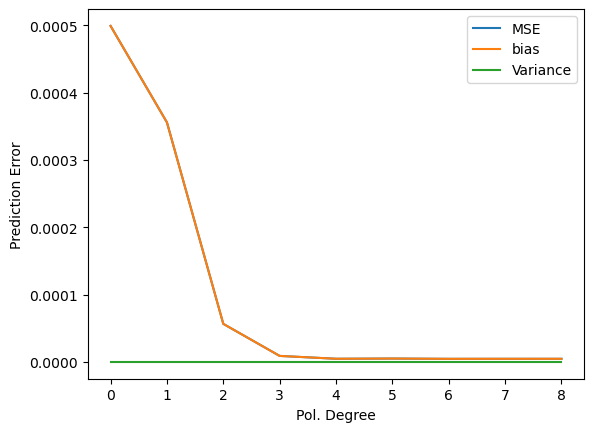

number of datapoints: 200 , number of bootstraps: 20
[0.00046315 0.         0.         0.         0.         0.
 0.         0.         0.        ]
[0.00046315 0.0003514  0.         0.         0.         0.
 0.         0.         0.        ]
[4.63149928e-04 3.51401406e-04 5.83583469e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[4.63149928e-04 3.51401406e-04 5.83583469e-05 9.74872250e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[4.63149928e-04 3.51401406e-04 5.83583469e-05 9.74872250e-06
 5.39801096e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[4.63149928e-04 3.51401406e-04 5.83583469e-05 9.74872250e-06
 5.39801096e-06 5.13602261e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[4.63149928e-04 3.51401406e-04 5.83583469e-05 9.74872250e-06
 5.39801096e-06 5.13602261e-06 5.21792826e-06 0.00000000e+00
 0.00000000e+00]
[4.63149928e-04 3.51401406e-04 5.83583469e-05 9.74872250e-06
 5.

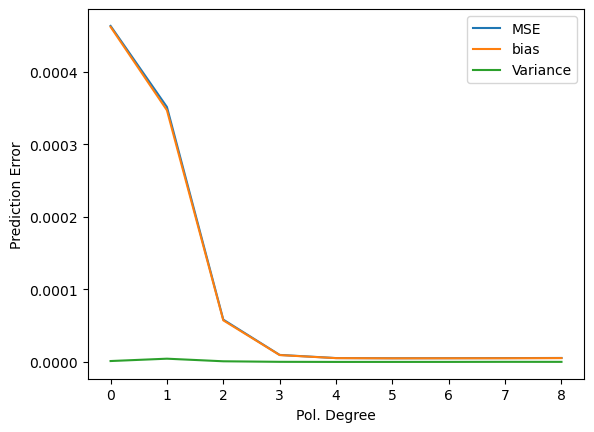

number of datapoints: 200 , number of bootstraps: 100


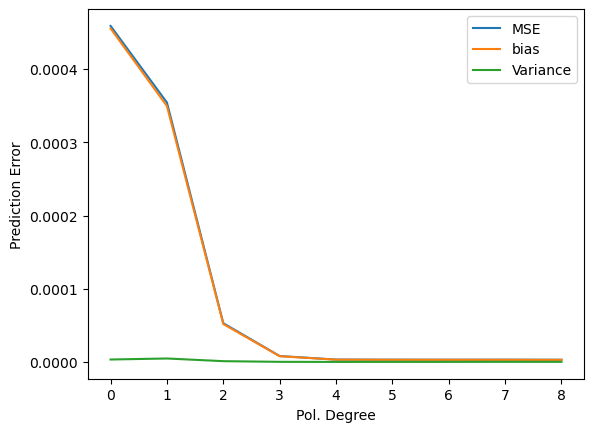

number of datapoints: 500 , number of bootstraps: 1


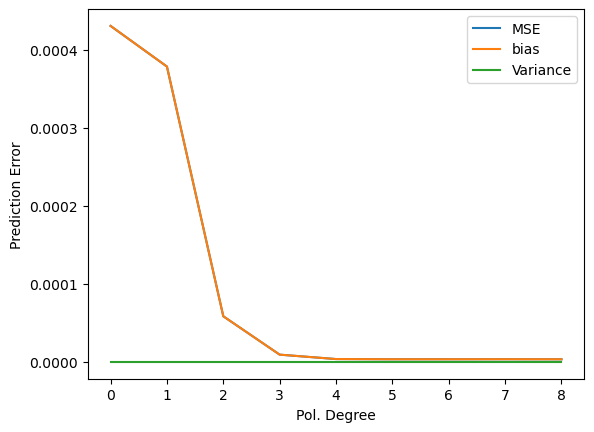

number of datapoints: 500 , number of bootstraps: 20


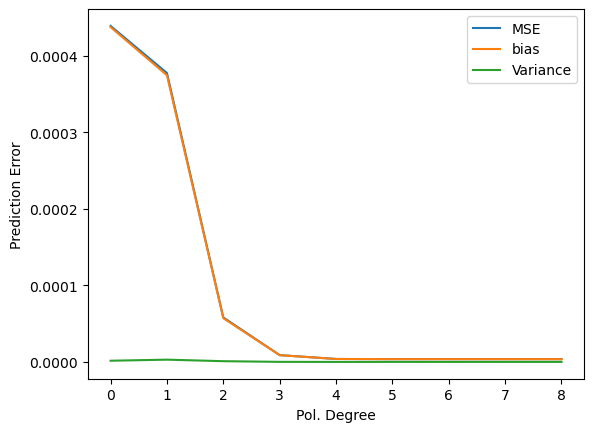

number of datapoints: 500 , number of bootstraps: 100


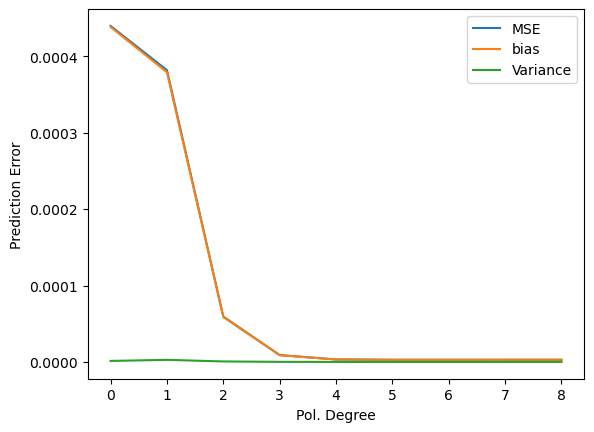

number of datapoints: 1000 , number of bootstraps: 1


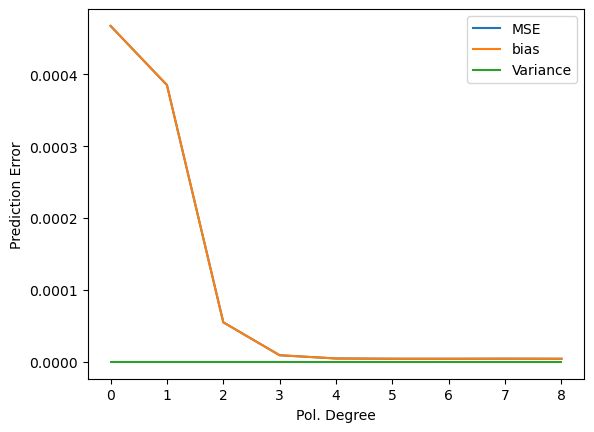

number of datapoints: 1000 , number of bootstraps: 20


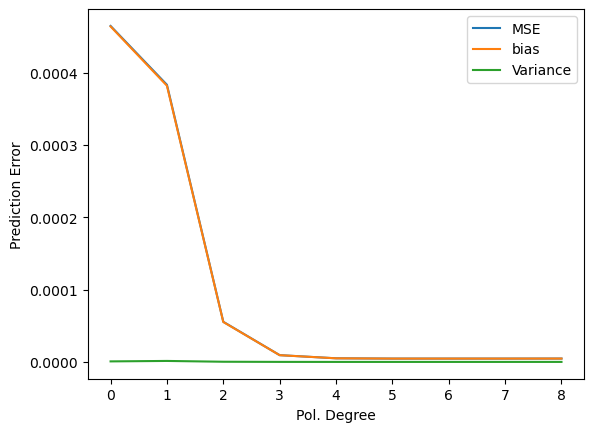

number of datapoints: 1000 , number of bootstraps: 100


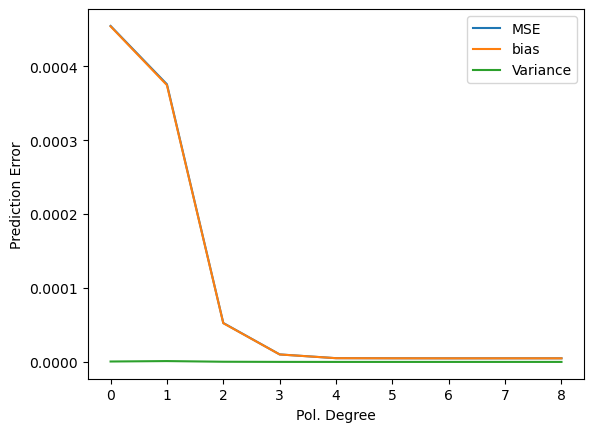

[4.63149928e-04 3.51401406e-04 5.83583469e-05 9.74872250e-06
 5.39801096e-06 5.13602261e-06 5.21792826e-06 5.34731107e-06
 5.53576618e-06]


In [9]:
#Bias Variance trade-off as a function of the model's complexity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

MSE_Bootstraps_compare = np.zeros(maxdegree) #to compare with the C-V code later

#varying the grid size:
for n in [200, 500, 1000]:    

    #maximum polynomial degree+1
    maxdegree = 9
    
    for n_bootstraps in [1, 20, 100]:
        print('number of datapoints:', n,', number of bootstraps:', n_bootstraps)

        # Make data set.
        x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

        #Northern H. parameters
        s0 = 1
        s2 = -0.473
        a0 = 0.675
        a2 = -0.192
        i2 = -0.165

        #flux function (eqn. (14) from Stone_1978)
        y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

        #noisy flux function
        y_noisy = np.random.normal(y, abs(y*0.05))

        MSE_Bootstrap = np.zeros(maxdegree)

        bias = np.zeros(maxdegree)
        variance = np.zeros(maxdegree)
        polydegree = np.zeros(maxdegree)

        #splitting of the data
        x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.25, random_state=42) 
                                                                                        # the fact that I'm resplitting the data for each degree loop shouldn't and doesn't affect the final value of MSE 
                                                                                        #I want to keep the splitting out of the loop because of the resampling. It doens't seem to affect the results, though...
        for degree in range(maxdegree):

            #polynomial fit
            polydegree[degree] = degree
            model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False)) #it's easier to use Python's Pol.fit and Lin. Regr. features for this part now. 
            ypredict = np.empty((y_test.shape[0], n_bootstraps))    

            for i in range(n_bootstraps):
                x_, y_ = resample(x_train, y_train)

                #applying Linear Regression to the training data set
                ypredict[:, i] = model.fit(x_, y_).predict(x_test).ravel()     

            MSE_Bootstrap[degree] = MSE(y_test, ypredict)
            
            if (n==200 and n_bootstraps == 20):
                MSE_Bootstraps_compare[degree]=MSE_Bootstrap[degree]#to compare with the C-V code later
                #print(MSE_Bootstraps_compare)
                
            bias[degree] = np.mean( (y_test - np.mean(ypredict, axis=1, keepdims=True))**2 )
            variance[degree] = np.mean( np.var(ypredict, axis=1, keepdims=True) )

        plt.plot(polydegree, MSE_Bootstrap, label='MSE')
        plt.plot(polydegree, bias, label='bias')
        plt.plot(polydegree, variance, label='Variance')
        plt.xlabel('Pol. Degree')
        plt.ylabel('Prediction Error')
        plt.legend()
        plt.show()
#print(MSE_Bootstraps_compare)

# Part c) Cross-validation as resampling techniques, adding more complexity

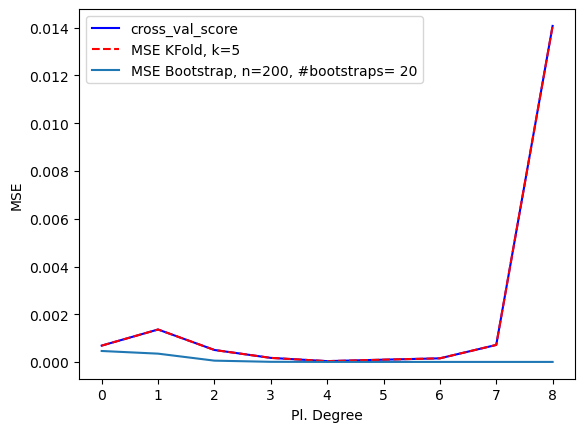

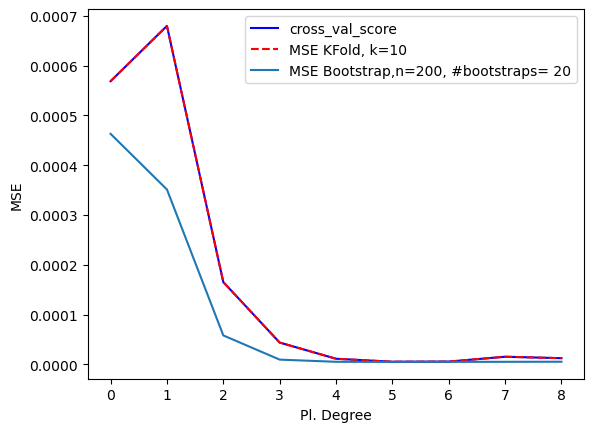

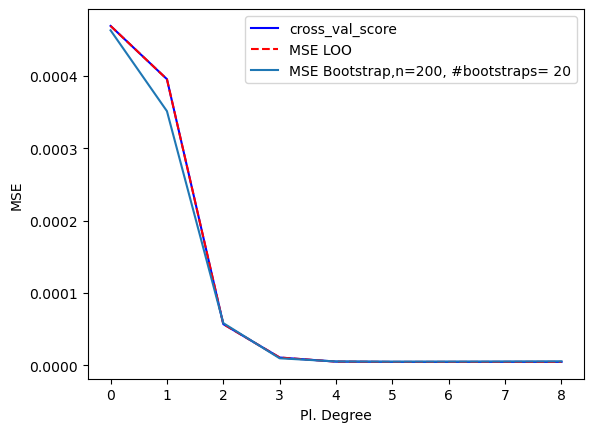

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 
#maximum polynomial degree+1
maxdegree = 9

# Make data set.
x = np.linspace(0,(np.pi)/2,n)#.reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05))

polydegree = np.zeros(maxdegree)
model = LinearRegression(fit_intercept=False)

# Number of folds
for k in [5, 10, n]: #n for the LOO-CV
    kfold = KFold(n_splits = k)

    # Perform the cross-validation to estimate MSE
    MSE_KFold = np.zeros((maxdegree, k))

    i = 0
    for degree in range(maxdegree):
        poly = PolynomialFeatures(degree=degree)
        polydegree[degree]=degree
        j = 0
        for train_inds, test_inds in kfold.split(x):
            xtrain = x[train_inds]
            ytrain = y_noisy[train_inds]

            xtest = x[test_inds]
            ytest = y_noisy[test_inds]

            Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
            model.fit(Xtrain, ytrain[:, np.newaxis])

            Xtest = poly.fit_transform(xtest[:, np.newaxis])
            ypred = model.predict(Xtest)

            MSE_KFold[i,j] = MSE(ytest[:, np.newaxis], ypred)

            j += 1
        i += 1

    estimated_mse_KFold = np.mean(MSE_KFold, axis = 1)

    # Cross-validation using cross_val_score from sklearn along with KFold

    estimated_mse_sklearn = np.zeros(maxdegree)
    i = 0
    for degree in range(maxdegree):
        polydegree[degree]=degree
        poly = PolynomialFeatures(degree=degree)
        X = poly.fit_transform(x[:, np.newaxis])
        estimated_mse_folds = cross_val_score(model, X, y_noisy[:, np.newaxis], scoring='neg_mean_squared_error', cv=k)

        # cross_val_score return an array containing the estimated NEGATIVE mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

        i += 1

    ## Plot    
        
    if k==5:          
        plt.figure()
        plt.plot(polydegree, estimated_mse_sklearn, 'b', label = 'cross_val_score')
        plt.plot(polydegree, estimated_mse_KFold, 'r--',  label = 'MSE KFold, k=5')
        plt.plot(polydegree, MSE_Bootstraps_compare, label='MSE Bootstrap, n=200, #bootstraps= 20')
        plt.xlabel('Pl. Degree')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    elif k==10:
        plt.figure()
        plt.plot(polydegree, estimated_mse_sklearn, 'b', label = 'cross_val_score')
        plt.plot(polydegree, estimated_mse_KFold, 'r--',  label = 'MSE KFold, k=10')
        plt.plot(polydegree, MSE_Bootstraps_compare, label='MSE Bootstrap,n=200, #bootstraps= 20')
        plt.xlabel('Pl. Degree')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    else:
        plt.figure()
        plt.plot(polydegree, estimated_mse_sklearn, 'b', label = 'cross_val_score')
        plt.plot(polydegree, estimated_mse_KFold, 'r--',  label = 'MSE LOO')
        plt.plot(polydegree, MSE_Bootstraps_compare, label='MSE Bootstrap,n=200, #bootstraps= 20')
        plt.xlabel('Pl. Degree')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

# Part d): Ridge Regression on the flux function with resampling

In [14]:
#pick up a polynomial degree this time: poly = PolynomialFeatures(degree=5) and play around with λ

In [ ]:
#Plain Ridge Regression

1


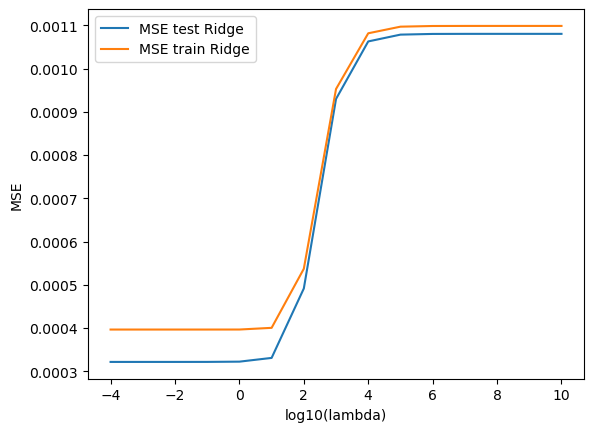

[[ 0.00120397]
 [ 0.13436901]
 [ 0.05673328]
 [ 0.02186089]
 [-0.69986763]
 [ 0.72148434]
 [-0.20518249]]
6


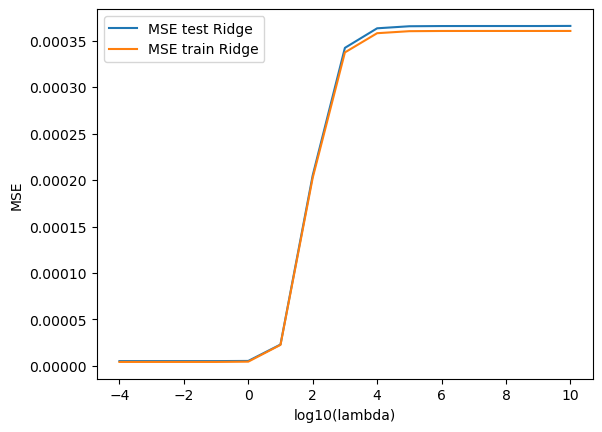

9


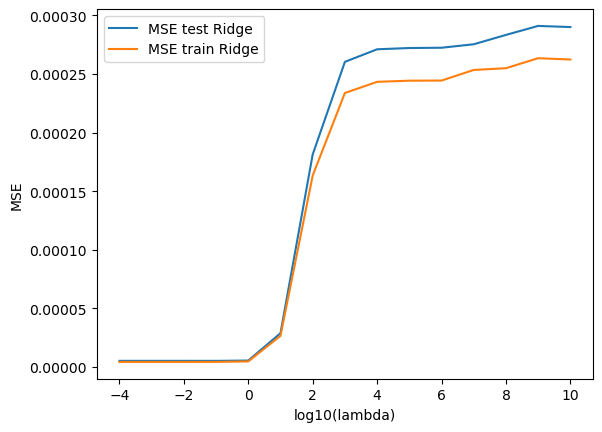

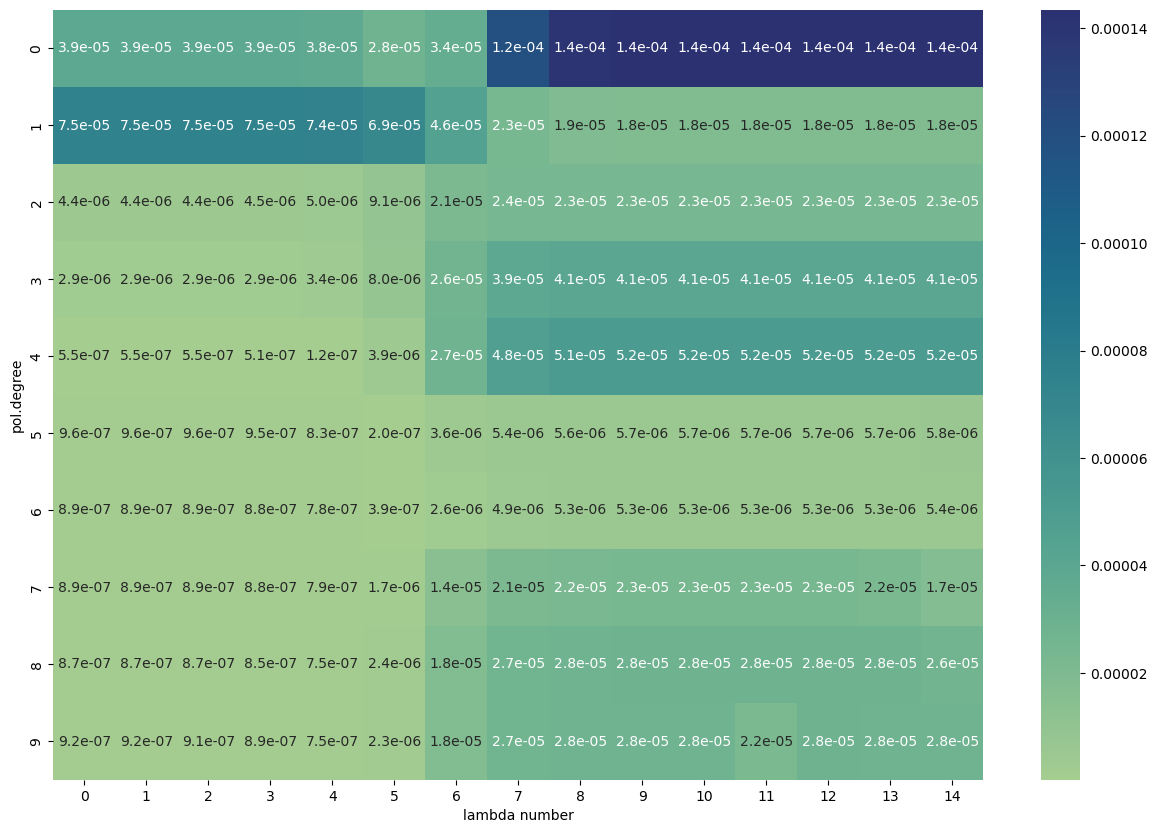

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

maxdegree=10
MSE_difference = np.zeros((maxdegree, nlambdas))

for degree in range(maxdegree):
    #polynomial fit
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(x)

    # Repeat now for Ridge regression and various values of the regularization parameter, λ
    I = np.eye(1,1)

    # Decide which values of lambda to use
    nlambdas = 15

    MSEPredict = np.zeros(nlambdas)
    MSEfit = np.zeros(nlambdas)
    
    R2Predict = np.zeros(nlambdas)
    R2fit = np.zeros(nlambdas)   
    
    
    lambdas = np.logspace(-4, 10, nlambdas)
    
    for i in range(nlambdas):
        
        lmb = lambdas[i]
        
        #splitting of the data
        X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.25, random_state=42)     

        Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train

        # Prediction
        ypredict = X_test @ Ridgebeta
        yfit = X_train @ Ridgebeta
       
        MSEPredict[i]=MSE(y_test,ypredict)
        #print('predict', MSEPredict)
        MSEfit[i]=MSE(y_train,yfit) 
        #print('fit', MSEfit)
        R2Predict[i]= R2(y_test,ypredict)
        R2fit[i]=R2(y_train,yfit)

        MSE_difference[degree, i]= np.abs(MSEPredict[i]-MSEfit[i])
        #print(MSE_difference)
        
        if i==5 and degree==6:
            print(Ridgebeta)

    if degree in [1, 6, 9]:    
        #I'm plotting the prediction
        print(degree)
        plt.figure()
        #plt.ylim([0, 0.00125])
        plt.plot(np.log10(lambdas), MSEPredict, label = 'MSE test Ridge')
        plt.plot(np.log10(lambdas), MSEfit, label = 'MSE train Ridge')
        plt.xlabel('log10(lambda)')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

#    plt.figure()
#    plt.plot(np.log10(lambdas), R2Predict, label = 'R2 test Ridge')
#    plt.plot(np.log10(lambdas), R2fit, label = 'R2 train Ridge')
#    plt.xlabel('log10(lambda)')
#    plt.ylabel('MSE')
#    plt.legend()
#    plt.show()

#print(MSE_difference)

pd.DataFrame(MSE_difference)
mse_difference = pd.DataFrame(MSE_difference)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_difference, annot=True,  fmt="1.1e", cmap="crest")
plt.xlabel("lambda number")
plt.ylabel("pol.degree")
plt.show()

In [17]:
#Bootstraps:

polynomial degree: 1 , number of bootstraps: 1


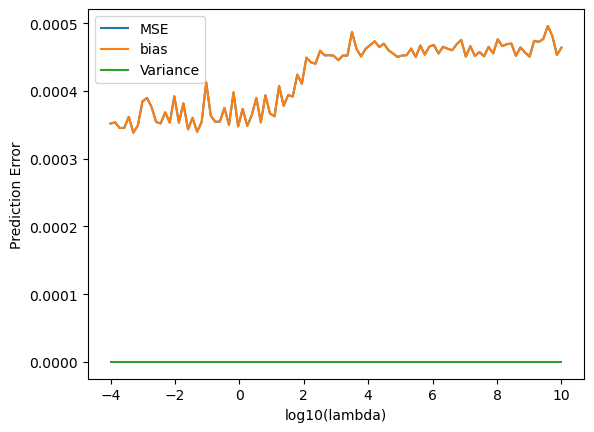

polynomial degree: 1 , number of bootstraps: 20


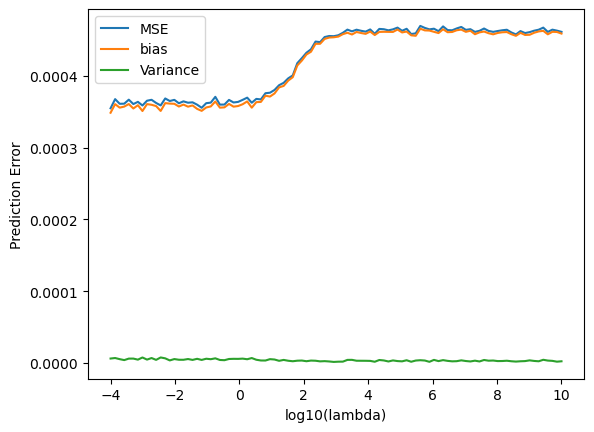

polynomial degree: 1 , number of bootstraps: 100


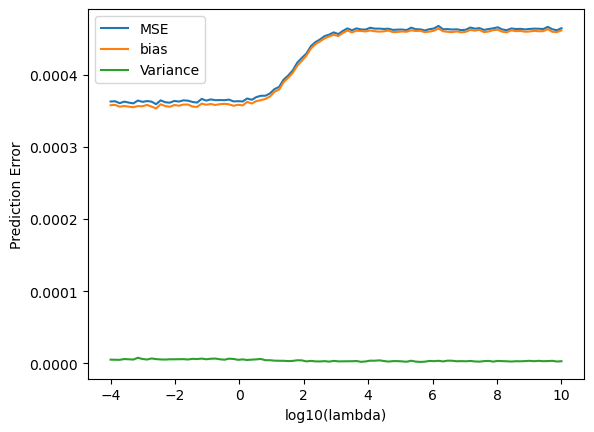

polynomial degree: 6 , number of bootstraps: 1


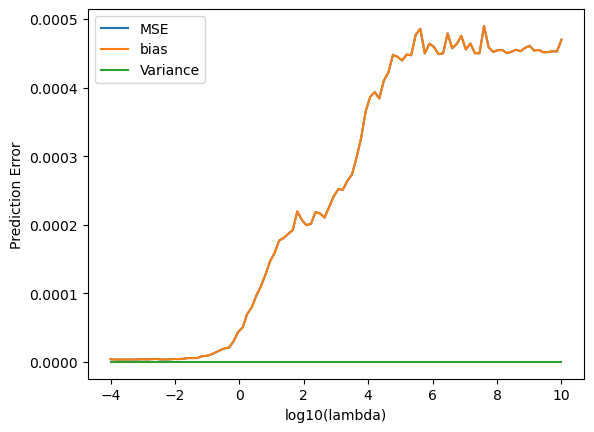

polynomial degree: 6 , number of bootstraps: 20


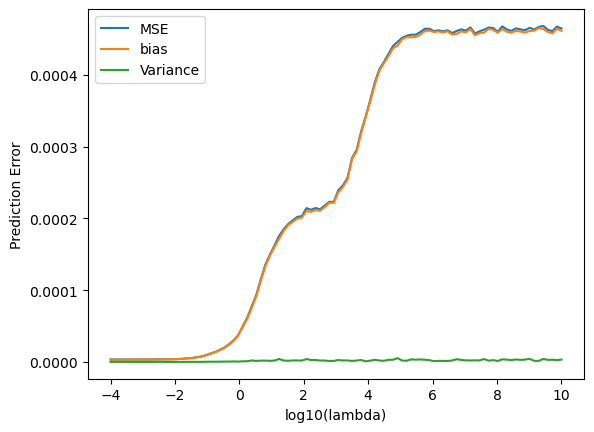

polynomial degree: 6 , number of bootstraps: 100


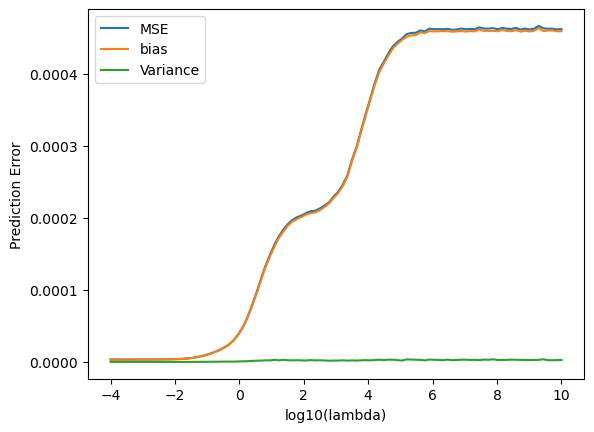

polynomial degree: 9 , number of bootstraps: 1


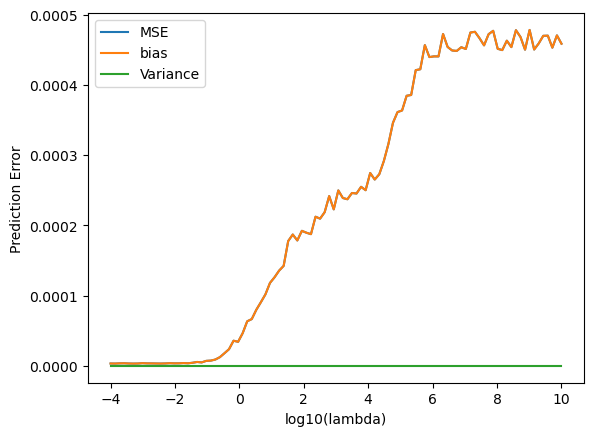

polynomial degree: 9 , number of bootstraps: 20


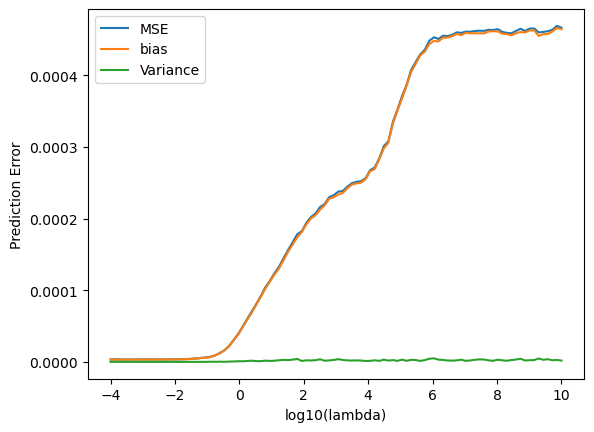

polynomial degree: 9 , number of bootstraps: 100


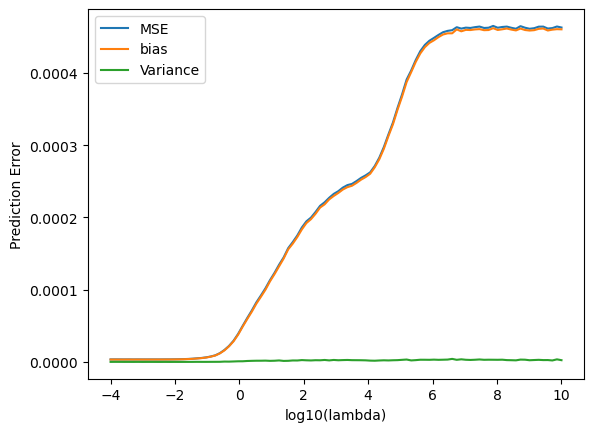

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

MSE_Bootstrap_compare_d1=np.zeros(nlambdas)
MSE_Bootstrap_compare_d6=np.zeros(nlambdas)
MSE_Bootstrap_compare_d9=np.zeros(nlambdas)

for degree in [1, 6, 9]:

    #Polynomial fit but now for degree=ct.=6
    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(x)

    #splitting of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.25, random_state=42) 

    # Decide which values of lambda to use
    nlambdas = 100
    lambdas = np.logspace(-4, 10, nlambdas)

    #number of bootstrap samples
    #n_boostraps = 15 
    
    
    for n_bootstraps in [1, 20, 100]:
        print('polynomial degree:', degree,', number of bootstraps:', n_bootstraps)
        
        MSE_Bootstrap = np.zeros(nlambdas)
        bias = np.zeros(nlambdas)
        variance = np.zeros(nlambdas)

        for i in range(nlambdas):
            lmb = lambdas[i]
            model = Ridge(alpha = lmb)
            ypredict = np.empty((y_test.shape[0], n_bootstraps))    

            for j in range(n_bootstraps):
                x_, y_ = resample(X_train, y_train)

                #applying Linear Regression to the training data set
                ypredict[:, j] = model.fit(x_, y_).predict(X_test).ravel()       

            MSE_Bootstrap[i] = MSE(y_test, ypredict)
            
            if n_bootstraps==20 and degree==1:
                MSE_Bootstrap_compare_d1=MSE_Bootstrap
            elif n_bootstraps==20 and degree==6:
                MSE_Bootstrap_compare_d6=MSE_Bootstrap
            elif n_bootstraps==20 and degree==9:
                MSE_Bootstrap_compare_d9=MSE_Bootstrap
                
                
            bias[i] = np.mean( (y_test - np.mean(ypredict, axis=1, keepdims=True))**2 )
            variance[i] = np.mean( np.var(ypredict, axis=1, keepdims=True) )

        plt.plot(np.log10(lambdas), MSE_Bootstrap, label='MSE')
        plt.plot(np.log10(lambdas), bias, label='bias')
        plt.plot(np.log10(lambdas), variance, label='Variance')
        plt.xlabel('log10(lambda)')
        plt.ylabel('Prediction Error')
        plt.legend()
        plt.show()

In [19]:
#C-V:

pol. degree= 1 k= 5


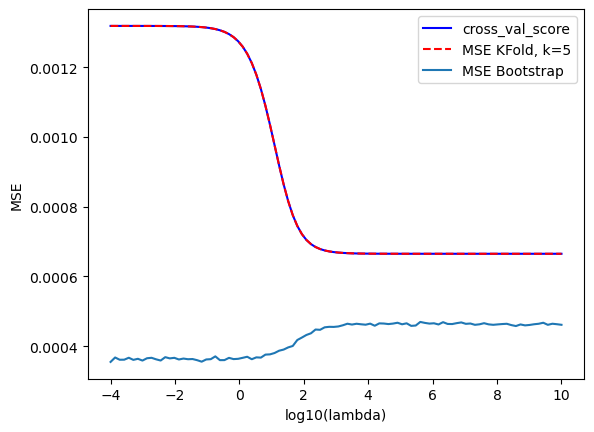

pol. degree= 1 k= 10


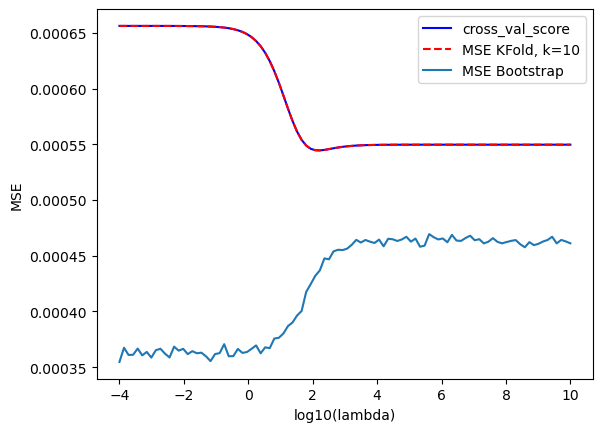

pol. degree= 1 k= 200


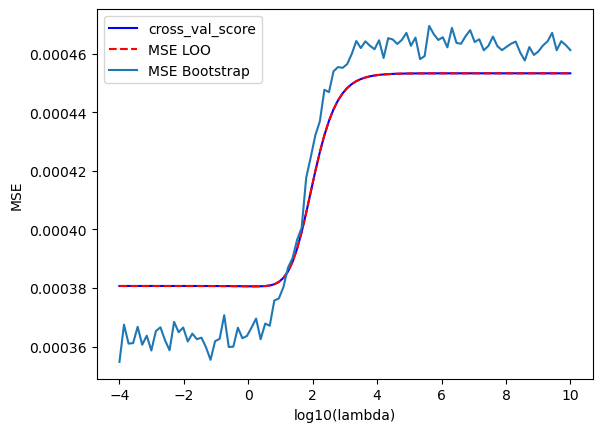

pol. degree= 6 k= 5


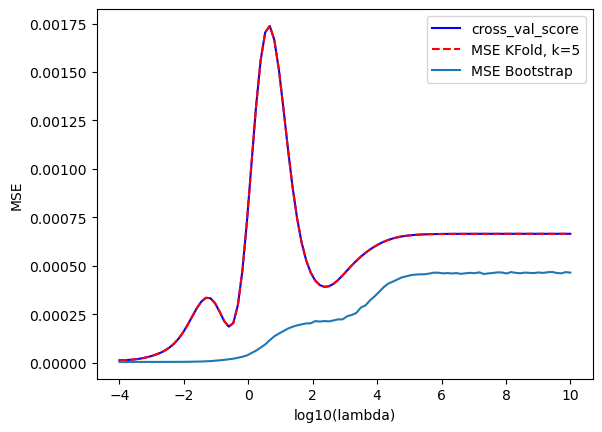

pol. degree= 6 k= 10


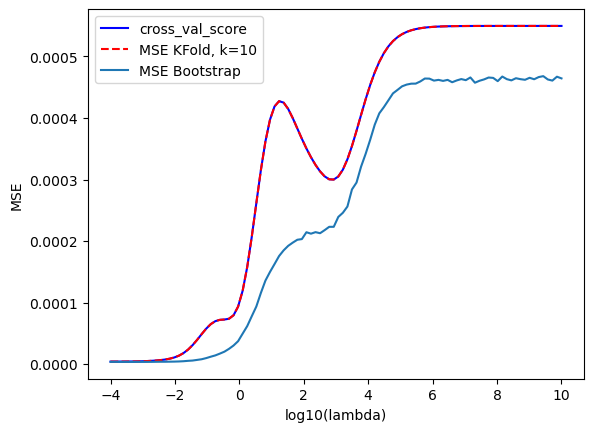

pol. degree= 6 k= 200


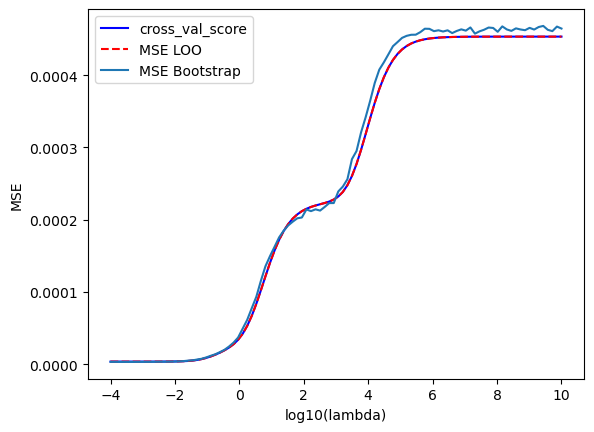

pol. degree= 9 k= 5


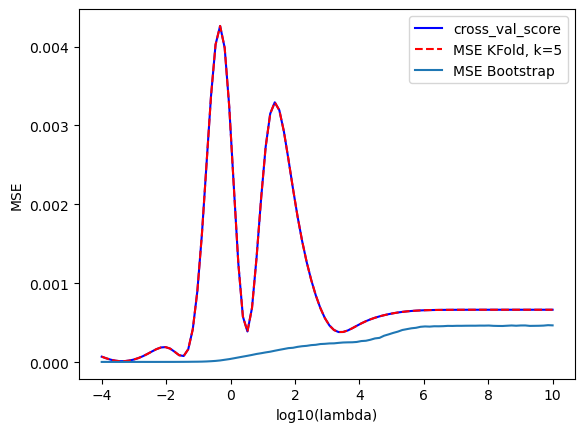

pol. degree= 9 k= 10


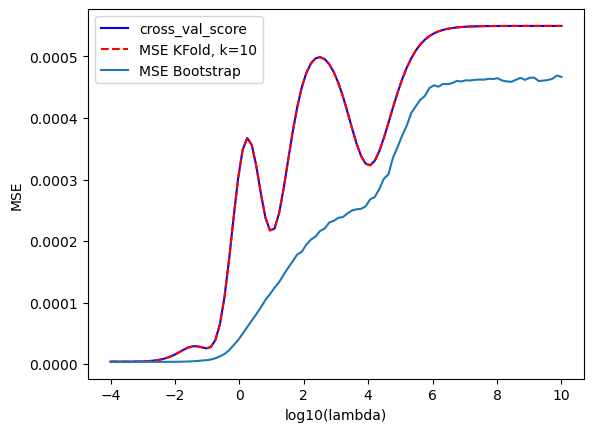

pol. degree= 9 k= 200


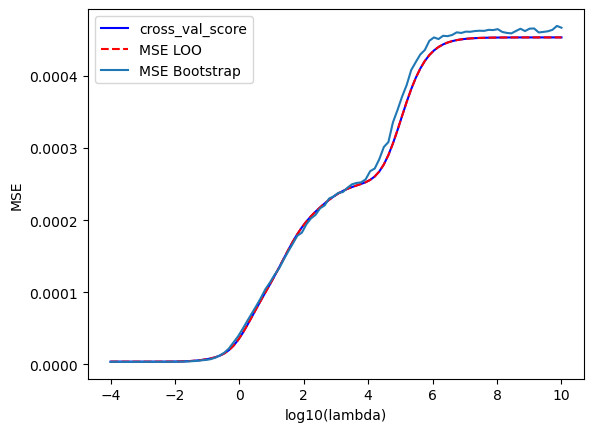

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n)#.reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05))

for degree in [1, 6, 9]:
    poly = PolynomialFeatures(degree=degree)

    # Decide which values of lambda to use
    nlambdas = 100
    lambdas = np.logspace(-4, 10, nlambdas)

    for k in [5, 10, n]: #n for LOO C-V
        print('pol. degree=', degree, 'k=', k)
        kfold = KFold(n_splits = k)

        # Perform the cross-validation to estimate MSE
        MSE_KFold = np.zeros((nlambdas, k))

        c = 0
        for i in range(nlambdas):
            lmb = lambdas[i]
            model = Ridge(alpha = lmb)
            j = 0
            for train_inds, test_inds in kfold.split(x):
                xtrain = x[train_inds]
                ytrain = y_noisy[train_inds]

                xtest = x[test_inds]
                ytest = y_noisy[test_inds]

                Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
                model.fit(Xtrain, ytrain[:, np.newaxis])

                Xtest = poly.fit_transform(xtest[:, np.newaxis])
                ypred = model.predict(Xtest)

                MSE_KFold[c,j] = MSE(ytest[:, np.newaxis], ypred)

                j += 1
            c += 1

        estimated_mse_KFold = np.mean(MSE_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

        estimated_mse_sklearn = np.zeros(nlambdas)

        d = 0
        for i in range(nlambdas):
            lmb = lambdas[i]
            model = Ridge(alpha = lmb)
            X = poly.fit_transform(x[:, np.newaxis])
            estimated_mse_folds = cross_val_score(model, X, y_noisy[:, np.newaxis], scoring='neg_mean_squared_error', cv=k)

            # cross_val_score return an array containing the estimated negative mse for every fold.
            # we have to the the mean of every array in order to get an estimate of the mse of the model
            estimated_mse_sklearn[d] = np.mean(-estimated_mse_folds)

            d += 1

        ## Plot    

        if k==5:          
            plt.figure()
            plt.plot(np.log10(lambdas), estimated_mse_sklearn, 'b', label = 'cross_val_score')
            plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--',  label = 'MSE KFold, k=5')
            if degree==1:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d1, label='MSE Bootstrap')
            elif degree==6:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d6, label='MSE Bootstrap')
            elif degree==9:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d9, label='MSE Bootstrap')
                 
            plt.xlabel('log10(lambda)')
            plt.ylabel('MSE')
            plt.legend()
            plt.show()
        elif k==10:
            plt.figure()
            plt.plot(np.log10(lambdas), estimated_mse_sklearn, 'b', label = 'cross_val_score')
            plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--',  label = 'MSE KFold, k=10')
            if degree==1:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d1, label='MSE Bootstrap')
            elif degree==6:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d6, label='MSE Bootstrap')
            elif degree==9:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d9, label='MSE Bootstrap')
            plt.xlabel('log10(lambda)')
            plt.ylabel('MSE')
            plt.legend()
            plt.show()
        else:
            plt.figure()
            plt.plot(np.log10(lambdas), estimated_mse_sklearn, 'b', label = 'cross_val_score')
            plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--',  label = 'MSE LOO')
            if degree==1:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d1, label='MSE Bootstrap')
            elif degree==6:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d6, label='MSE Bootstrap')
            elif degree==9:
                plt.plot(np.log10(lambdas), MSE_Bootstrap_compare_d9, label='MSE Bootstrap')
            plt.xlabel('log10(lambda)')
            plt.ylabel('MSE')
            plt.legend()
            plt.show()

# Part e): Lasso Regression on the flux function with resampling

In [22]:
#Plain Lasso Regression

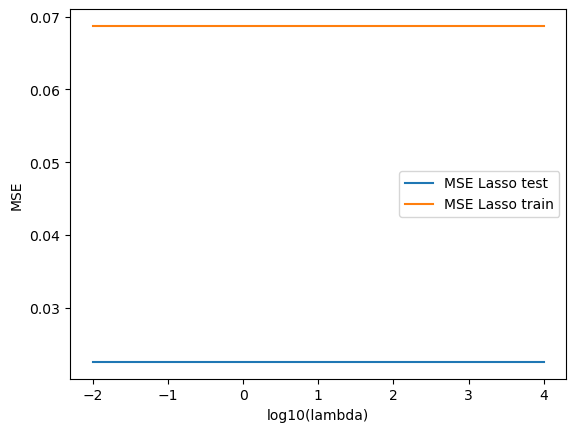

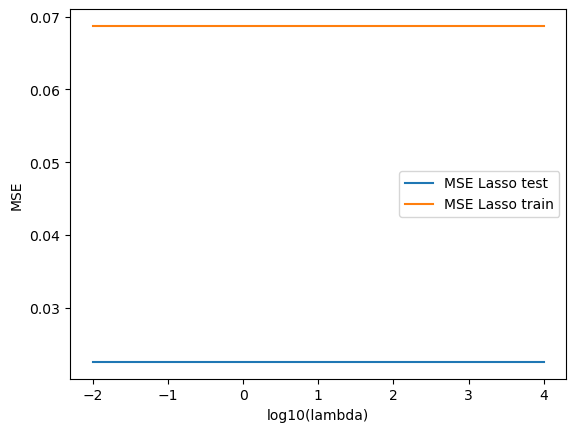

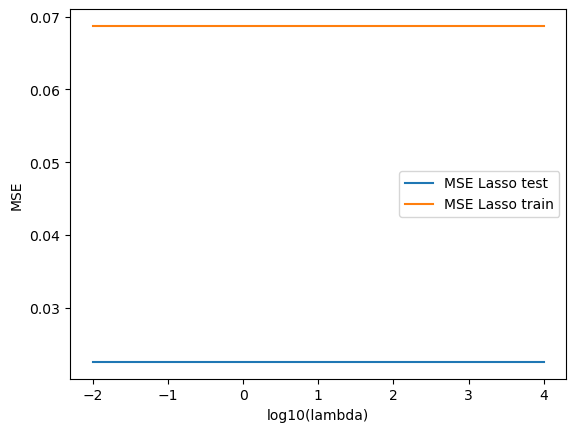

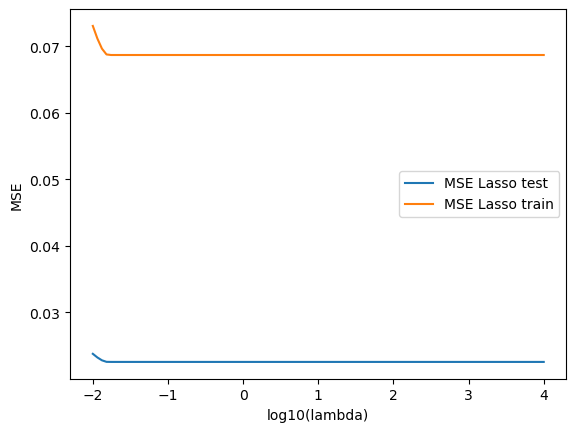

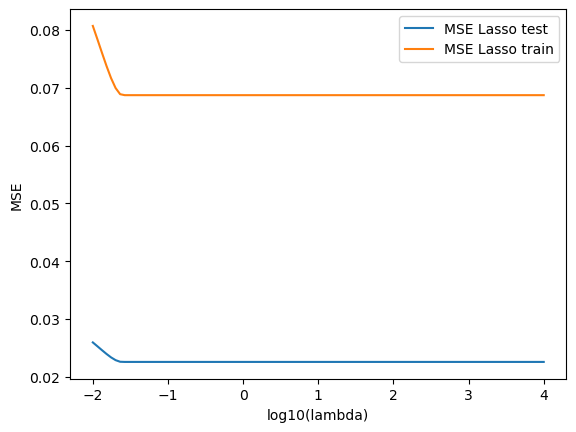

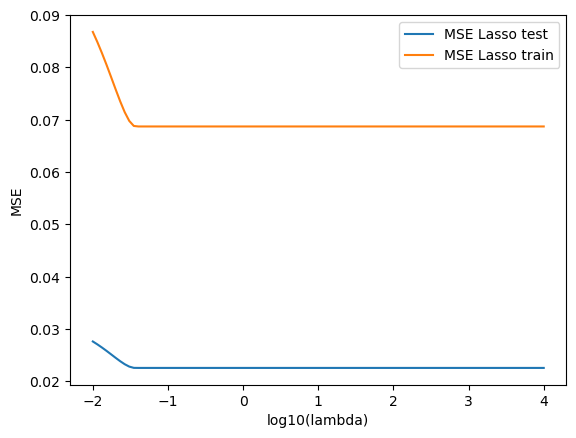

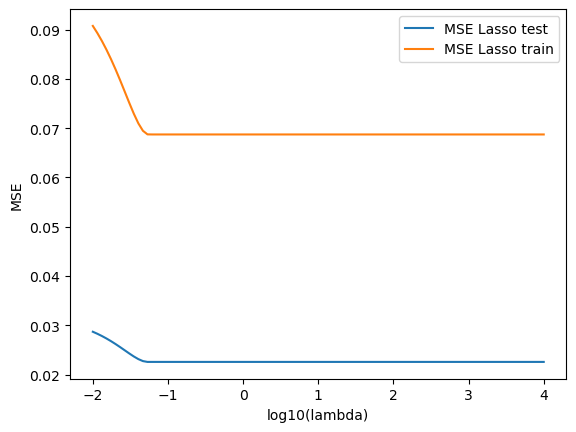

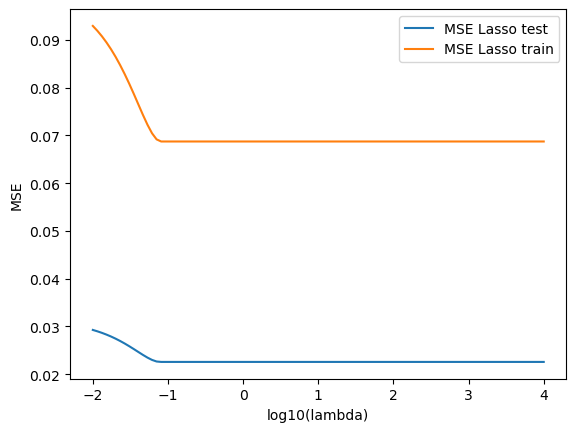

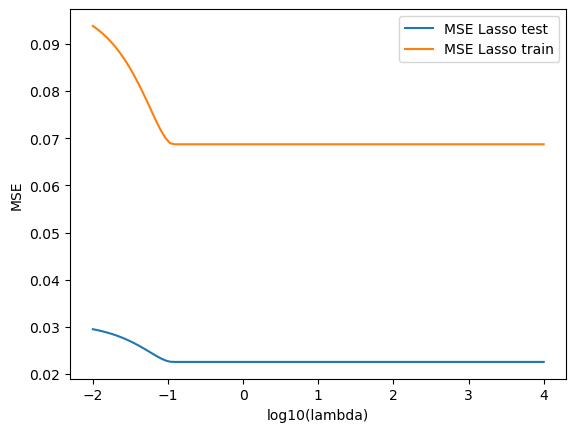

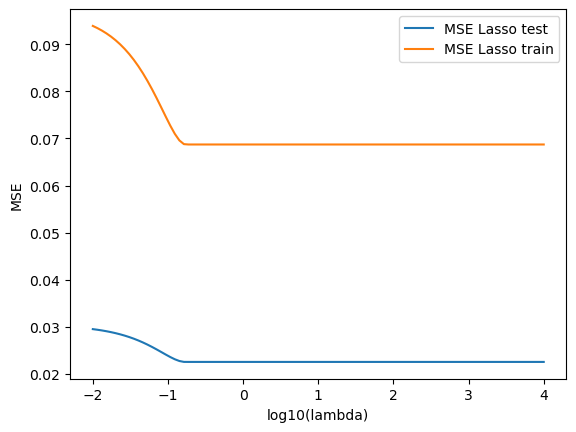

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

for degree in range (maxdegree):

    poly = PolynomialFeatures(degree=degree)
    X = poly.fit_transform(x)

    #splitting of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.25, random_state=42) 

    # Decide which values of lambda to use
    nlambdas = 100

    MSEPredict = np.zeros(nlambdas)
    MSEfit = np.zeros(nlambdas)
    
    lambdas = np.logspace(-2, 4, nlambdas)

    for i in range(nlambdas):
        lmb = lambdas[i]
        model= linear_model.Lasso(lmb)
        model.fit(X_train,y_train)

        ypredict = model.predict(X_test)
        MSEPredict[i] = MSE(y_test,ypredict)

        yfit = model.predict(X_train)
        MSEfit[i] = MSE(y_train,yfit)

    #I'm plotting the prediction
    plt.figure()
    plt.plot(np.log10(lambdas), MSEPredict, label = 'MSE Lasso test')
    plt.plot(np.log10(lambdas), MSEfit, label = 'MSE Lasso train')
    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()


In [24]:
#Bootstrap-  B-V trade-off

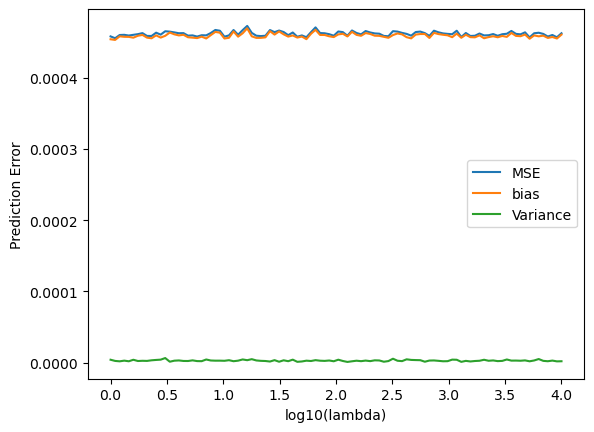

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#Polynomial fir but now for degree=ct.=5
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(x)
    
#splitting of the data
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.25, random_state=42) 

# Decide which values of lambda to use
nlambdas = 100

#number of bootstrap samples
n_boostraps = 20 

lambdas = np.logspace(0, 4, nlambdas)

MSE_Bootstrap = np.zeros(nlambdas)
bias = np.zeros(nlambdas)
variance = np.zeros(nlambdas)

for i in range(nlambdas):
    lmb = lambdas[i]
    model = linear_model.Lasso(lmb)
    ypredict = np.empty((y_test.shape[0], n_boostraps))    

    for j in range(n_boostraps):
        x_, y_ = resample(X_train, y_train)
                
        #applying Linear Regression to the training data set
        ypredict[:, j] = model.fit(x_, y_).predict(X_test).ravel()       

    MSE_Bootstrap[i] = MSE(y_test, ypredict)
    bias[i] = np.mean( (y_test - np.mean(ypredict, axis=1, keepdims=True))**2 )
    variance[i] = np.mean( np.var(ypredict, axis=1, keepdims=True) )

plt.plot(np.log10(lambdas), MSE_Bootstrap, label='MSE')
plt.plot(np.log10(lambdas), bias, label='bias')
plt.plot(np.log10(lambdas), variance, label='Variance')
plt.xlabel('log10(lambda)')
plt.ylabel('Prediction Error')
plt.legend()
plt.show()

In [26]:
#Cross Validation

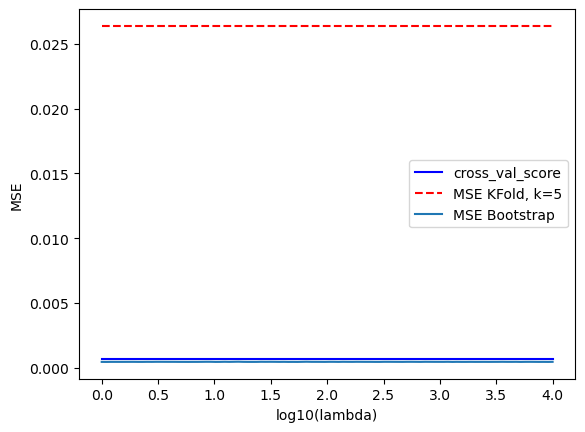

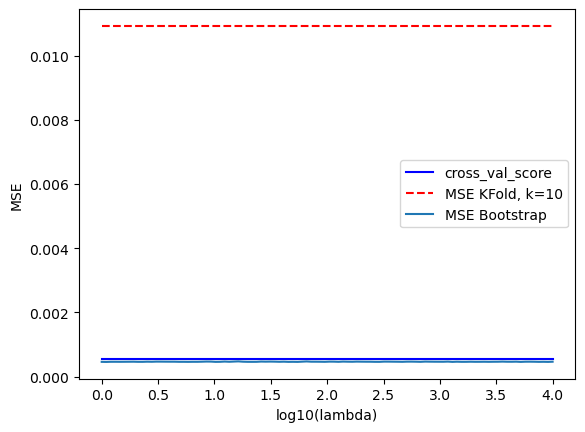

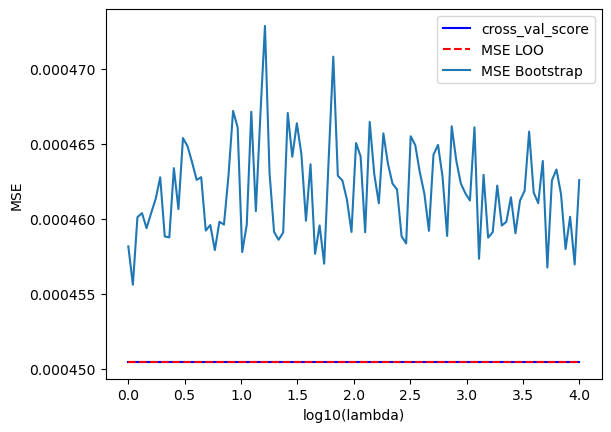

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n)#.reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 


#Polynomial fir but now for degree=ct.=5
poly = PolynomialFeatures(degree=5)

# Decide which values of lambda to use
nlambdas = 100
lambdas = np.logspace(0, 4, nlambdas)

for k in [5, 10, n]:
    kfold = KFold(n_splits = k)

    # Perform the cross-validation to estimate MSE
    MSE_KFold = np.zeros((nlambdas, k))

    i = 0
    for i in range(nlambdas):
        lmb = lambdas[i]
        model = linear_model.Lasso(lmb)
        j = 0
        for train_inds, test_inds in kfold.split(x):
            xtrain = x[train_inds]
            ytrain = y_noisy[train_inds]

            xtest = x[test_inds]
            ytest = y_noisy[test_inds]

            Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
            model.fit(Xtrain, ytrain[:, np.newaxis])

            Xtest = poly.fit_transform(xtest[:, np.newaxis])
            ypred = model.predict(Xtest)

            MSE_KFold[i,j] = MSE(ytest[:, np.newaxis], ypred)

            j += 1
        i += 1

    estimated_mse_KFold = np.mean(MSE_KFold, axis = 1)

    ## Cross-validation using cross_val_score from sklearn along with KFold

    # kfold is an instance initialized above as:
    # kfold = KFold(n_splits = k)

    estimated_mse_sklearn = np.zeros(nlambdas)
    
    d = 0
    for i in range(nlambdas):
        lmb = lambdas[i]
        model = linear_model.Lasso(lmb)
        X = poly.fit_transform(x[:, np.newaxis])
        estimated_mse_folds = cross_val_score(model, X, y_noisy[:, np.newaxis], scoring='neg_mean_squared_error', cv=k)

        # cross_val_score return an array containing the estimated negative mse for every fold.
        # we have to the the mean of every array in order to get an estimate of the mse of the model
        estimated_mse_sklearn[d] = np.mean(-estimated_mse_folds)

        d += 1

    ## Plot    
        
    if k==5:          
        plt.figure()
        plt.plot(np.log10(lambdas), estimated_mse_sklearn, 'b', label = 'cross_val_score')
        plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--',  label = 'MSE KFold, k=5')
        plt.plot(np.log10(lambdas), MSE_Bootstrap, label='MSE Bootstrap')
        plt.xlabel('log10(lambda)')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    elif k==10:
        plt.figure()
        plt.plot(np.log10(lambdas), estimated_mse_sklearn, 'b', label = 'cross_val_score')
        plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--',  label = 'MSE KFold, k=10')
        plt.plot(np.log10(lambdas), MSE_Bootstrap, label='MSE Bootstrap')
        plt.xlabel('log10(lambda)')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    else:
        plt.figure()
        plt.plot(np.log10(lambdas), estimated_mse_sklearn, 'b', label = 'cross_val_score')
        plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--',  label = 'MSE LOO')
        plt.plot(np.log10(lambdas), MSE_Bootstrap, label='MSE Bootstrap')
        plt.xlabel('log10(lambda)')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

# Part f): Write your own Stochastic Gradient Descent code, first step

In [40]:
#1i) Plain gradient descent with a fixed learning rate (simple tuning)for OLS 

method MSE: [3.76041508e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] inverse Hessian MSE: [3.52962415e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
method MSE: [3.76041508e-06 3.67168021e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] inverse Hessian MSE: [3.52962415e-06 3.52962415e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
method MSE: [3.76041508e-06 3.67168021e-06 3.63147103e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] inverse Hessian MSE: [3.52962415e-06 3.52962415e-06 3.52962415e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.000000

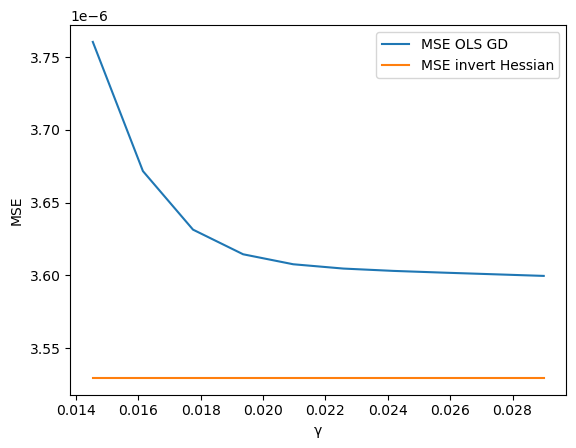

β inverse: [[-0.00069305]
 [ 0.18460648]
 [-0.15641294]
 [ 0.18991508]
 [-0.41619479]
 [ 0.31016538]
 [-0.07134852]] β OLS: [[ 0.00035319]
 [ 0.15713843]
 [ 0.01281086]
 [-0.2285124 ]
 [ 0.07092278]
 [ 0.04301587]
 [-0.01568517]]


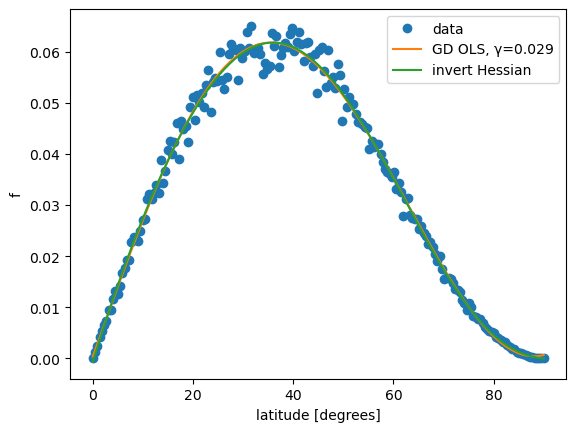

execution time= 3.075599670410156e-05 s


In [10]:
# Importing various packages
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from random import random, seed
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

beta_OLS = np.random.randn(degree+1,1)
beta_inv = np.random.randn(degree+1,1)

Niterations = 1000000                                        #<----I need A LOT more iterrations to get an accurate result FOR OLS!! inv(H) works perfectly very easily.
ngammas = 10                                         
gammas = np.linspace(1.0/np.max(EigValues), 0.029, ngammas) #<---------learning rate should be between [1/maxeigenv(H), 1/mineigenv(H)]

MSE_OLS_GD = np.zeros(ngammas)
MSE_inv_GD = np.zeros(ngammas)

for g in range(ngammas):
    gamma = gammas[g]
    #print(gamma)

    for iter in range(Niterations):
        gradient_OLS = (2.0/n)*X.T @ (X @ beta_OLS-y_noisy)
        gradient_inv = (2.0/n)*X.T @ (X @ beta_inv-y_noisy) #(I'm using the OLS gradient, because if I use the Ridge one, it overflows)
        beta_OLS -= gamma*gradient_OLS
        beta_inv -= invH @ gradient_inv
        
    y_OLS_GD = X @ beta_OLS
    
    y_inv = X @ beta_inv

    MSE_OLS_GD[g]= MSE(y_noisy, y_OLS_GD)
    MSE_inv_GD[g]= MSE(y_noisy, y_inv)
    
    print('method MSE:',  MSE_OLS_GD, 'inverse Hessian MSE:', MSE_inv_GD)
    
plt.figure()
plt.plot(gammas, MSE_OLS_GD, label='MSE OLS GD')
plt.plot(gammas, MSE_inv_GD, label='MSE invert Hessian')
plt.xlabel('γ')
plt.ylabel('MSE')
plt.legend()
plt.show()

#for the last value of gamma:
print('β inverse:', beta_inv, 'β OLS:', beta_OLS)
ypredict_OLS_GD=X @ beta_OLS
yinv = X @ beta_inv

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, ypredict_OLS_GD, label='GD OLS, γ=0.029')
plt.plot(x*180/np.pi, yinv,  label='invert Hessian')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#1ii) Plain gradient descent with a fixed learning rate (simple tuning) for Ridge 

(array([0]), array([3]))
method MSE= 4.105208091435417e-06


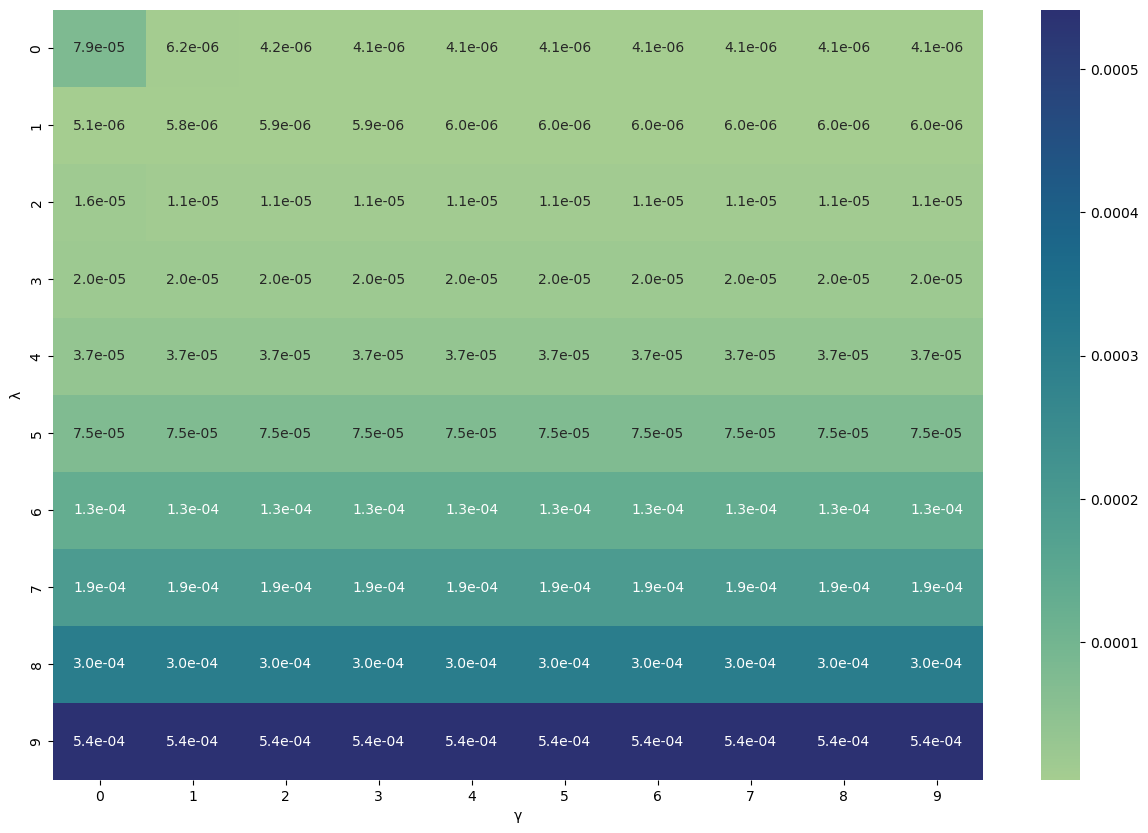

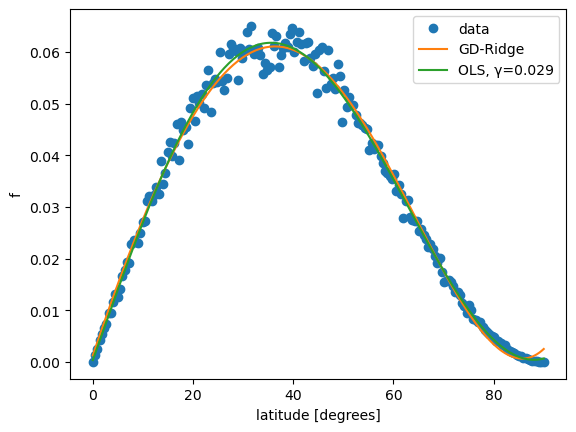

execution time= 2.574920654296875e-05 s


In [76]:
#Ridge parameter
nlambdas = 10 
lambdas = np.logspace(-4, 0, nlambdas) 

#leaning rate constants
Niterations = 100000  
ngammas = 10 
gammas = np.linspace(1.0/np.max(EigValues), 0.029, ngammas)
y_Ridge_GD_array= np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_GD = np.zeros((nlambdas, ngammas))

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    
    
    for g in range(ngammas):
        gamma = gammas[g]
        
        for iter in range(Niterations):
            gradient_Ridge = (2.0/n)*X.T @ (X @ (beta_Ridge)-y_noisy)+2*lmbda*beta_Ridge
            beta_Ridge -= gamma*gradient_Ridge 
            
        y_Ridge_GD = X @ beta_Ridge 
        
        y_Ridge_GD_array[l, g]=y_Ridge_GD
            
        MSE_Ridge_GD[l, g]= MSE(y_noisy, y_Ridge_GD)  
        
#finding the minimum value of the MSE
MSE_Ridge_GD_optimal = np.min(MSE_Ridge_GD)
conditon = (MSE_Ridge_GD == MSE_Ridge_GD_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

#saving the y that gives the optimal MSE
y_Ridge_GD_optimal= y_Ridge_GD_array[result]
y_Ridge_GD_optimal=(y_Ridge_GD_optimal[0])
#print(y_Ridge_GD_optimal)

print('method MSE=', MSE_Ridge_GD_optimal)

pd.DataFrame(MSE_Ridge_GD)
mse_data_ridge = pd.DataFrame(MSE_Ridge_GD)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_data_ridge, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

#CAREFUL! The seamap annotates the values of l, g, NOT λ, γ!!!

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, y_Ridge_GD_optimal, label='GD-Ridge')
plt.plot(x*180/np.pi, ypredict_OLS_GD, label='OLS, γ=0.029')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#2i) Momentum GD with a fixed learning rate (simple tuning) for OLS

method MSE= [6.27738929e-06 4.29760112e-06 3.69389151e-06 3.53268995e-06
 3.49407920e-06 3.48479085e-06 3.48152545e-06 3.47927400e-06
 3.47711047e-06 3.47489183e-06]
β= [[ 0.00117414]
 [ 0.12945706]
 [ 0.18210151]
 [-0.62744687]
 [ 0.50163743]
 [-0.17260053]
 [ 0.02496748]]


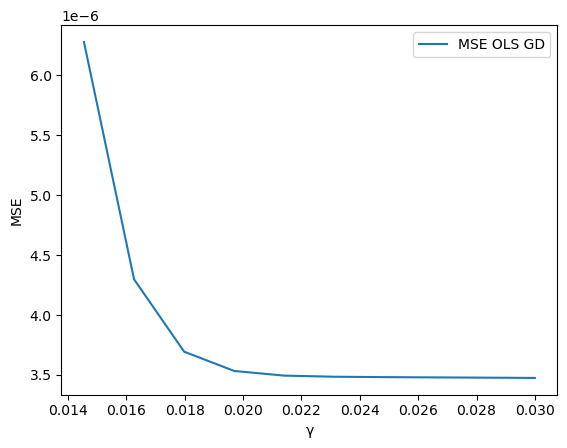

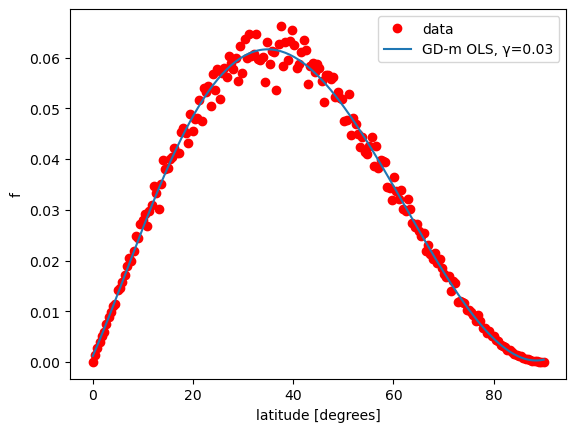

execution time= 6.437301635742188e-05 s


In [77]:
# Importing various packages
import sys
import numpy as np
from matplotlib import cm
from random import random, seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
#print(EigValues)

beta_OLS_m = np.random.randn(degree+1,1)

Niterations = 1000000 

ngammas = 10 

gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas)

MSE_OLS_GD_m = np.zeros(ngammas)   

for g in range(ngammas):
    gamma = gammas[g]
    
# Now improve with momentum gradient descent
    change_OLS = 0.0
    delta_momentum = 0.3

    for iter in range(Niterations):

        # calculate gradient
        gradient_OLS_m = (2.0/n)*X.T @ (X @ beta_OLS_m-y_noisy)

        # calculate update
        new_change_OLS = gamma*gradient_OLS_m+delta_momentum*change_OLS

        # take a step
        beta_OLS_m -= new_change_OLS

        # save the change
        change_OLS = new_change_OLS

    y_OLS_GD_m =X@beta_OLS_m

    MSE_OLS_GD_m[g]= MSE(y_noisy, y_OLS_GD_m)


print('method MSE=', MSE_OLS_GD_m)  
print('β=', beta_OLS_m)

plt.figure()
plt.plot(gammas, MSE_OLS_GD_m, label='MSE OLS GD')
plt.xlabel('γ')
plt.ylabel('MSE')
plt.legend()
plt.show()

#for the last value of gamma
ypredict_OLS_GD_m=X @ beta_OLS_m

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, ypredict_OLS_GD_m, label='GD-m OLS, γ=0.03')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#2ii) Momentum GD with a fixed learning rate (simple tuning) for Ridge

(array([1]), array([9]))
method MSE= 3.5506571624987618e-06


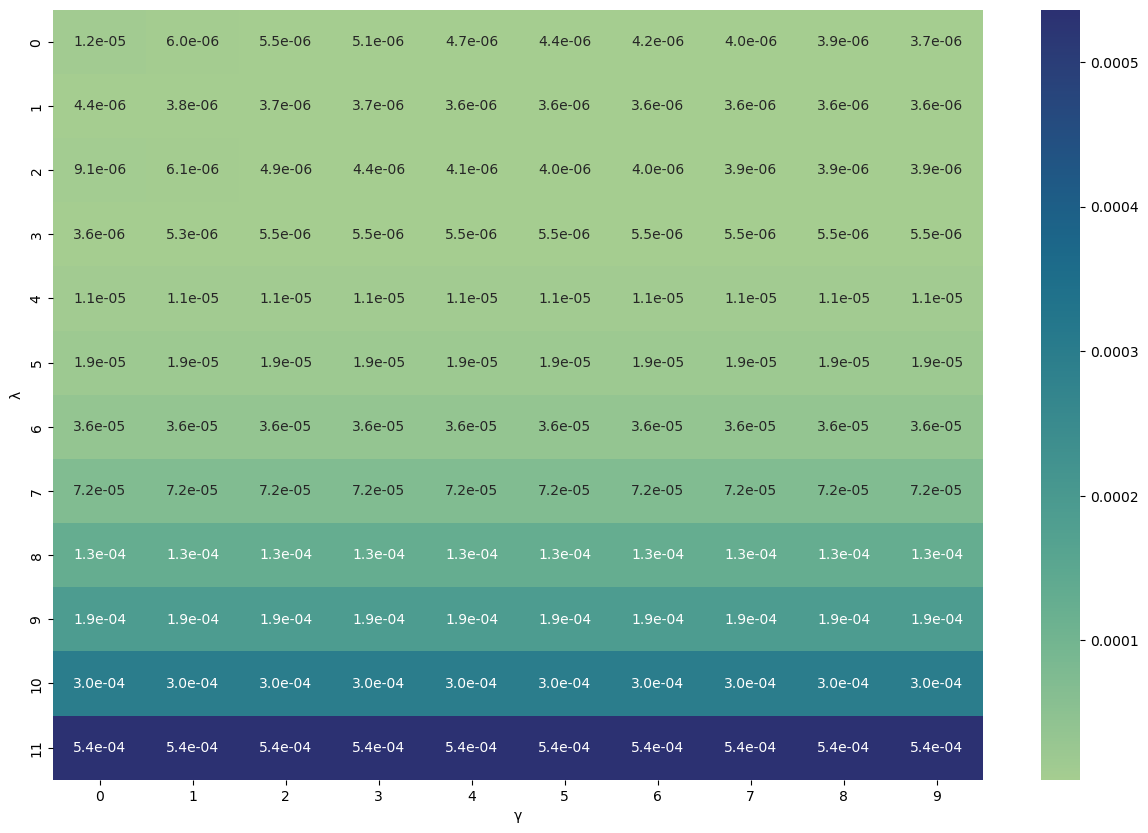

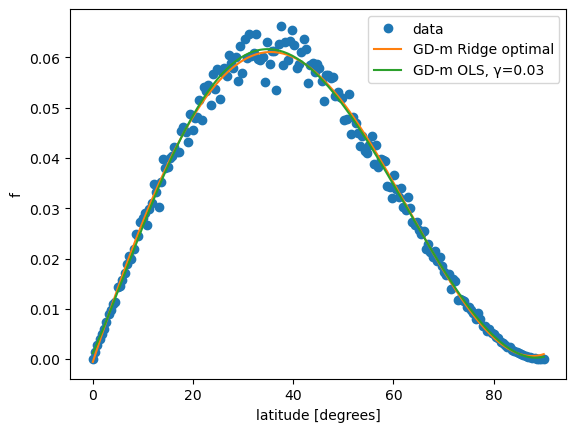

execution time= 2.8371810913085938e-05 s


In [84]:
#Ridge parameter
nlambdas = 12 
lambdas = np.logspace(-5, 0, nlambdas) 

#leaning rate constants
Niterations = 100000
ngammas = 10 
gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas) 

y_Ridge_GD_m_array= np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_GD_m = np.zeros((nlambdas, ngammas))

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge_m = np.random.randn(degree+1,1)    

    for g in range(ngammas):
        gamma = gammas[g]

# Now improve with momentum gradient descent    
        change_Ridge = 0.0
        delta_momentum = 0.3

        for iter in range(Niterations):
            # calculate gradient       
            gradient_Ridge_m = (2.0/n)*X.T @ (X @ (beta_Ridge_m)-y_noisy)+2*lmbda*beta_Ridge_m

            # calculate update       
            new_change_Ridge = gamma*gradient_Ridge_m+delta_momentum*change_Ridge

            # take a step        
            beta_Ridge_m -= new_change_Ridge

            # save the change        
            change_Ridge = new_change_Ridge

        y_Ridge_GD_m =X@beta_Ridge_m
        
        y_Ridge_GD_m_array[l, g]=y_Ridge_GD_m
        
        MSE_Ridge_GD_m[l, g]= MSE(y_noisy, y_Ridge_GD_m)
        
#finding the minimum value of the MSE
MSE_Ridge_GD_m_optimal = np.min(MSE_Ridge_GD_m)
conditon = (MSE_Ridge_GD_m == MSE_Ridge_GD_m_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

#saving the y that gives the optimal MSE
y_Ridge_GD_m_optimal= y_Ridge_GD_m_array[result]
y_Ridge_GD_m_optimal=(y_Ridge_GD_m_optimal[0])
#print(y_Ridge_GD_optimal)

print('method MSE=', MSE_Ridge_GD_m_optimal)
 
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_Ridge_GD_m)
mse_data_ridge = pd.DataFrame(MSE_Ridge_GD_m)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_data_ridge, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, y_Ridge_GD_m_optimal, label='GD-m Ridge optimal')
plt.plot(x*180/np.pi, ypredict_OLS_GD_m, label='GD-m OLS, γ=0.03')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#3ai) SGD with exponential tuning for OLS

method MSE= 5.187948254613662e-06
β= [[ 0.00155037]
 [ 0.11587262]
 [ 0.28002324]
 [-0.88939539]
 [ 0.82287468]
 [-0.35622736]
 [ 0.06463435]]


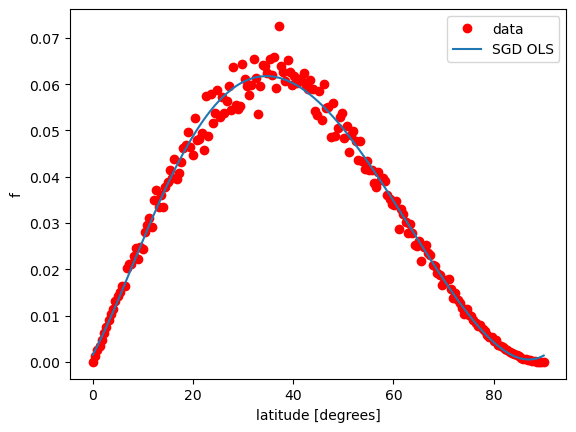

method MSE= 5.7599949222772135e-06
β= [[ 0.00291502]
 [ 0.12773322]
 [ 0.02023501]
 [ 0.07768815]
 [-0.58510719]
 [ 0.53624857]
 [-0.1413922 ]]


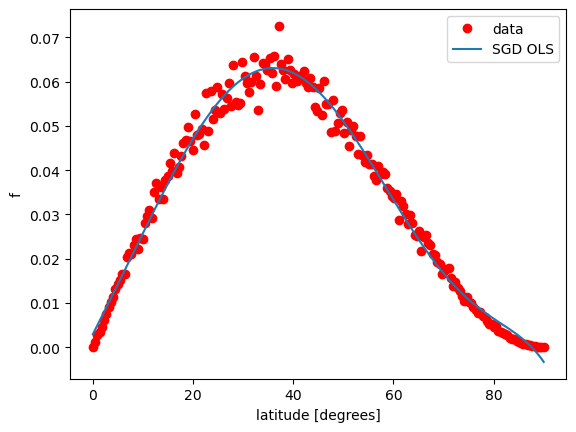

method MSE= 1.0537640406467137e-05
β= [[-0.00962922]
 [ 0.31865591]
 [-0.62743228]
 [ 0.77176978]
 [-0.61167653]
 [ 0.21980701]
 [-0.020519  ]]


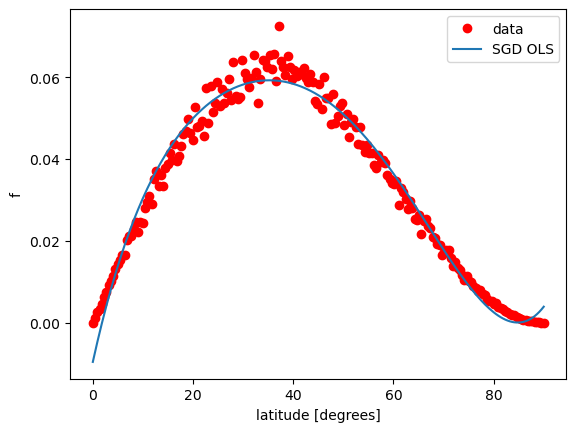

method MSE= 7.56285626673784e-05
β= [[ 0.00956198]
 [-0.01156227]
 [ 0.54076575]
 [-0.34484588]
 [-1.06717747]
 [ 1.31124306]
 [-0.40491587]]


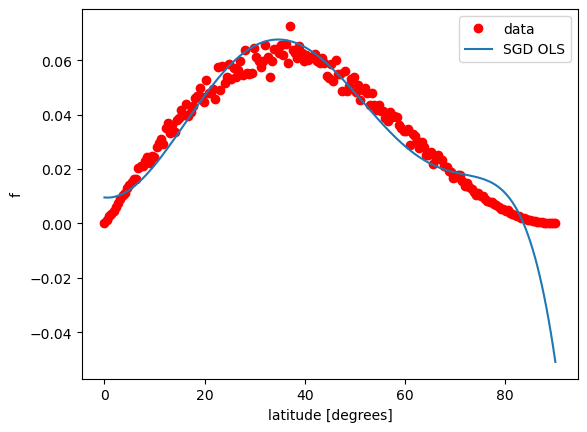

method MSE= 10.397321837269896
β= [[ 0.06098975]
 [-0.07397962]
 [-0.75074752]
 [ 1.29097491]
 [ 0.49822166]
 [ 0.38866205]
 [-1.50742515]]


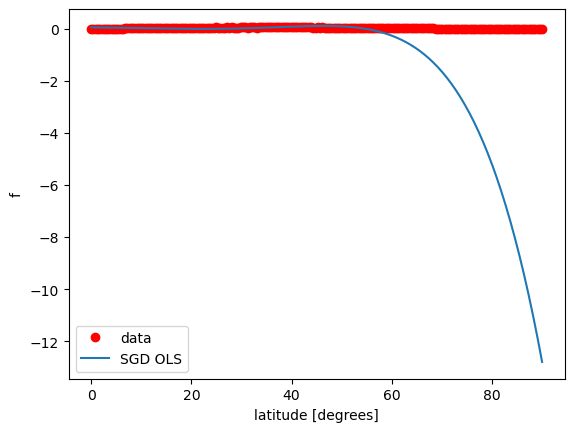

execution time= 4.029273986816406e-05 s


In [19]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 100000

for M in [1, 2, 4, 32]:
    
    m = int(n/M) #number of minibatches
    
    #exponential learning rate scheduler
    def learning_schedule(epoch, gamma_0):
        return gamma_0*np.exp(-epoch*gamma_0/100)

    beta_OLS = np.random.randn(degree+1,1)

    for epoch in range(n_epochs):
    
        for i in range(m):
            random_index = M*np.random.randint(m)
            xi = X[random_index:random_index+M]
            yi = y_noisy[random_index:random_index+M]

            gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)
            gamma_OLS = learning_schedule(epoch, 0.005) 

            beta_OLS = beta_OLS - gamma_OLS*gradient_OLS

    y_OLS_SGD = X @ beta_OLS

    MSE_OLS_SGD = MSE (y_OLS_SGD, y_noisy)
    print('method MSE=', MSE_OLS_SGD)  
    print('β=', beta_OLS)


    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_OLS_SGD, label='SGD OLS')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#3aii) SGD with exponential tuning for Ridge

(array([0]),)
method MSE= 5.839461830963113e-05


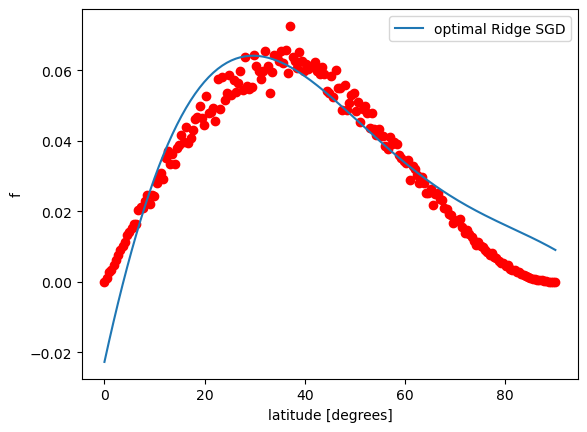

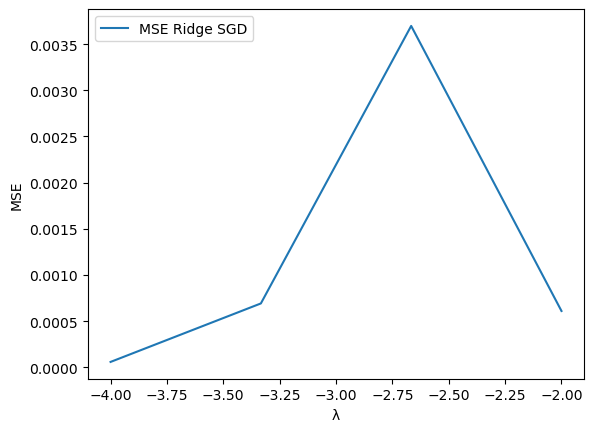

(array([2]),)
method MSE= 0.0009941195059439076


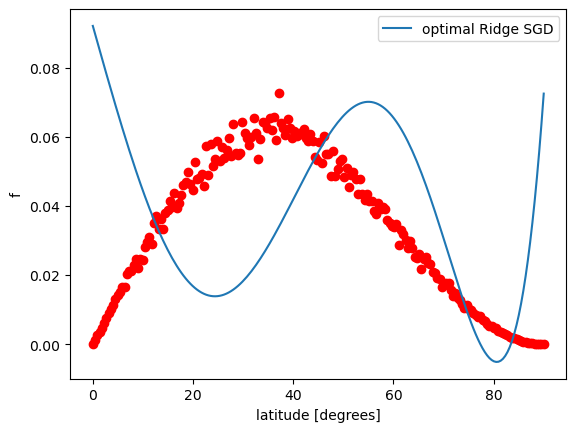

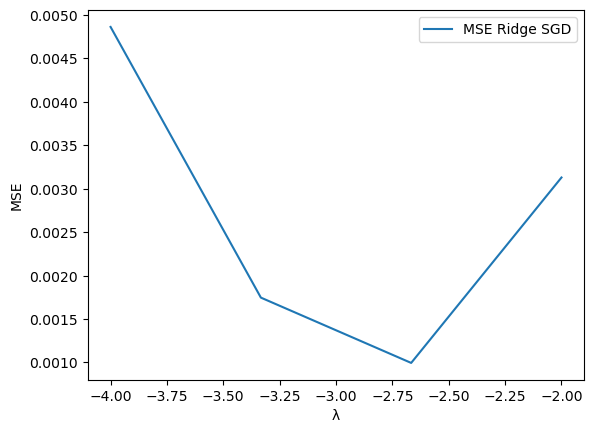

(array([3]),)
method MSE= 5.703400114668126e-05


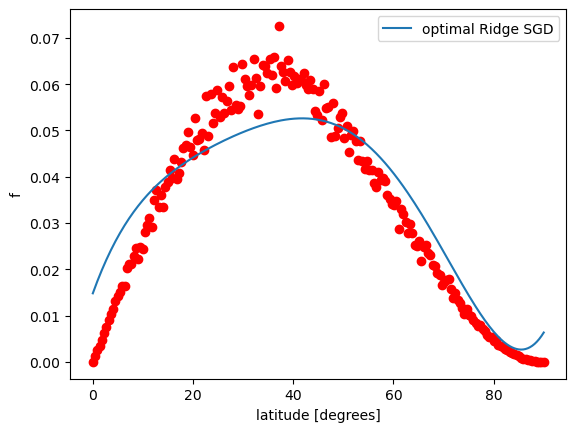

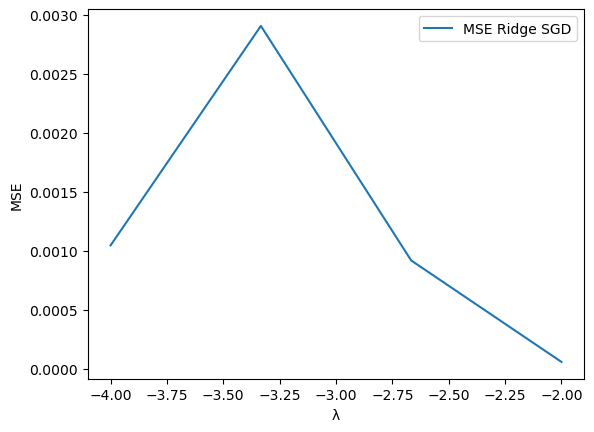

(array([0]),)
method MSE= 0.0001244724577422851


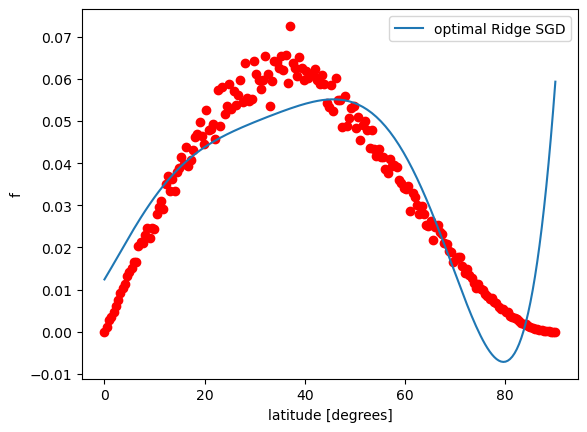

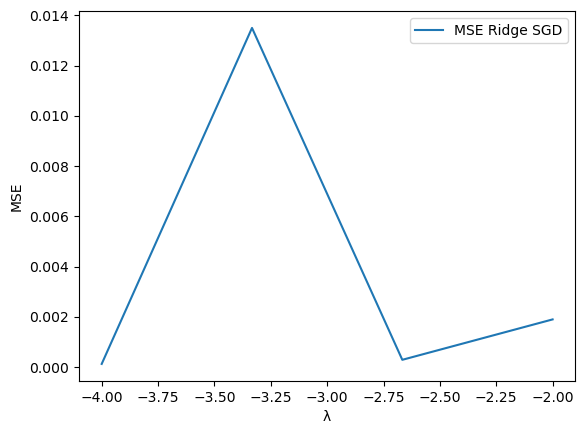

execution time= 3.147125244140625e-05 s


In [28]:
#Ridge parameter
nlambdas = 4 
lambdas = np.logspace(-4, -2, nlambdas) 

#learning schedule
def learning_schedule(epoch, gamma_0):
    return gamma_0*np.exp(-epoch*gamma_0/100)

#leaning rate constants
n_epochs = 10000
gamma_0 = 0.005

for M in [1, 2, 8, 32]: #we vary the the size of each minibatch

    m = int(n/M) #number of minibatches

    beta_Ridge = np.random.randn(degree+1,1)
    y_Ridge_SGD_array= np.zeros(nlambdas, dtype=object)
    MSE_Ridge_SGD = np.zeros(nlambdas)

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge = np.random.randn(degree+1,1)    

        for epoch in range(n_epochs):

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                gamma_Ridge = learning_schedule(epoch, gamma_0) 

            beta_Ridge = beta_Ridge - gamma_Ridge*gradient_Ridge

        y_Ridge_SGD = X @ beta_Ridge
        
        y_Ridge_SGD_array[l]=y_Ridge_SGD

        MSE_Ridge_SGD[l]=MSE(y_noisy, y_Ridge_SGD)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_optimal = np.min(MSE_Ridge_SGD)
    conditon = (MSE_Ridge_SGD == MSE_Ridge_SGD_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_optimal= y_Ridge_SGD_array[result]
    y_Ridge_SGD_optimal=(y_Ridge_SGD_optimal[0])

    print('method MSE=', MSE_Ridge_SGD_optimal)

    plt.plot(x*180/np.pi, y_noisy, 'ro')
    plt.plot(x*180/np.pi, y_Ridge_SGD_optimal, label = 'optimal Ridge SGD')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()    

    plt.plot(np.log10(lambdas), MSE_Ridge_SGD, label ='MSE Ridge SGD')
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#3bi) SGD-m with exponential tuning for OLS

method MSE= 3.2938756604802826e-05


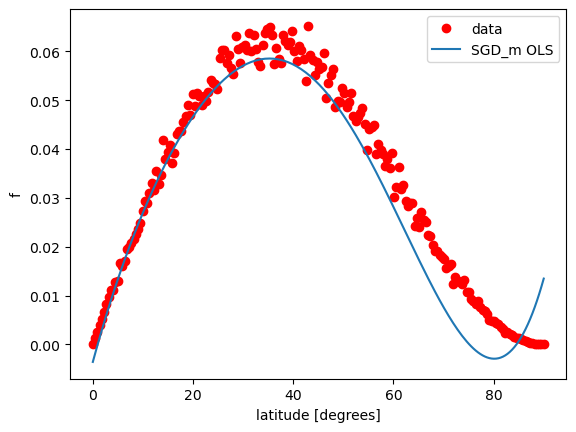

method MSE= 2.9796536123858382e-05


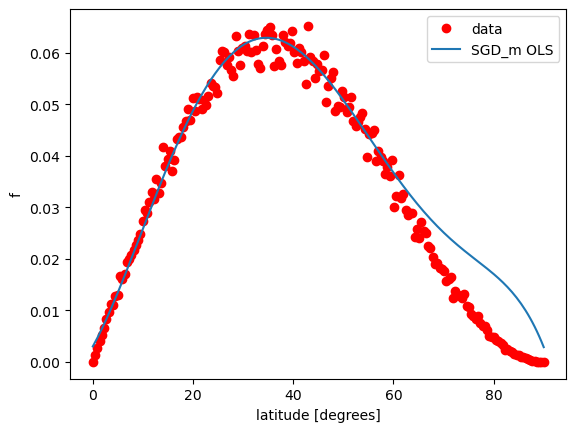

method MSE= 1.1260053111020722e-05


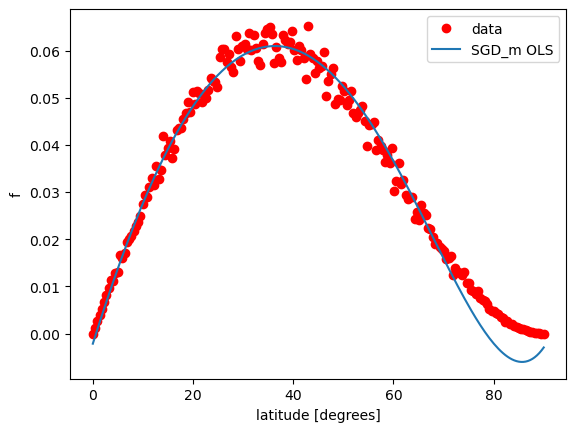

method MSE= 0.00041118947079825987


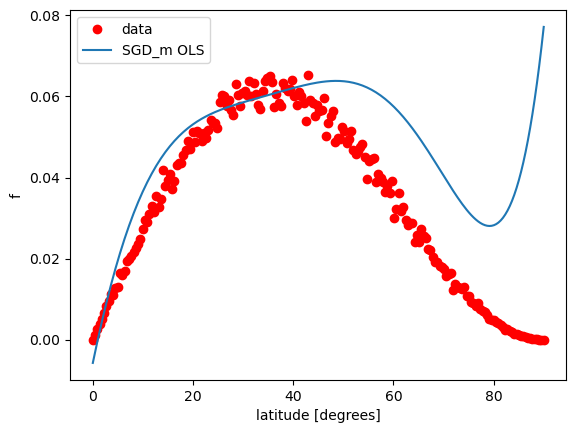

method MSE= 5.821544071516389e-05


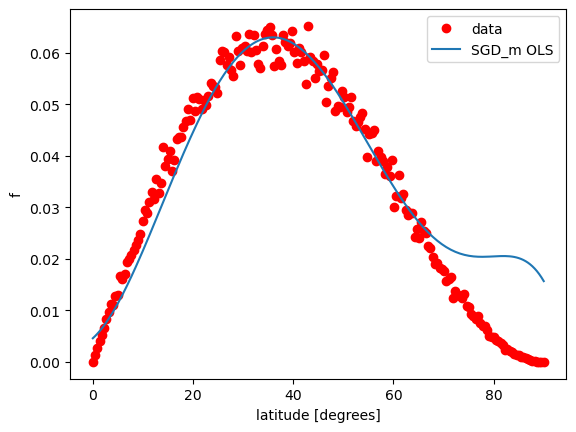

execution time= 2.8371810913085938e-05 s


In [31]:
# Importing various packages
import sys
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import cm
from math import exp, sqrt
from random import random, seed
import matplotlib.pyplot as plt
from random import random, seed
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def learning_schedule(epoch, gamma_0):
    return gamma_0*np.exp(-epoch*gamma_0/100)

n_epochs = 1000 
gamma_0=0.001

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

for M in [1, 2, 16, 32, 64]: # we vary the size of each minibatch 
                       
    m = int(n/M) #number of minibatches

    beta_OLS_m = np.random.randn(degree+1,1)

    Niterations=1000

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = M*np.random.randint(m)
            xi = X[random_index:random_index+M]
            yi = y_noisy[random_index:random_index+M]        

            gamma_OLS_m = learning_schedule(epoch, gamma_0)                                                   
            change_OLS = 0.0
            delta_momentum = 0.3    

            for iter in range(Niterations):

                # calculate gradient
                gradient_OLS_m = (2.0/M)* xi.T @ ((xi @ beta_OLS_m)-yi)
                
                # calculate update
                new_change_OLS = gamma_OLS_m*gradient_OLS_m+delta_momentum*change_OLS

                # take a step
                beta_OLS_m -= new_change_OLS

                # save the change
                change_OLS = new_change_OLS

                #print(gamma)
                beta_OLS_m = beta_OLS_m - gamma_OLS_m*gradient_OLS_m

    y_OLS_SGD_m = X @ beta_OLS_m

    MSE_OLS_SGD_m = MSE (y_OLS_SGD_m, y_noisy)
    print('method MSE=', MSE_OLS_SGD_m)

    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_OLS_SGD_m, label='SGD_m OLS')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [6]:
#3bii) SGD-m with exponential tuning for Ridge

number of minibatches: 1
(array([2]),)
method MSE= 0.0018247004857741994


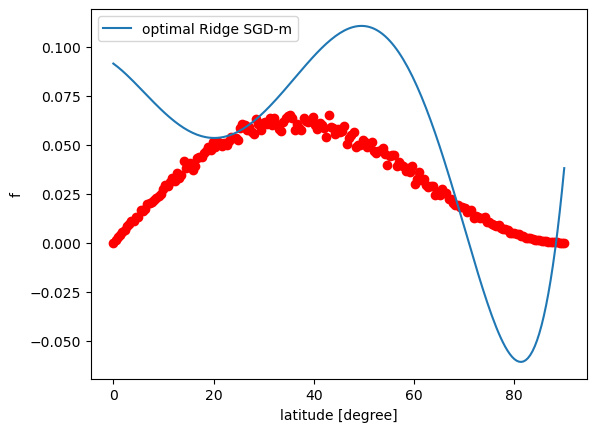

[0.00864655 0.00386111 0.0018247  0.00432188 0.03726549 0.06247815
 0.02566742 0.0169033 ]


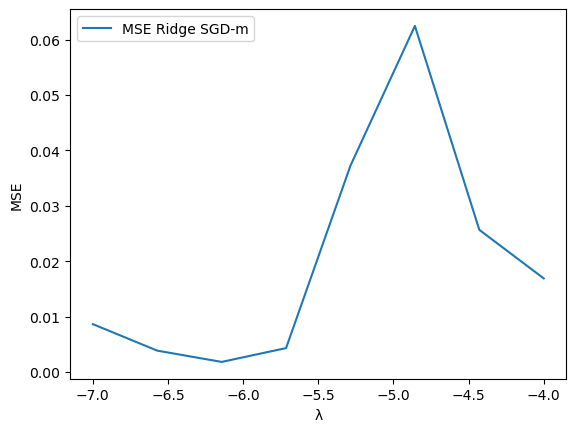

number of minibatches: 16
(array([0]),)
method MSE= 0.0001163272111141837


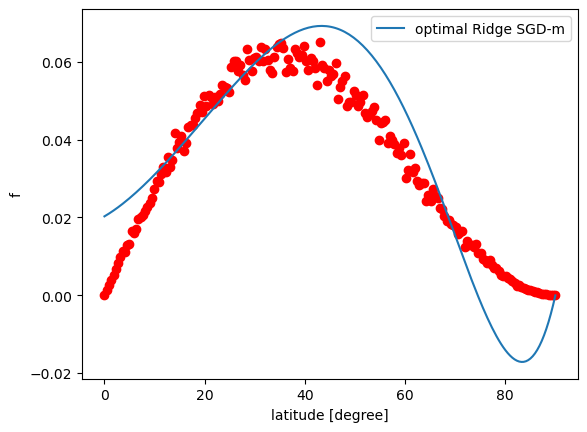

[0.00011633 0.01699277 0.00177204 0.0017479  0.00254531 0.0009228
 0.00239961 0.00057065]


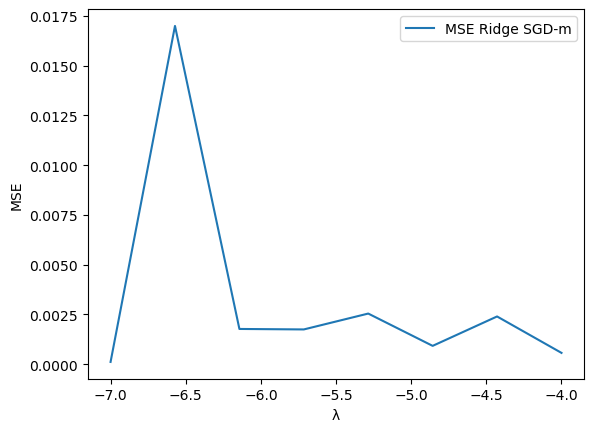

number of minibatches: 32
(array([6]),)
method MSE= 0.0001018434044330116


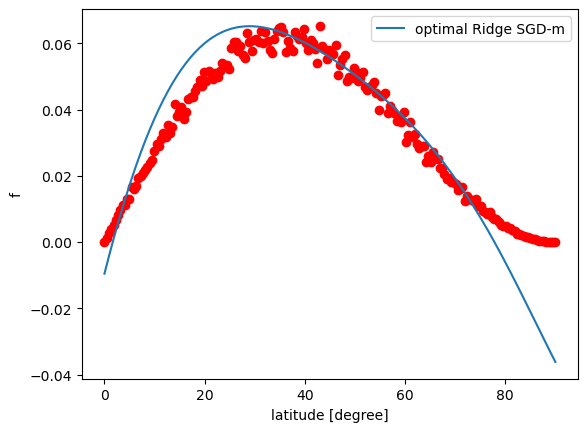

[0.00207044 0.02067748 0.00038096 0.00038848 0.00226451 0.00131488
 0.00010184 0.00170747]


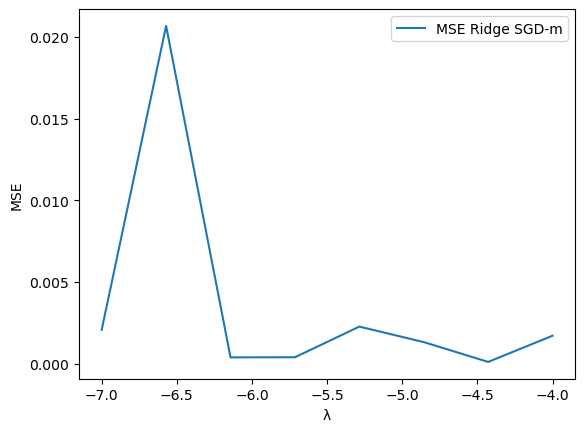

number of minibatches: 64
(array([6]),)
method MSE= 0.0006136431342167273


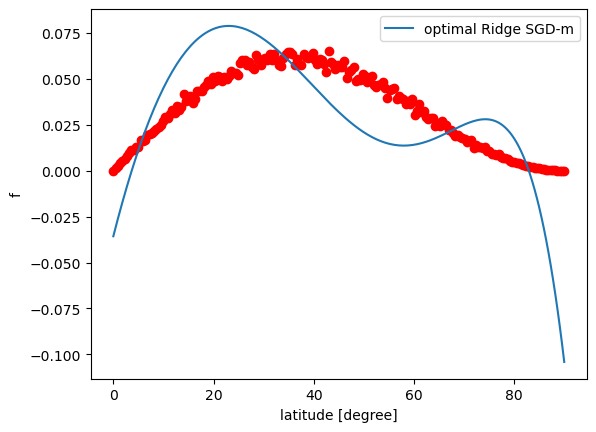

[0.00181158 0.00080198 0.00094349 0.00067254 0.00826472 0.00109506
 0.00061364 0.01398714]


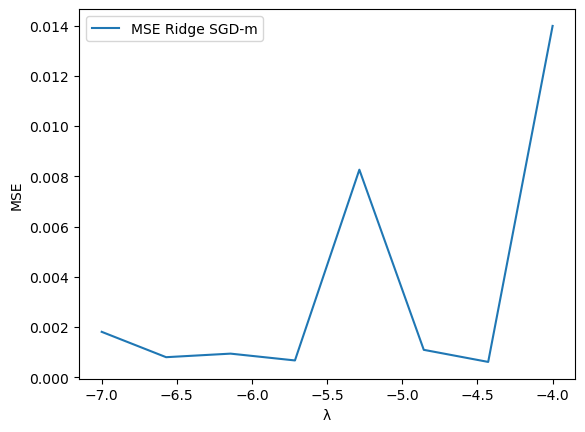

number of minibatches: 128
(array([1]),)
method MSE= 0.0011272141830008559


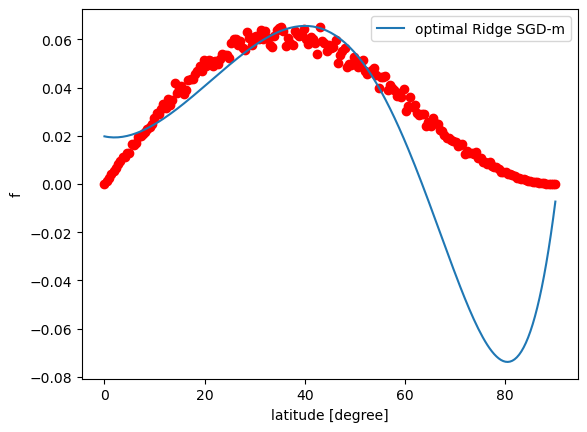

[1.18649810e+00 1.12721418e-03 2.33001495e-01 1.46600027e-01
 1.20024021e-01 4.50502473e-01 1.37893244e-02 2.59372936e-02]


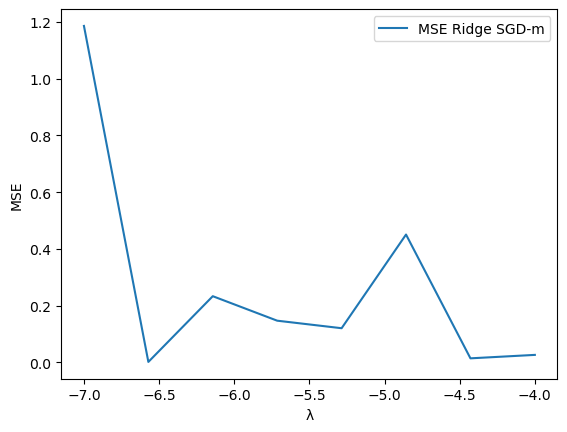

execution time= 4.744529724121094e-05 s


In [33]:
#Ridge parameter
nlambdas = 8 
lambdas = np.logspace(-7, -4, nlambdas) 

#leaning rate constants
n_epochs = 500
gamma_0=0.001
Niterations=1000

for M in [1, 16, 32, 64, 128]:#we vary the size of each minibatch
    print('number of minibatches:', M)
    
    m = int(n/M) #number of minibatches
    
    y_Ridge_SGD_m_array= np.zeros(nlambdas, dtype=object)
    MSE_Ridge_SGD_m = np.zeros(nlambdas)

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge_m = np.random.randn(degree+1,1)    

        for epoch in range(n_epochs):
            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gamma_Ridge_m = learning_schedule(epoch, gamma_0) 

# Now improve with momentum gradient descent    
            change_Ridge = 0.0
            delta_momentum = 0.3

            for iter in range(Niterations):
                # calculate gradient       
                gradient_Ridge_m = (2.0/M)*xi.T @ (xi @ (beta_Ridge_m)-yi)+2*lmbda*beta_Ridge_m

                # calculate update       
                new_change_Ridge = gamma_Ridge_m*gradient_Ridge_m+delta_momentum*change_Ridge

                # take a step        
                beta_Ridge_m -= new_change_Ridge

                # save the change        
                change_Ridge = new_change_Ridge

            beta_Ridge_m = beta_Ridge_m - gamma_Ridge_m*gradient_Ridge_m

        y_Ridge_SGD_m = X @ beta_Ridge_m
        
        y_Ridge_SGD_m_array [l] = y_Ridge_SGD_m

        MSE_Ridge_SGD_m[l]=MSE(y_noisy, y_Ridge_SGD_m)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_m_optimal = np.min(MSE_Ridge_SGD_m)
    conditon = (MSE_Ridge_SGD_m == MSE_Ridge_SGD_m_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_m_optimal= y_Ridge_SGD_m_array[result]
    y_Ridge_SGD_m_optimal=(y_Ridge_SGD_m_optimal[0])

    print('method MSE=', MSE_Ridge_SGD_m_optimal)

    plt.plot(x*180/np.pi, y_noisy, 'ro')
    plt.plot(x*180/np.pi, y_Ridge_SGD_m_optimal, label = 'optimal Ridge SGD-m')
    plt.xlabel('latitude [degree]')
    plt.ylabel('f')
    plt.legend()
    plt.show()    

    print(MSE_Ridge_SGD_m)
    plt.plot(np.log10(lambdas), MSE_Ridge_SGD_m, label ='MSE Ridge SGD-m')
    plt.xlabel('λ')
    plt.ylabel('MSE')
    plt.legend()
    plt.show() 
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4ai) Adagrad GD OLS   

method MSE= [4.21149488e-03 5.86688158e-06 4.89002672e-06 4.70443383e-06
 4.67738344e-06 4.65875141e-06 4.63947107e-06 4.62018605e-06
 4.60097821e-06 4.58199344e-06]
β= [[ 0.00136072]
 [ 0.12814701]
 [ 0.18202999]
 [-0.63517261]
 [ 0.53370036]
 [-0.2051865 ]
 [ 0.03488881]]


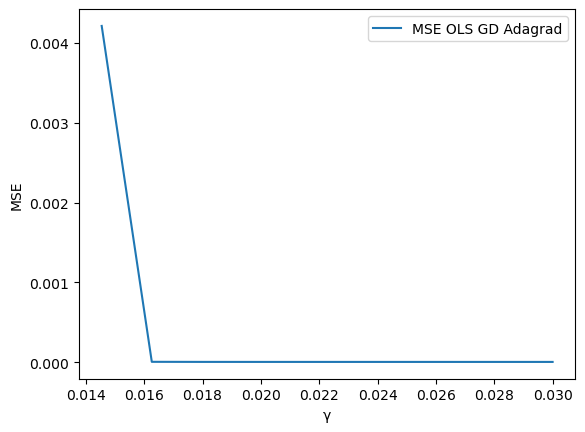

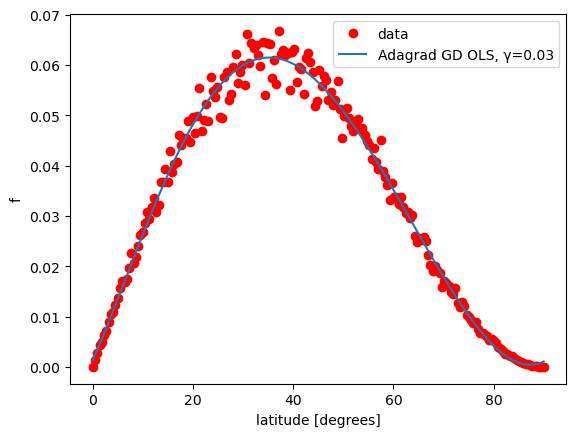

execution time= 2.9802322387695312e-05 s


In [1]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

beta_OLS = np.random.randn(degree+1,1)

Niterations = 1000000 

#We vary the leaning rate
ngammas = 10 

gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas)

MSE_OLS_GD_ada = np.zeros(ngammas)   

for g in range(ngammas):
    gamma = gammas[g]

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    Giter = np.zeros(shape=(degree+1,degree+1))

    for iter in range(Niterations):
        gradient_OLS = (2.0/n)*X.T @ (X @ beta_OLS-y_noisy)

        Giter +=gradient_OLS @ gradient_OLS.T

        # Simpler algorithm with only diagonal elements
        Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

        # compute update
        update = np.multiply(Ginverse,gradient_OLS)

        beta_OLS -= update

    ypredict_OLS_GD_ada=X @ beta_OLS

    MSE_OLS_GD_ada[g] = MSE(y_noisy, ypredict_OLS_GD_ada)

print('method MSE=', MSE_OLS_GD_ada)  
print('β=', beta_OLS)
    
plt.figure()
plt.plot(gammas, MSE_OLS_GD_ada, label='MSE OLS GD Adagrad')
plt.xlabel('γ')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, ypredict_OLS_GD_ada, label='Adagrad GD OLS, γ=0.03')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4aii) Adagrad GD Ridge  

(array([1]), array([9]))
method MSE= 4.4796861921181894e-06


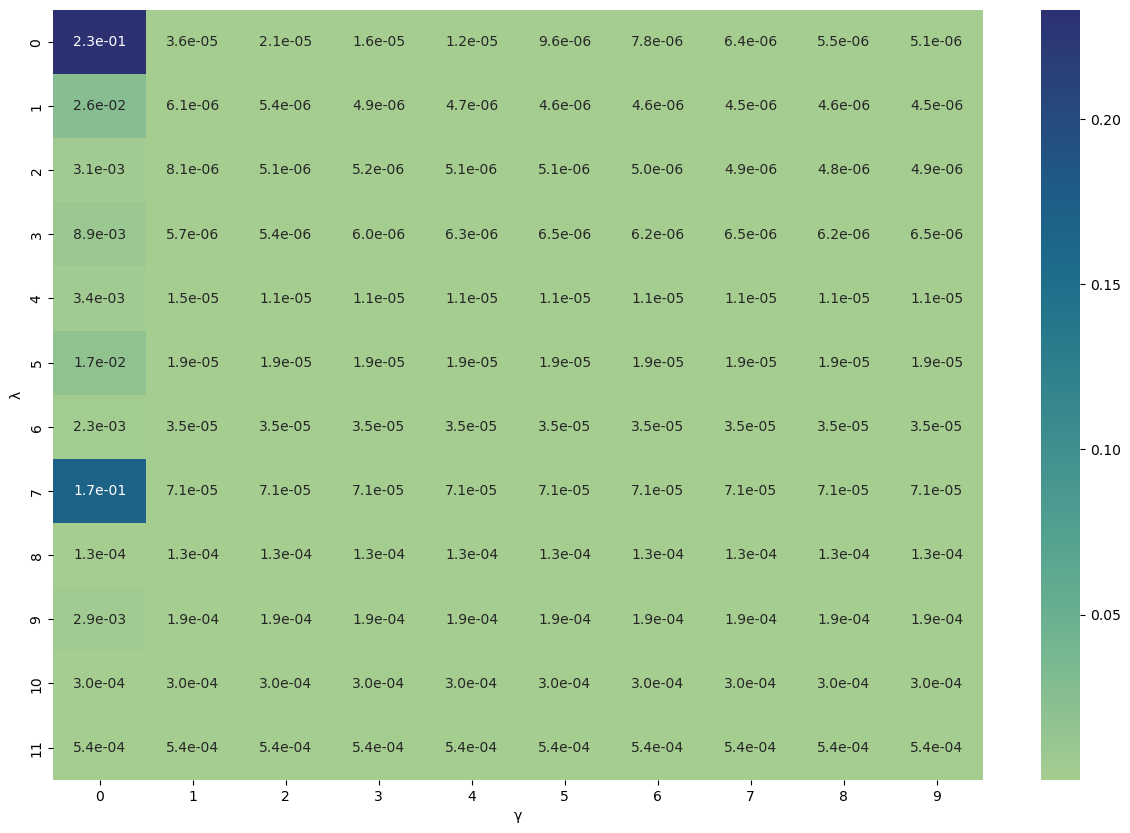

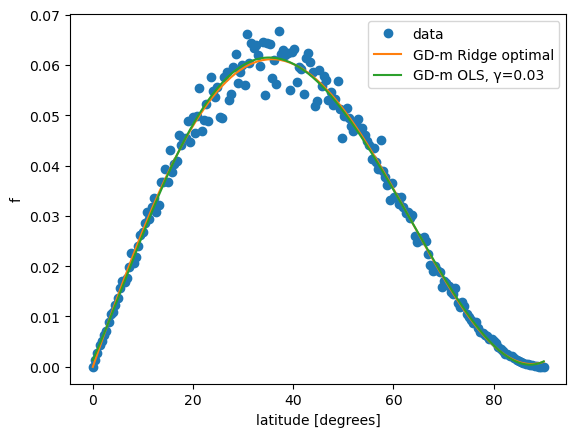

execution time= 2.7418136596679688e-05 s


In [2]:
#Ridge parameter
nlambdas = 12 
lambdas = np.logspace(-5, 0, nlambdas) 

#leaning rate constants
Niterations = 100000  
ngammas = 10 
gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas) 

y_Ridge_GD_ada_array= np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_GD_ada = np.zeros((nlambdas, ngammas))

#We vary the Ridge parameter
for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    
    
    # We vary the learning rate
    for g in range(ngammas):
        gamma = gammas[g]
   
        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        Giter = np.zeros(shape=(degree+1,degree+1))

        for iter in range(Niterations):
            gradient_Ridge = (2.0/n)*X.T @ (X @ (beta_Ridge)-y_noisy)+2*lmbda*beta_Ridge

            # Calculate the outer product of the gradients
            Giter +=gradient_Ridge @ gradient_Ridge.T

            # Simpler algorithm with only diagonal elements
            Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

            # compute update
            update = np.multiply(Ginverse,gradient_Ridge)
            beta_Ridge -= update

        y_Ridge_GD_ada = X @ beta_Ridge
        
        y_Ridge_GD_ada_array[l, g] = y_Ridge_GD_ada

        MSE_Ridge_GD_ada[l, g]= MSE(y_noisy, y_Ridge_GD_ada) 

#finding the minimum value of the MSE
MSE_Ridge_GD_ada_optimal = np.min(MSE_Ridge_GD_ada)
conditon = (MSE_Ridge_GD_ada == MSE_Ridge_GD_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

#saving the y that gives the optimal MSE
y_Ridge_GD_ada_optimal= y_Ridge_GD_ada_array[result]
y_Ridge_GD_ada_optimal=(y_Ridge_GD_ada_optimal[0])
#print(y_Ridge_GD_optimal)

print('method MSE=', MSE_Ridge_GD_ada_optimal)
            
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_Ridge_GD_ada)
mse_data_ridge = pd.DataFrame(MSE_Ridge_GD_ada)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_data_ridge, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'o', label='data')
plt.plot(x*180/np.pi, y_Ridge_GD_ada_optimal, label='GD-m Ridge optimal')
plt.plot(x*180/np.pi, ypredict_OLS_GD_ada, label='GD-m OLS, γ=0.03')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4bi) Adagrad GD-m OLS

method MSE= [5.30470306e-04 1.23455185e-05 5.22741051e-06 4.64737792e-06
 4.61342537e-06 4.60800578e-06 4.60038877e-06 4.59667987e-06
 4.58732501e-06 4.58686879e-06]
β= [[-0.00088489]
 [ 0.18416135]
 [-0.14873114]
 [ 0.1670209 ]
 [-0.40144066]
 [ 0.31400859]
 [-0.0751161 ]]


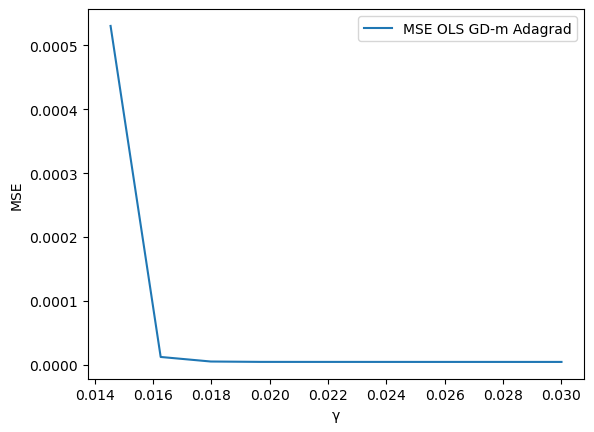

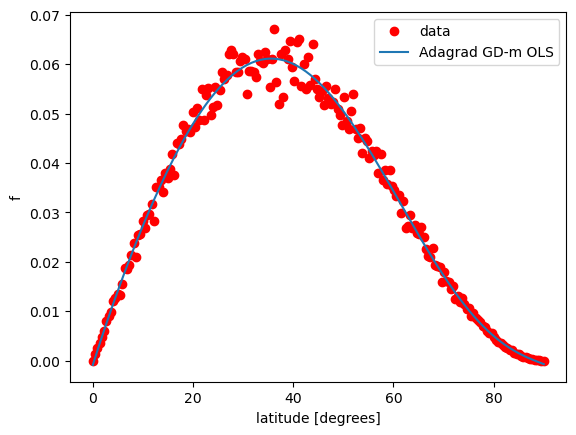

execution time= 2.6702880859375e-05 s


In [1]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

beta_OLS = np.random.randn(degree+1,1)

Niterations = 1000000 
  
# we vary the value of learning rate
ngammas = 10 

gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas)

MSE_OLS_GD_m_ada = np.zeros(ngammas)   

for g in range(ngammas):
    gamma = gammas[g]

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    change_OLS = 0.0
    delta_momentum = 0.3

    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(degree+1,degree+1))

    for iter in range(Niterations):
        gradient_OLS = (2.0/n)*X.T @ (X @ beta_OLS-y_noisy)

        # Calculate the outer product of the gradients
        Giter +=gradient_OLS @ gradient_OLS.T

        # Simpler algorithm with only diagonal elements
        Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

        # compute update
        update = np.multiply(Ginverse,gradient_OLS)+delta_momentum*change_OLS

        beta_OLS -= update

        # save the change
        change_OLS = update

    y_OLS_GD_m_ada= X@beta_OLS
    
    MSE_OLS_GD_m_ada[g] = MSE(y_noisy, y_OLS_GD_m_ada)
    
print('method MSE=', MSE_OLS_GD_m_ada)  
print('β=', beta_OLS)
    
plt.figure()
plt.plot(gammas, MSE_OLS_GD_m_ada, label='MSE OLS GD-m Adagrad')
plt.xlabel('γ')
plt.ylabel('MSE')
plt.legend()
plt.show()    

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_GD_m_ada, label='Adagrad GD-m OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4bii) Adagrad GD-m Ridge

(array([1]), array([8]))
method MSE= 4.568203711347425e-06


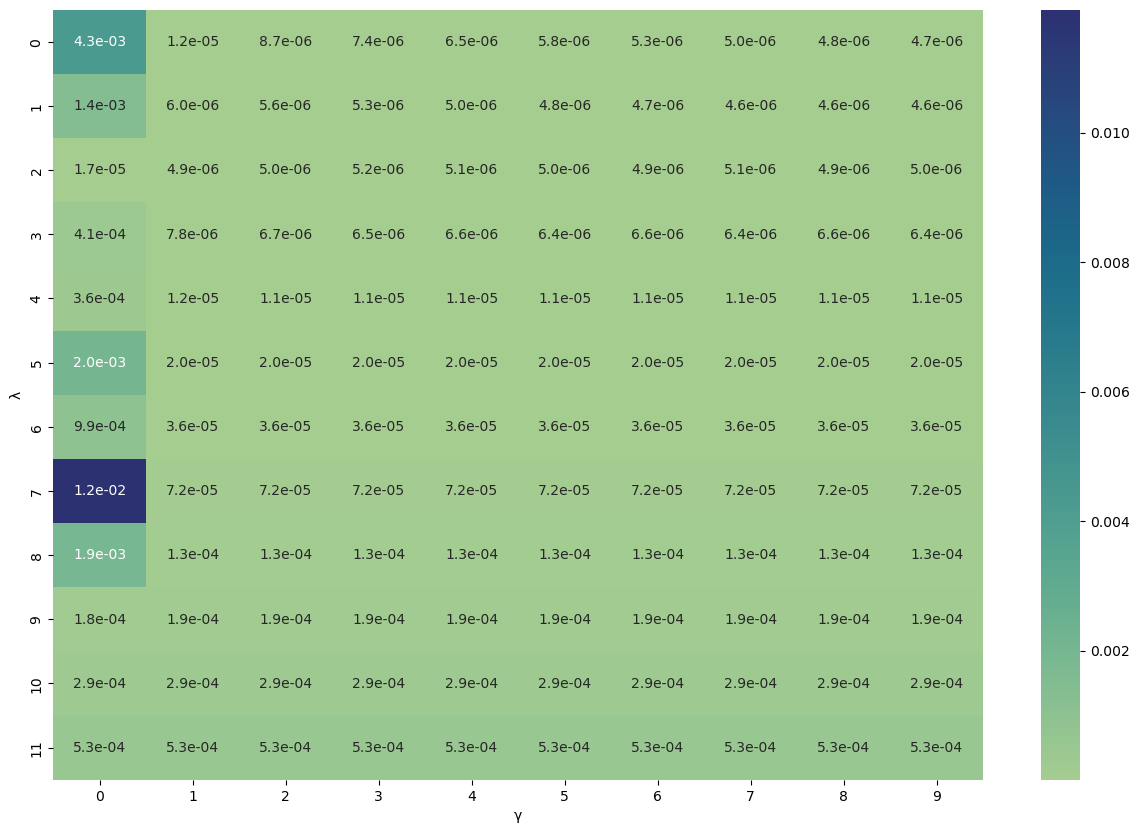

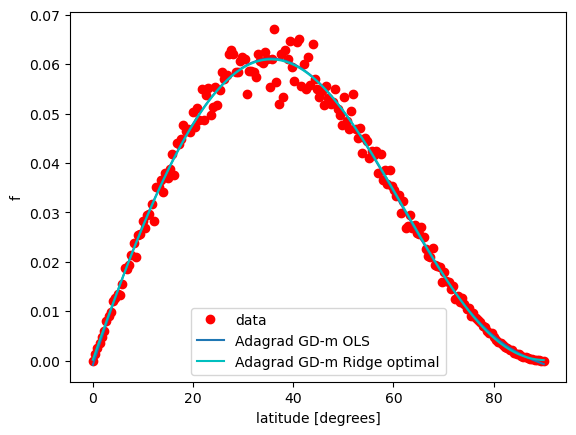

execution time= 2.6941299438476562e-05 s


In [3]:
#Ridge parameter
#Ridge parameter
nlambdas = 12 
lambdas = np.logspace(-5, 0, nlambdas) 

#leaning rate constants
Niterations = 100000  
ngammas = 10 
gammas = np.linspace(1.0/np.max(EigValues), 0.03, ngammas) 

y_Ridge_GD_m_ada_array= np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_GD_m_ada = np.zeros((nlambdas, ngammas))

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    

    # We vary the learning rate
    for g in range(ngammas):
        gamma = gammas[g]

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        Giter = np.zeros(shape=(degree+1,degree+1))

        change_Ridge = 0.0
        delta_momentum = 0.3

        for iter in range(Niterations):
            gradient_Ridge = (2.0/n)*X.T @ (X @ (beta_Ridge)-y_noisy)+2*lmbda*beta_Ridge

            # Calculate the outer product of the gradients
            Giter +=gradient_Ridge @ gradient_Ridge.T

            # Simpler algorithm with only diagonal elements
            Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

            # compute update
            update = np.multiply(Ginverse,gradient_Ridge)+delta_momentum*change_Ridge
            beta_Ridge -= update

            # save the change
            change_Ridge = update

        y_Ridge_GD_m_ada= X@beta_Ridge
        
        y_Ridge_GD_m_ada_array[l, g] = y_Ridge_GD_m_ada

        MSE_Ridge_GD_m_ada[l, g]= MSE(y_noisy, y_Ridge_GD_m_ada)        

#finding the minimum value of the MSE
MSE_Ridge_GD_m_ada_optimal = np.min(MSE_Ridge_GD_m_ada)
conditon = (MSE_Ridge_GD_m_ada == MSE_Ridge_GD_m_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_Ridge_GD_m_ada_optimal)  

#saving the y that gives the optimal MSE
y_Ridge_GD_m_ada_optimal= y_Ridge_GD_m_ada_array[result]
y_Ridge_GD_m_ada_optimal=(y_Ridge_GD_m_ada_optimal[0])
#print(y_Ridge_GD_optimal)
        
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_Ridge_GD_m_ada)
mse_data_ridge = pd.DataFrame(MSE_Ridge_GD_m_ada)

plt.figure(figsize=(15,10))
sns.heatmap(data=mse_data_ridge, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_GD_m_ada, label='Adagrad GD-m OLS')
plt.plot(x*180/np.pi, y_Ridge_GD_m_ada_optimal, 'c-', label='Adagrad GD-m Ridge optimal')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4ci) Adagrad SGD OLS

(array([0]), array([2]))
method MSE= 4.803577066108796e-06


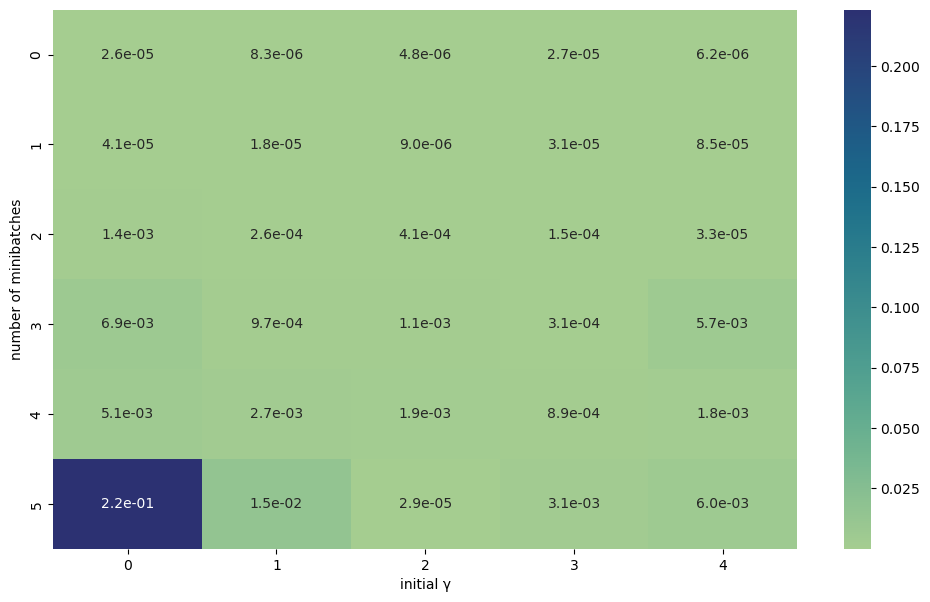

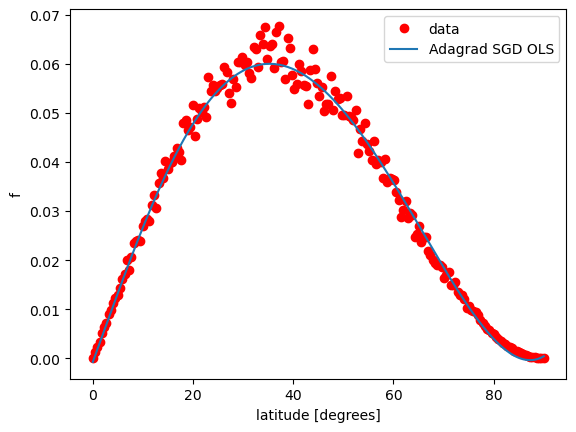

execution time= 2.9802322387695312e-05 s


In [2]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

def MSE(y_data,y_model):
    n= np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 10000 

nsizes= 6
sizes=[1, 2, 4, 8, 16, 32]

ngammas = 5 
gammas = np.logspace(-3, -2, ngammas)

y_OLS_SGD_ada_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_ada = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    
    for g in range(ngammas):# we vary the value for the initial learning rate
        gamma = gammas[g]

        m = int(n/M) #number of minibatches

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        beta_OLS = np.random.randn(degree+1,1)

        for epoch in range(n_epochs): 

            Giter = np.zeros(shape=(degree+1,degree+1))

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)

                # Calculate the outer product of the gradients
                Giter +=gradient_OLS @ gradient_OLS.T

                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

                # compute update
                update = np.multiply(Ginverse,gradient_OLS)

                beta_OLS -= update

        y_OLS_SGD_ada = X @ beta_OLS
        
        y_OLS_SGD_ada_array[s, g] = y_OLS_SGD_ada
        
        MSE_OLS_SGD_ada[s, g] = MSE(y_OLS_SGD_ada, y_noisy)
        
#finding the minimum value of the MSE
MSE_OLS_SGD_ada_optimal = np.min(MSE_OLS_SGD_ada)
conditon = (MSE_OLS_SGD_ada == MSE_OLS_SGD_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_ada_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_ada_optimal= y_OLS_SGD_ada_array[result]
y_OLS_SGD_ada_optimal=(y_OLS_SGD_ada_optimal[0])
#print(y_Ridge_GD_optimal)             
        
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_ada)
mse_data_ols_sgd_ada = pd.DataFrame(MSE_OLS_SGD_ada)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_ada, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_ada_optimal, label='Adagrad SGD OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4cii) Adagrad SGD Ridge  

(array([1]), array([2]))
method MSE= 6.859919135576768e-06


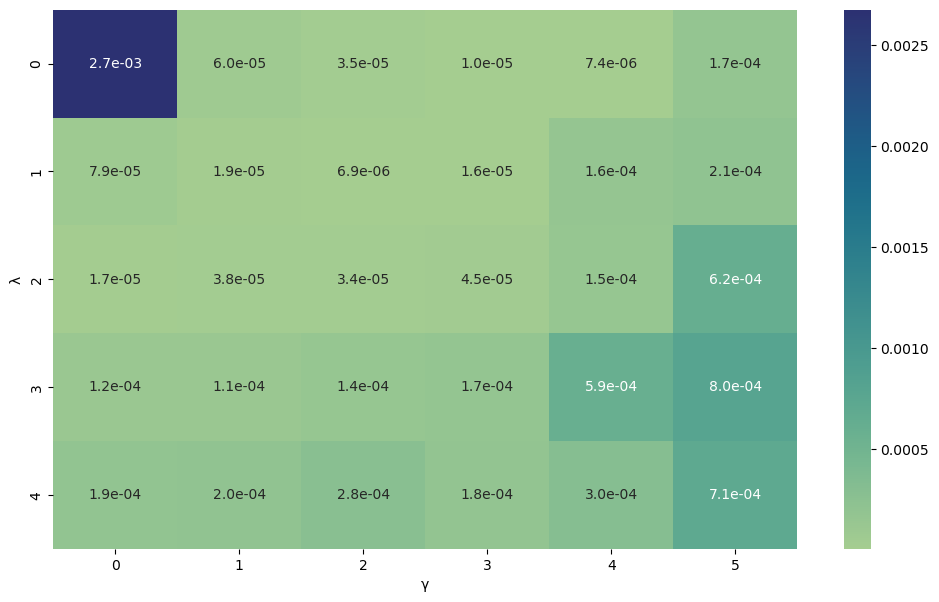

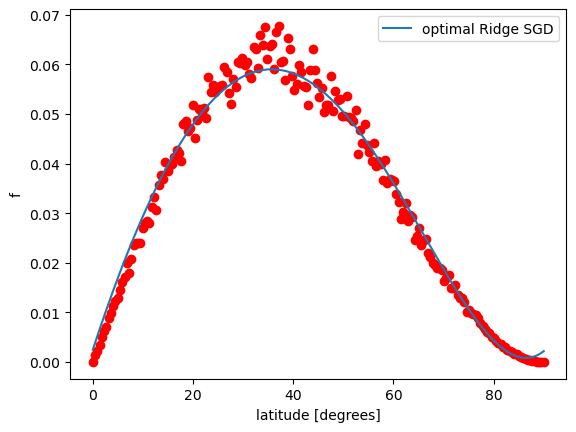

execution time= 3.075599670410156e-05 s


In [5]:
#Ridge parameter
nlambdas = 5 
lambdas = np.logspace(-5, -1, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, -1, ngammas)

y_Ridge_SGD_ada_array = np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_SGD_ada = np.zeros((nlambdas, ngammas))

n_epochs = 1000
M=1   
m = int(n/M) #number of minibatches

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    
    MSE_Ridge_SGD = np.zeros(nlambdas)

    # We vary the learning rate
    for g in range(ngammas):
        gamma=gammas[g]

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8    

        for epoch in range(n_epochs):

            Giter = np.zeros(shape=(degree+1,degree+1))    

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                # Calculate the outer product of the gradients
                Giter +=gradient_Ridge @ gradient_Ridge.T

                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

                # compute update
                update = np.multiply(Ginverse,gradient_Ridge)
                beta_Ridge -= update

        y_Ridge_SGD_ada = X @ beta_Ridge
        
        y_Ridge_SGD_ada_array[l, g] = y_Ridge_SGD_ada

        MSE_Ridge_SGD_ada[l, g]=MSE(y_noisy, y_Ridge_SGD_ada)
               
#finding the minimum value of the MSE
MSE_Ridge_SGD_ada_optimal = np.min(MSE_Ridge_SGD_ada)
conditon = (MSE_Ridge_SGD_ada == MSE_Ridge_SGD_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_Ridge_SGD_ada_optimal)  

#saving the y that gives the optimal MSE
y_Ridge_SGD_ada_optimal= y_Ridge_SGD_ada_array[result]
y_Ridge_SGD_ada_optimal=(y_Ridge_SGD_ada_optimal[0])
            
pd.DataFrame(MSE_Ridge_SGD_ada)
mse_data_ridge_sgd_ada = pd.DataFrame(MSE_Ridge_SGD_ada)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ridge_sgd_ada, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()            

plt.plot(x*180/np.pi, y_noisy, 'ro')
plt.plot(x*180/np.pi, y_Ridge_SGD_ada_optimal, label = 'optimal Ridge SGD')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()        

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4di) Adagrad SGD-m OLS  

(array([0]), array([0]))
method MSE= 7.31445912506738e-06


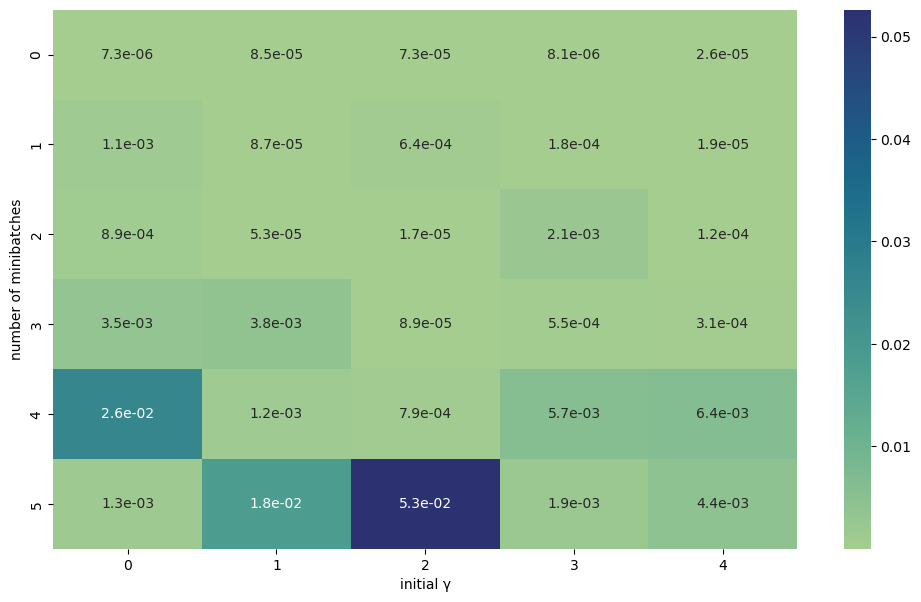

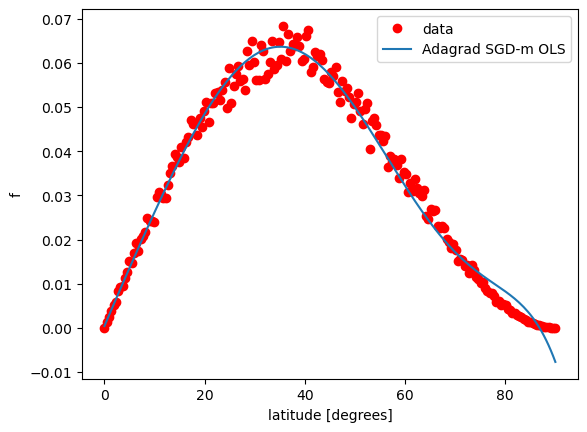

execution time= 3.314018249511719e-05 s


In [2]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 5000 

nsizes= 6
sizes=[1, 2, 4, 8, 16, 32]

ngammas = 5 
gammas = np.logspace(-3, -2, ngammas)

y_OLS_SGD_m_ada_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_m_ada = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    m = int(n/M) #number of minibatches
    
    for g in range(ngammas):
        gamma = gammas[g]

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        beta_OLS = np.random.randn(degree+1,1)

        for epoch in range(n_epochs):

            Giter = np.zeros(shape=(degree+1,degree+1)) 

            change_OLS = 0.0
            delta_momentum = 0.3

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)

                # Calculate the outer product of the gradients
                Giter +=gradient_OLS @ gradient_OLS.T

                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

                # compute update
                update = np.multiply(Ginverse,gradient_OLS)+delta_momentum*change_OLS

                beta_OLS -= update

                # save the change
                change_OLS = update

        y_OLS_SGD_m_ada = X @ beta_OLS
        
        y_OLS_SGD_m_ada_array[s, g] = y_OLS_SGD_m_ada

        MSE_OLS_SGD_m_ada[s, g] = MSE (y_OLS_SGD_m_ada, y_noisy)

#finding the minimum value of the MSE
MSE_OLS_SGD_m_ada_optimal = np.min(MSE_OLS_SGD_m_ada)
conditon = (MSE_OLS_SGD_m_ada == MSE_OLS_SGD_m_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_m_ada_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_m_ada_optimal= y_OLS_SGD_m_ada_array[result]
y_OLS_SGD_m_ada_optimal=(y_OLS_SGD_m_ada_optimal[0])
    
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_m_ada)
mse_data_ols_sgd_m_ada = pd.DataFrame(MSE_OLS_SGD_m_ada)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_m_ada, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_m_ada_optimal, label='Adagrad SGD-m OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#4dii) Adagrad SGD-m Ridge  

(array([0]), array([2]))
method MSE= 6.235980820192465e-06


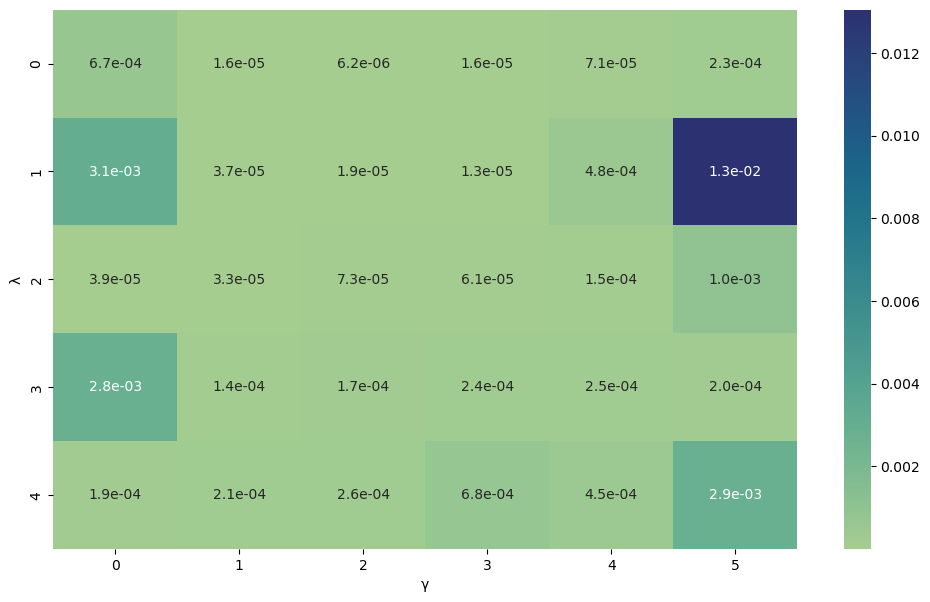

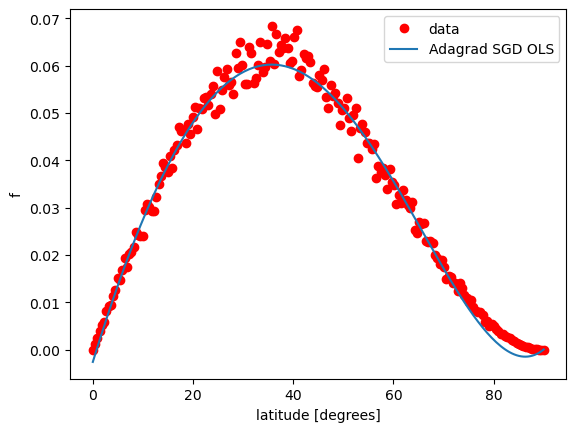

execution time= 2.8848648071289062e-05 s


In [5]:
#Ridge parameter
nlambdas = 5 
lambdas = np.logspace(-5, -1, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, -1, ngammas)

y_Ridge_SGD_m_ada_array = np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_SGD_m_ada = np.zeros((nlambdas, ngammas))

n_epochs = 1000

M=1   
m = int(n/M) #number of minibatches

for l in range(nlambdas):
    lmbda = lambdas[l]
    beta_Ridge = np.random.randn(degree+1,1)    

    # We vary the learning rate
    for g in range(ngammas):
        gamma=gammas[g]

        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8     

        for epoch in range(n_epochs):        
            Giter = np.zeros(shape=(degree+1,degree+1))  

            change_Ridge = 0.0
            delta_momentum = 0.3

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                # Calculate the outer product of the gradients
                Giter +=gradient_Ridge @ gradient_Ridge.T

                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Giter)))]

                # compute update
                update = np.multiply(Ginverse,gradient_Ridge)+delta_momentum*change_Ridge

                beta_Ridge -= update

                # save the change
                change_Ridge = update

        y_Ridge_SGD_m_ada = X @ beta_Ridge
        
        y_Ridge_SGD_m_ada_array[l, g] = y_Ridge_SGD_m_ada

        MSE_Ridge_SGD_m_ada[l, g]=MSE(y_noisy, y_Ridge_SGD_m_ada)    

#finding the minimum value of the MSE
MSE_Ridge_SGD_m_ada_optimal = np.min(MSE_Ridge_SGD_m_ada)
conditon = (MSE_Ridge_SGD_m_ada == MSE_Ridge_SGD_m_ada_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_Ridge_SGD_m_ada_optimal)  

#saving the y that gives the optimal MSE
y_Ridge_SGD_m_ada_optimal= y_Ridge_SGD_m_ada_array[result]
y_Ridge_SGD_m_ada_optimal=(y_Ridge_SGD_m_ada_optimal[0])

pd.DataFrame(MSE_Ridge_SGD_m_ada)
mse_data_ridge_sgd_m_ada = pd.DataFrame(MSE_Ridge_SGD_m_ada)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ridge_sgd_m_ada, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("γ")
plt.ylabel("λ")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_Ridge_SGD_m_ada_optimal, label='Adagrad SGD OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#5ai) RMS-prop SGD OLS  

(array([0]), array([0]))
method MSE= 6.994887178369504e-06


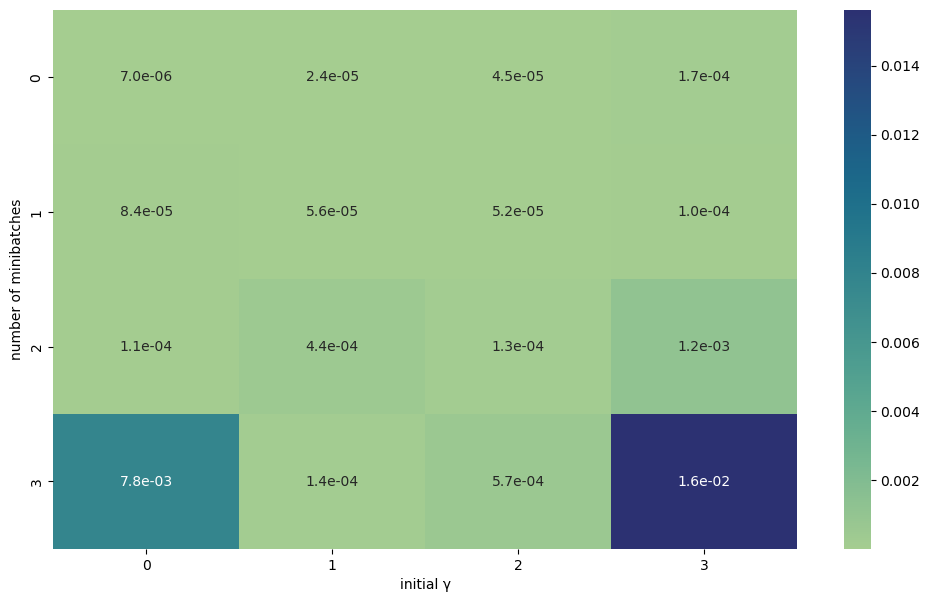

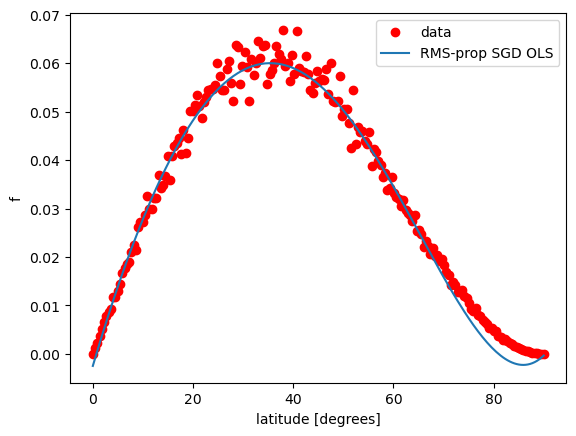

execution time= 4.267692565917969e-05 s


In [1]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 10000

nsizes= 4
sizes=[1, 2, 4, 8]

ngammas = 4 
gammas = np.logspace(-3, -1, ngammas)

y_OLS_SGD_rms_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_rms = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    m = int(n/M) #number of minibatches
    
    for g in range(ngammas):
        gamma = gammas[g]

        beta_OLS = np.random.randn(degree+1,1)

        # Value for parameter rho
        rho = 0.99
        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        for epoch in range(n_epochs):
            Giter = np.zeros(shape=(degree+1,degree+1))

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]
                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)
            # Previous value for the outer product of gradients
                Previous = Giter
            # Accumulated gradient
                Giter +=gradient_OLS @ gradient_OLS.T
            # Scaling with rho the new and the previous results
                Gnew = (rho*Previous+(1-rho)*Giter)
            # Taking the diagonal only and inverting
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Gnew)))]
            # Hadamard product
                update = np.multiply(Ginverse,gradient_OLS)
                beta_OLS -= update

        y_OLS_SGD_rms = X @ beta_OLS
        
        y_OLS_SGD_rms_array[s, g] = y_OLS_SGD_rms

        MSE_OLS_SGD_rms[s, g] = MSE(y_OLS_SGD_rms, y_noisy)
        
#finding the minimum value of the MSE
MSE_OLS_SGD_rms_optimal = np.min(MSE_OLS_SGD_rms)
conditon = (MSE_OLS_SGD_rms == MSE_OLS_SGD_rms_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_rms_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_rms_optimal= y_OLS_SGD_rms_array[result]
y_OLS_SGD_rms_optimal=(y_OLS_SGD_rms_optimal[0])
        
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_rms)
mse_data_ols_sgd_rms = pd.DataFrame(MSE_OLS_SGD_rms)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_rms, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_rms_optimal, label='RMS-prop SGD OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#5aii) RMS-prop SGD Ridge

(array([0]), array([3]))
method MSE= 7.583680389303796e-06


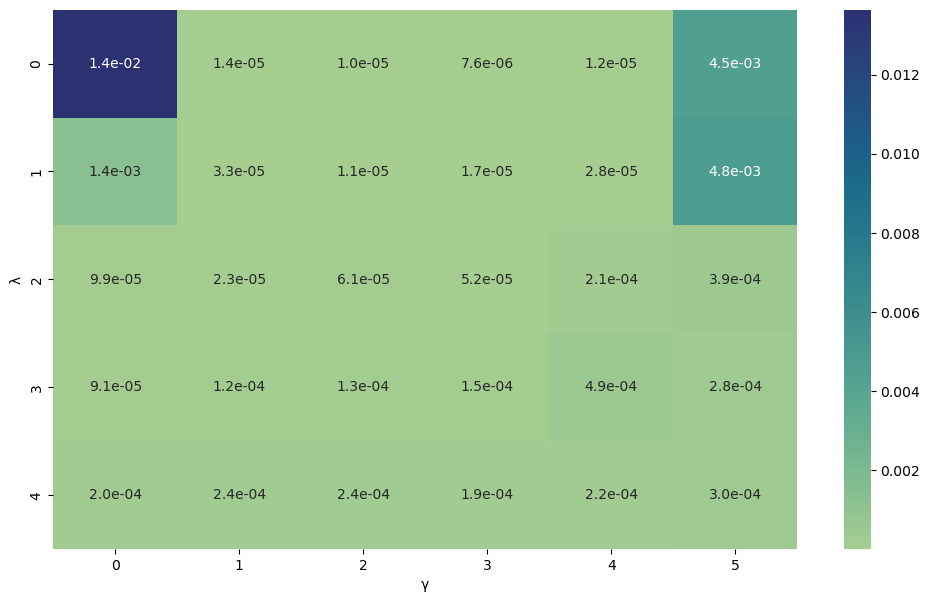

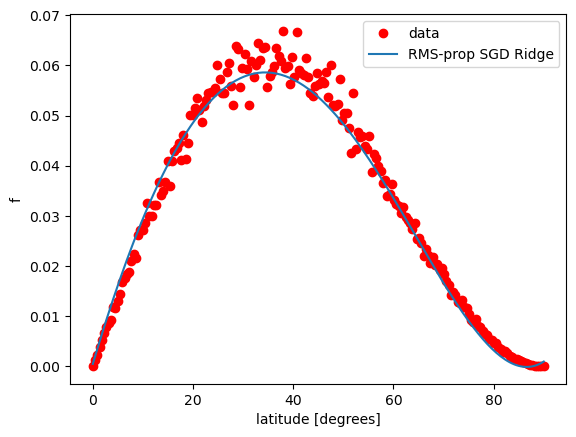

(array([0]), array([2]))
method MSE= 9.225092253054095e-06


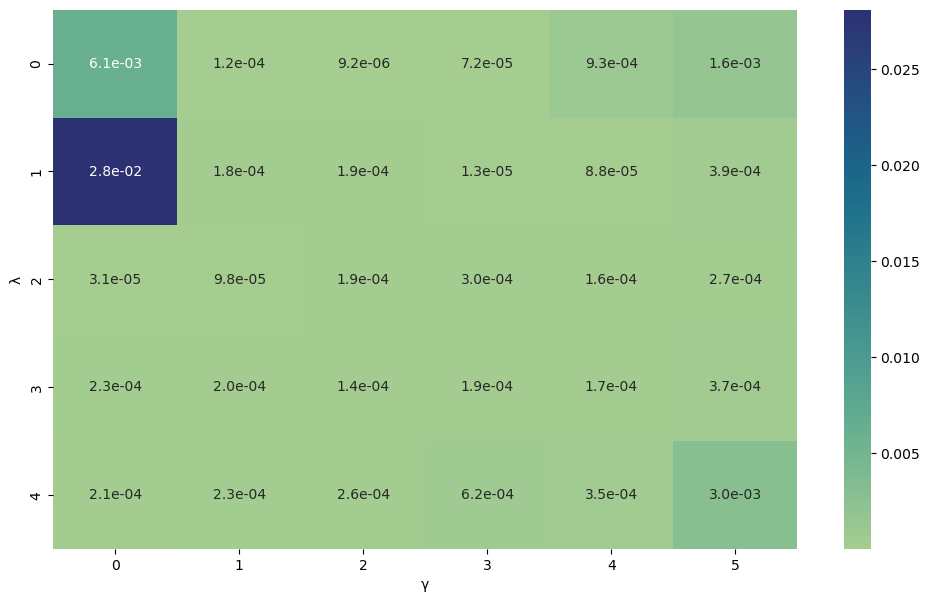

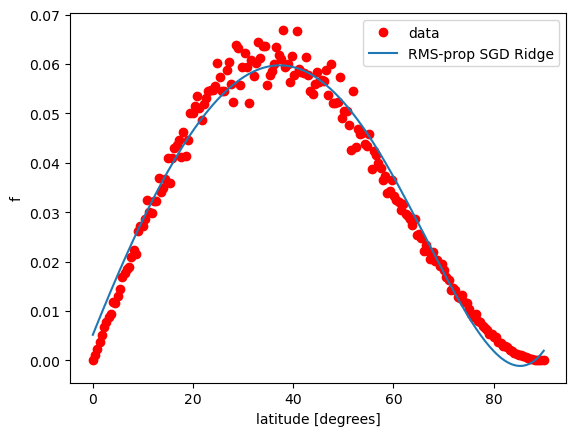

execution time= 2.8848648071289062e-05 s


In [2]:
#Ridge parameter
nlambdas = 5 
lambdas = np.logspace(-5, -1, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, -1, ngammas)

y_Ridge_SGD_rms_array = np.zeros((nlambdas, ngammas), dtype=object)
MSE_Ridge_SGD_rms = np.zeros((nlambdas, ngammas))

n_epochs = 1000

for M in [1, 2]:  
    m = int(n/M) #number of minibatches

    # Value for parameter rho
    rho = 0.9

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge = np.random.randn(degree+1,1)    

        # We vary the learning rate
        for g in range(ngammas):
            gamma=gammas[g]

            for epoch in range(n_epochs):
                Giter = np.zeros(shape=(degree+1,degree+1))    

                for i in range(m):
                    random_index = M*np.random.randint(m)
                    xi = X[random_index:random_index+M]
                    yi = y_noisy[random_index:random_index+M]

                    gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                # Previous value for the outer product of gradients
                    Previous = Giter
                # Accumulated gradient
                    Giter +=gradient_Ridge @ gradient_Ridge.T
                # Scaling with rho the new and the previous results
                    Gnew = (rho*Previous+(1-rho)*Giter)
                # Taking the diagonal only and inverting
                    Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Gnew)))]
                # Hadamard product
                    update = np.multiply(Ginverse,gradient_Ridge)
                    beta_Ridge -= update

            y_Ridge_SGD_rms = X @ beta_Ridge
            
            y_Ridge_SGD_rms_array[l, g] = y_Ridge_SGD_rms

            MSE_Ridge_SGD_rms[l, g]=MSE(y_noisy, y_Ridge_SGD_rms)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_rms_optimal = np.min(MSE_Ridge_SGD_rms)
    conditon = (MSE_Ridge_SGD_rms == MSE_Ridge_SGD_rms_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    print('method MSE=', MSE_Ridge_SGD_rms_optimal)  

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_rms_optimal= y_Ridge_SGD_rms_array[result]
    y_Ridge_SGD_rms_optimal=(y_Ridge_SGD_rms_optimal[0])

    pd.DataFrame(MSE_Ridge_SGD_rms)
    mse_data_ridge_rms = pd.DataFrame(MSE_Ridge_SGD_rms)

    plt.figure(figsize=(12,7))
    sns.heatmap(data=mse_data_ridge_rms, annot=True,  fmt=".1e", cmap="crest")
    plt.xlabel("γ")
    plt.ylabel("λ")
    plt.show()

    plt.figure()
    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_Ridge_SGD_rms_optimal, label='RMS-prop SGD Ridge')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#5bi) RMS-prop SGD-m OLS 

(array([1]), array([1]))
method MSE= 5.047280115311877e-06


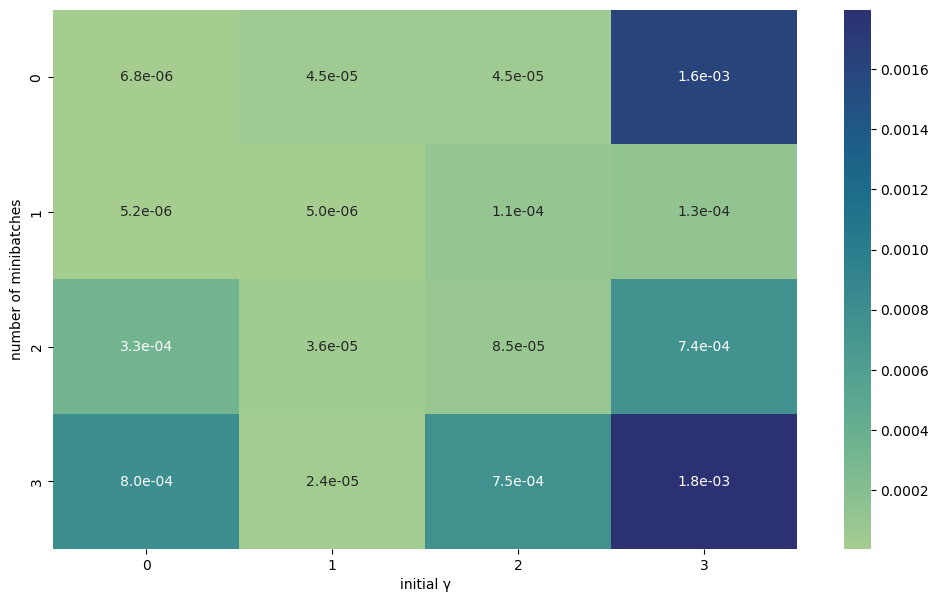

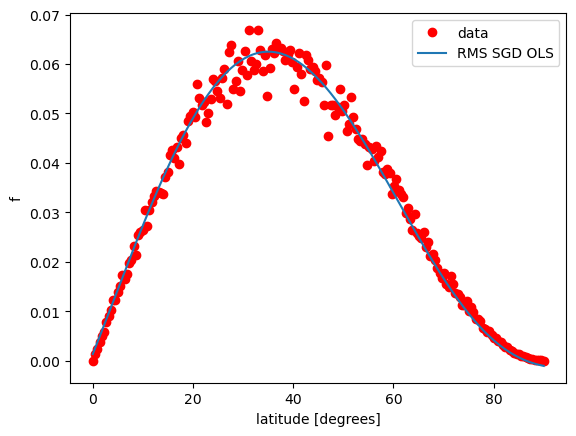

execution time= 3.743171691894531e-05 s


In [4]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 10000

nsizes= 4
sizes=[1, 2, 4, 8]

ngammas = 4 
gammas = np.logspace(-3, -1, ngammas)

y_OLS_SGD_m_rms_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_m_rms = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    m = int(n/M) #number of minibatches
    
    for g in range(ngammas):
        gamma = gammas[g]

        beta_OLS = np.random.randn(degree+1,1)

        # Value for parameter rho
        rho = 0.99
        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        for epoch in range(n_epochs):
            Giter = np.zeros(shape=(degree+1,degree+1))

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

            # print(gamma_OLS)   
                change_OLS = 0.0
                delta_momentum = 0.3    

                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)
            # Previous value for the outer product of gradients
                Previous = Giter
            # Accumulated gradient
                Giter +=gradient_OLS @ gradient_OLS.T
            # Scaling with rho the new and the previous results
                Gnew = (rho*Previous+(1-rho)*Giter)
            # Taking the diagonal only and inverting
                Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Gnew)))]
            # Hadamard product
                update = np.multiply(Ginverse,gradient_OLS)+delta_momentum*change_OLS

                beta_OLS -= update

            # save the change
                change_OLS = update

        y_OLS_SGD_m_rms = X @ beta_OLS
        
        y_OLS_SGD_m_rms_array[s, g] = y_OLS_SGD_m_rms

        MSE_OLS_SGD_m_rms[s, g] = MSE(y_OLS_SGD_m_rms, y_noisy)
        #print(MSE_OLS_SGD)

#finding the minimum value of the MSE
MSE_OLS_SGD_m_rms_optimal = np.min(MSE_OLS_SGD_m_rms)
conditon = (MSE_OLS_SGD_m_rms == MSE_OLS_SGD_m_rms_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_m_rms_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_m_rms_optimal= y_OLS_SGD_m_rms_array[result]
y_OLS_SGD_m_rms_optimal=(y_OLS_SGD_m_rms_optimal[0])        

import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_m_rms)
mse_data_ols_sgd_m_rms = pd.DataFrame(MSE_OLS_SGD_m_rms)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_m_rms, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_m_rms_optimal, label='RMS SGD OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#5bii) RMS-prop SGD-m Ridge

(array([0]), array([0]))
method MSE= 5.487081825972727e-06


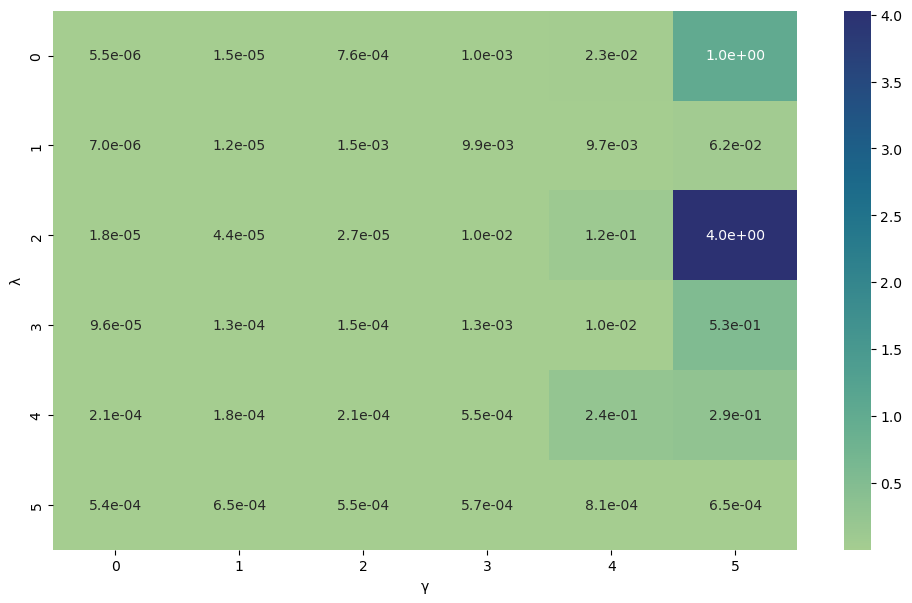

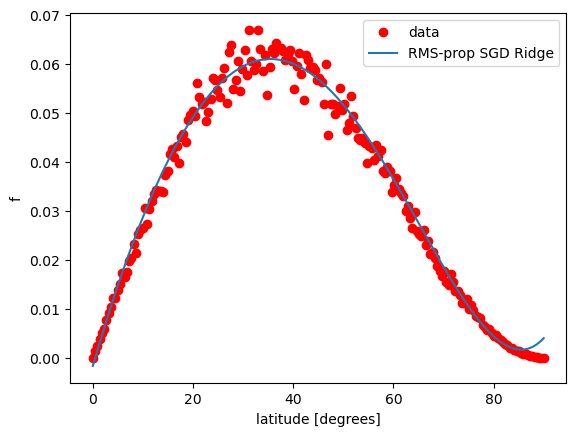

(array([0]), array([0]))
method MSE= 6.008519991554889e-06


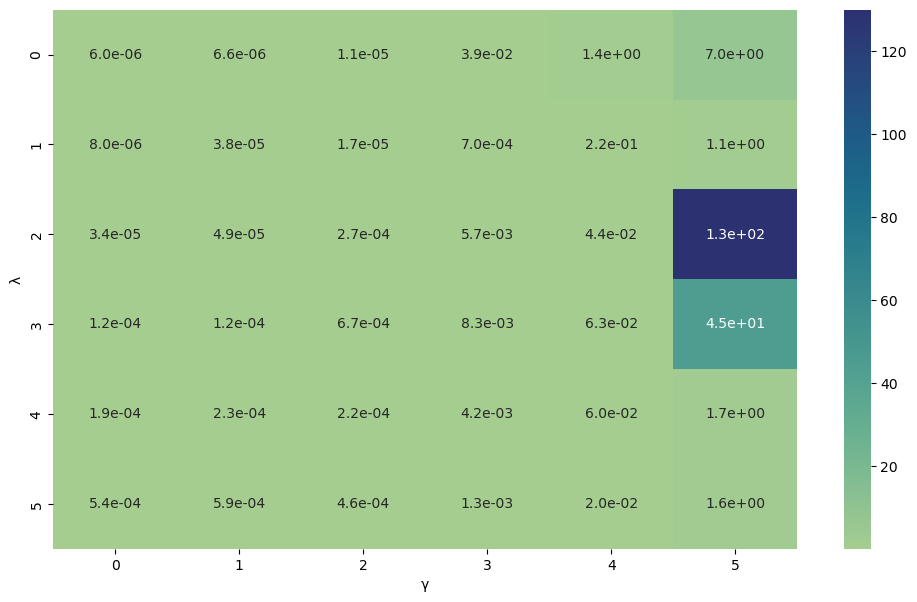

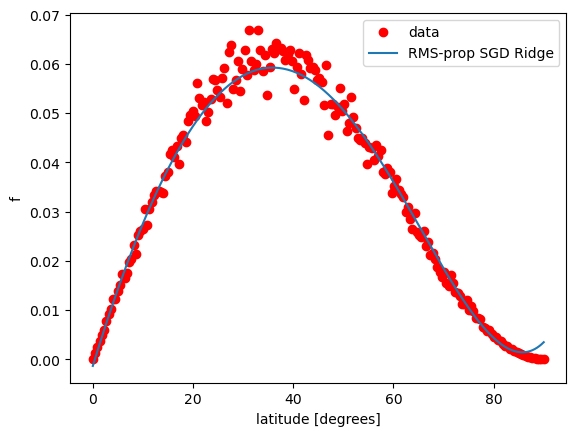

(array([1]), array([0]))
method MSE= 9.883841331450617e-06


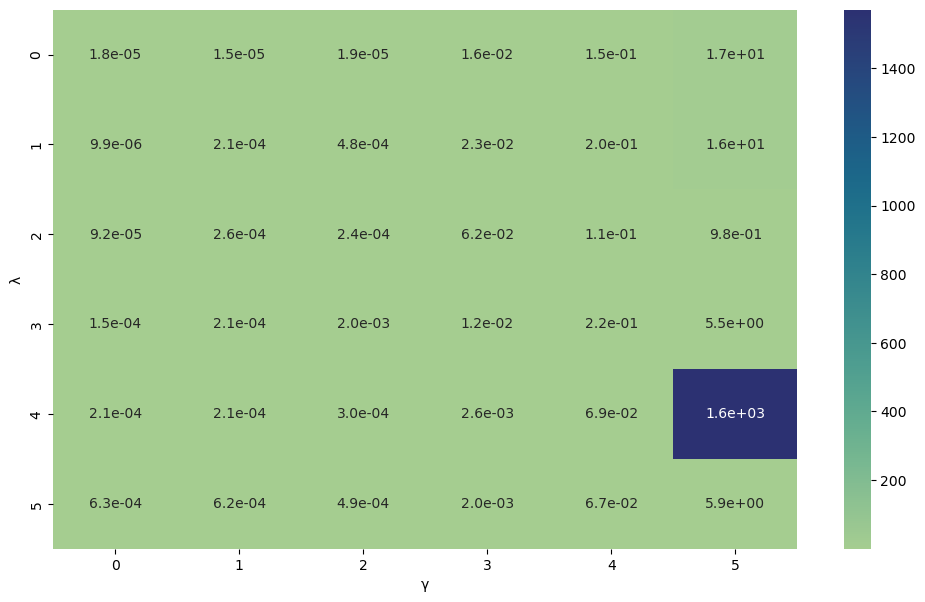

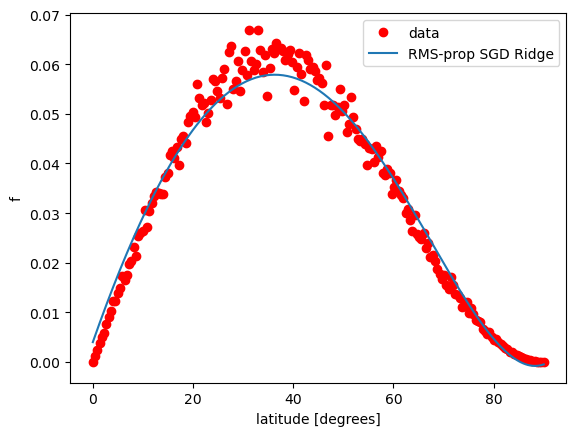

execution time= 3.266334533691406e-05 s


In [5]:
#Ridge parameter
nlambdas = 6 
lambdas = np.logspace(-5, 0, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, 1, ngammas)

n_epochs = 10000

for M in [1, 2, 4]:  
    m = int(n/M) #number of minibatches

    # Value for parameter rho
    rho = 0.9

    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8
    
    y_Ridge_SGD_m_rms_array = np.zeros((nlambdas, ngammas), dtype=object)
    MSE_Ridge_SGD_m_rms = np.zeros((nlambdas, ngammas))

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge = np.random.randn(degree+1,1)    

        # We vary the learning rate
        for g in range(ngammas):
            gamma=gammas[g]
    
            for epoch in range(n_epochs):
                Giter = np.zeros(shape=(degree+1,degree+1))
                for i in range(m):
                    random_index = M*np.random.randint(m)
                    xi = X[random_index:random_index+M]
                    yi = y_noisy[random_index:random_index+M]

                    change_OLS = 0.0
                    delta_momentum = 0.3

                    gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                # Previous value for the outer product of gradients
                    Previous = Giter
                # Accumulated gradient
                    Giter +=gradient_Ridge @ gradient_Ridge.T
                # Scaling with rho the new and the previous results
                    Gnew = (rho*Previous+(1-rho)*Giter)
                # Taking the diagonal only and inverting
                    Ginverse = np.c_[gamma/(delta+np.sqrt(np.diagonal(Gnew)))]
                # Hadamard product
                    update = np.multiply(Ginverse,gradient_Ridge)+delta_momentum*change_OLS

                    beta_Ridge -= update

                     # save the change
                    change_OLS = update


            y_Ridge_SGD_m_rms = X @ beta_Ridge
            
            y_Ridge_SGD_m_rms_array[l, g] = y_Ridge_SGD_m_rms

            MSE_Ridge_SGD_m_rms[l, g]=MSE(y_noisy, y_Ridge_SGD_m_rms)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_m_rms_optimal = np.min(MSE_Ridge_SGD_m_rms)
    conditon = (MSE_Ridge_SGD_m_rms == MSE_Ridge_SGD_m_rms_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    print('method MSE=', MSE_Ridge_SGD_m_rms_optimal)  

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_m_rms_optimal= y_Ridge_SGD_m_rms_array[result]
    y_Ridge_SGD_m_rms_optimal=(y_Ridge_SGD_m_rms_optimal[0])

    pd.DataFrame(MSE_Ridge_SGD_m_rms)
    mse_data_ridge_sgd_m_rms = pd.DataFrame(MSE_Ridge_SGD_m_rms)

    plt.figure(figsize=(12,7))
    sns.heatmap(data=mse_data_ridge_sgd_m_rms, annot=True,  fmt=".1e", cmap="crest")
    plt.xlabel("γ")
    plt.ylabel("λ")
    plt.show()

    plt.figure()
    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_Ridge_SGD_m_rms_optimal, label='RMS-prop SGD Ridge')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#6ai) ADAM SGD OLS  

(array([1]), array([0]))
method MSE= 4.591847089876672e-06
[array([[-0.00122519],
        [ 0.18955132],
        [-0.16493925],
        [ 0.19648646],
        [-0.43745019],
        [ 0.33455409],
        [-0.07892891]])]


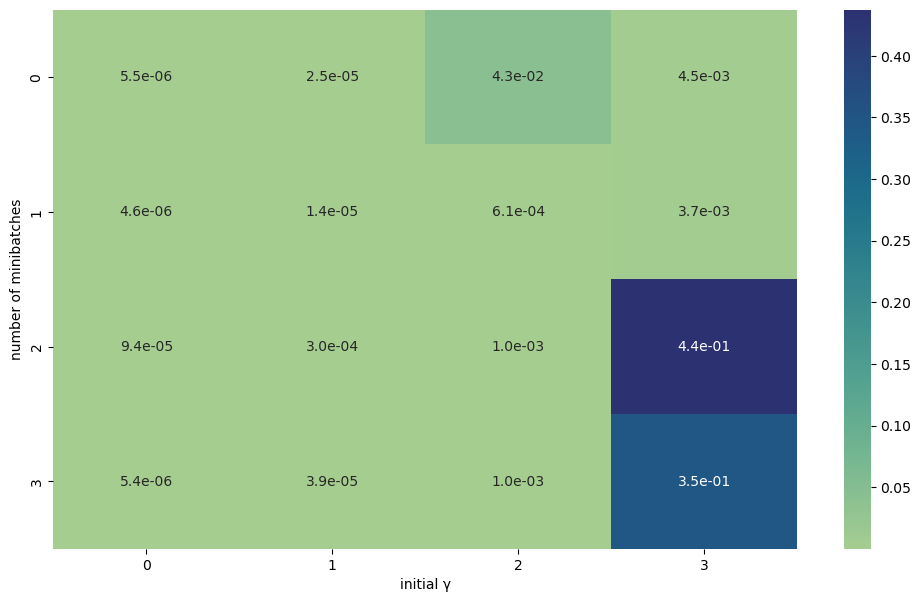

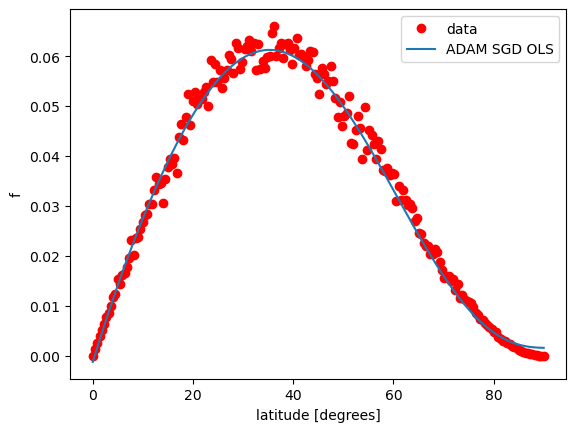

execution time= 3.1948089599609375e-05 s


In [10]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 100000

nsizes= 4
sizes=[1, 2, 4, 8]

ngammas = 4 
gammas = np.logspace(-3, -1, ngammas)

beta_OLS_array = np.zeros((nsizes, ngammas), dtype=object)
y_OLS_SGD_adam_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_adam = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    m = int(n/M) #number of minibatches
    
    for g in range(ngammas):
        gamma = gammas[g]

        beta_OLS = np.random.randn(degree+1,1)

        # Value for parameter rho_1
        rho_1 = 0.9
        # Value for parameter rho_2
        rho_2 = 0.999
        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        for epoch in range(n_epochs):
            Giter_1 = np.zeros(shape=(degree+1,1))
            Giter_2 = np.zeros(shape=(degree+1,1))

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi)
                #print(np.shape(gradient_OLS))

                Previous_1= Giter_1
                #print(np.shape(Previous_1))

                Giter_1= gradient_OLS

                #update 1st momentum:        
                Gnew_1 = rho_1*Previous_1+(1-rho_1)*gradient_OLS
                #print(np.shape(Gnew_1))

                # Previous value for the outer product of gradients
                Previous_2 = Giter_2
                
                # Accumulated gradient
                Giter_2 += np.multiply(gradient_OLS, gradient_OLS)# @ gradient_OLS.T

                #update 2nd momentum:
                Gnew_2 = rho_2*Previous_2+(1-rho_2)*Giter_2

                #correction of 1st momentum bias:
                Gnew_1_bias= Gnew_1/(1.0-rho_1**epoch+1)

                #correction of 2nd momentum bias:
                Gnew_2_bias= Gnew_2/(1.0-rho_2**epoch+1)        

                # Hadamard product
                update = np.c_[gamma*Gnew_1_bias/(delta+np.sqrt(np.diagonal(Gnew_2_bias)))]

                beta_OLS -= update
                
        #storing every β for each M, γ combination
        beta_OLS_array[s, g] =beta_OLS
        
        y_OLS_SGD_adam = X @ beta_OLS
        
        y_OLS_SGD_adam_array[s, g] = y_OLS_SGD_adam

        MSE_OLS_SGD_adam[s, g] = MSE(y_OLS_SGD_adam, y_noisy)
        
#finding the minimum value of the MSE
MSE_OLS_SGD_adam_optimal = np.min(MSE_OLS_SGD_adam)
conditon = (MSE_OLS_SGD_adam == MSE_OLS_SGD_adam_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_adam_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_adam_optimal= y_OLS_SGD_adam_array[result]
y_OLS_SGD_adam_optimal=(y_OLS_SGD_adam_optimal[0])

#printing the final β 
beta_OLS_optimal = beta_OLS_array[result]
print(beta_OLS_optimal)
        
import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_adam)
mse_data_ols_sgd_adam = pd.DataFrame(MSE_OLS_SGD_adam)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_adam, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_adam_optimal, label='ADAM SGD OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [122]:
#6aii) ADAM SGD Ridge

(array([1]), array([0]))
method MSE= 5.015987340225584e-06


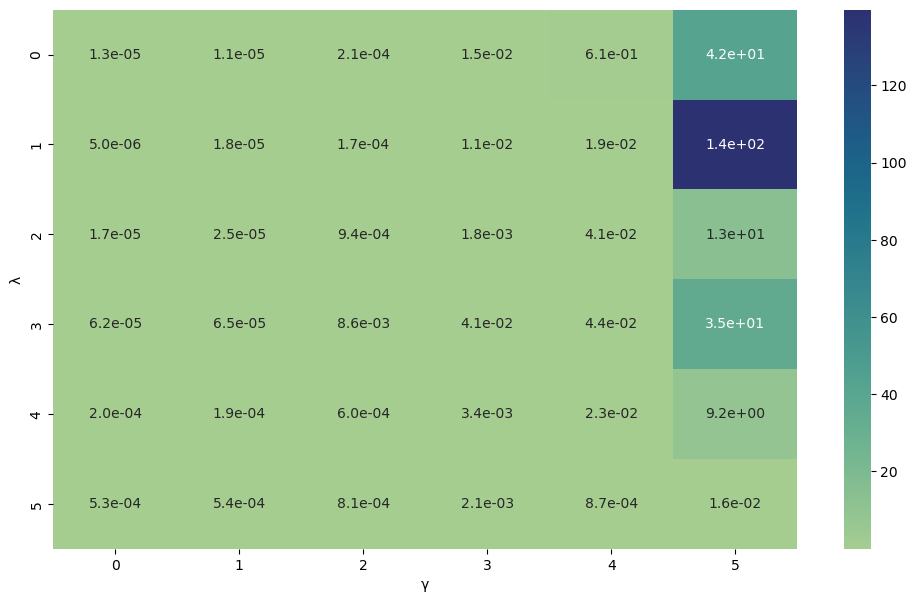

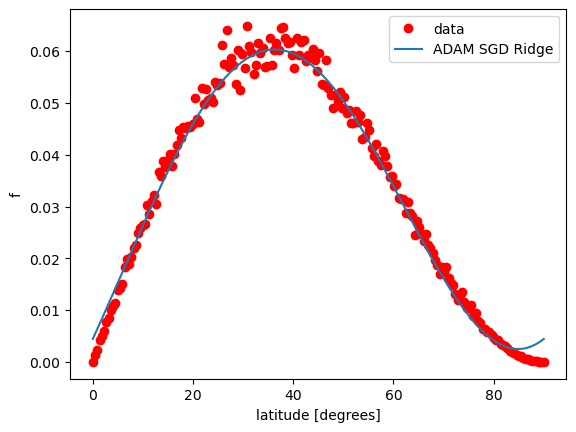

(array([0]), array([1]))
method MSE= 6.338243275146856e-06


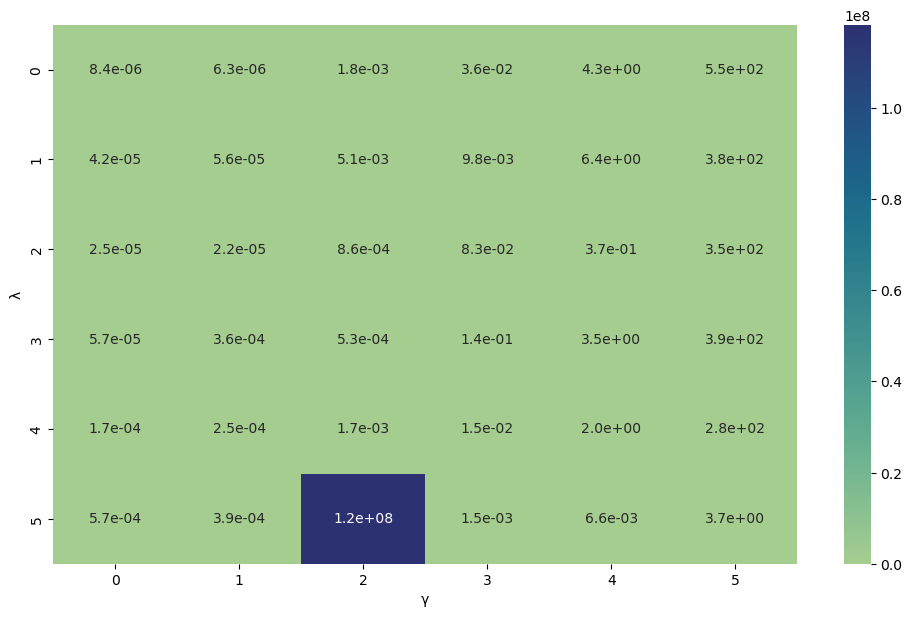

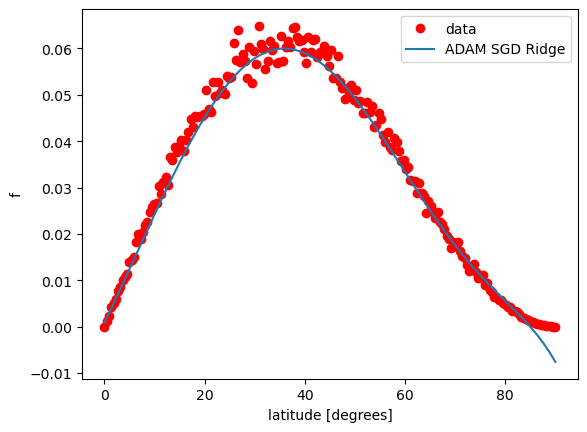

(array([1]), array([0]))
method MSE= 1.993066670334754e-05


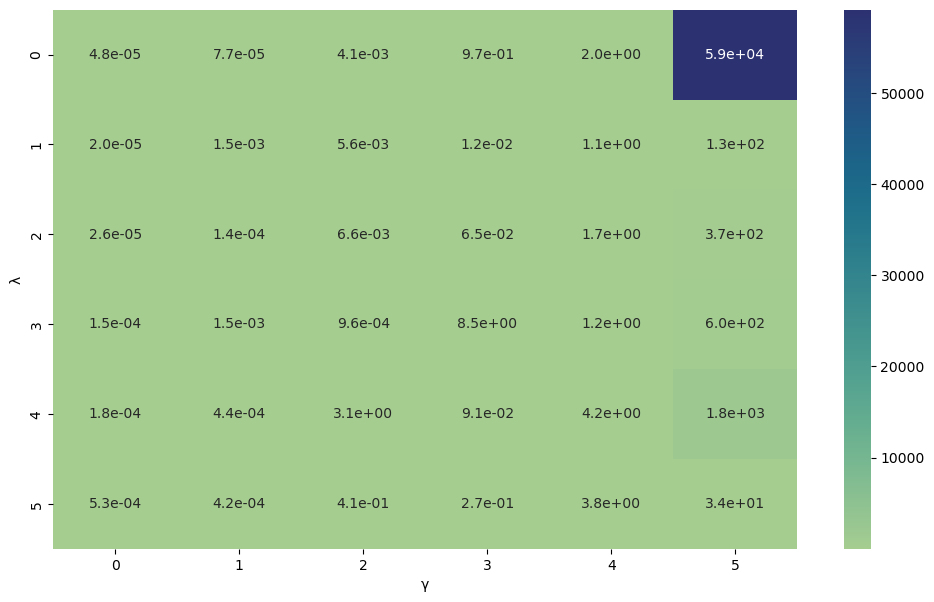

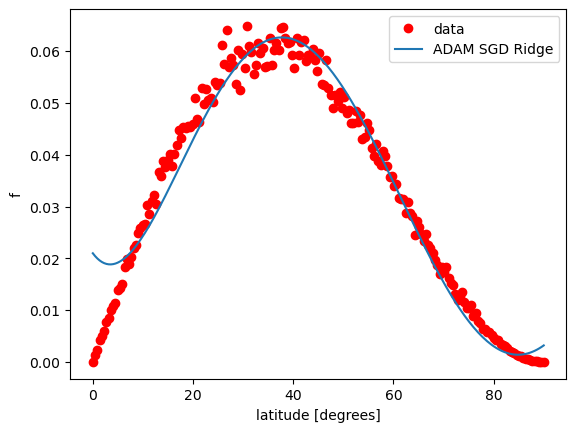

execution time= 3.123283386230469e-05 s


In [7]:
#Ridge parameter
nlambdas = 6 
lambdas = np.logspace(-5, 0, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, 1, ngammas)

n_epochs = 10000

for M in [1, 2, 4]:  
    m = int(n/M) #number of minibatches

    beta_Ridge = np.random.randn(degree+1,1)
    
    y_Ridge_SGD_adam_array = np.zeros((nlambdas, ngammas), dtype=object)
    MSE_Ridge_SGD_adam = np.zeros((nlambdas, ngammas))

    # Value for parameter rho_1
    rho_1 = 0.9
    # Value for parameter rho_2
    rho_2 = 0.999
    
    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge = np.random.randn(degree+1,1)    
                
        # We vary the learning rate
        for g in range(ngammas):
            gamma=gammas[g] 

            for epoch in range(n_epochs):
                Giter_1 = np.zeros(shape=(degree+1,1))    
                Giter_2 = np.zeros(shape=(degree+1,1))

                for i in range(m):
                    random_index = M*np.random.randint(m)
                    xi = X[random_index:random_index+M]
                    yi = y_noisy[random_index:random_index+M]

                    gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                    Previous_1= Giter_1
                    #print(np.shape(Previous_1))

                    Giter_1= gradient_Ridge

                    #update 1st momentum:        
                    Gnew_1 = rho_1*Previous_1+(1-rho_1)*gradient_Ridge
                    #print(np.shape(Gnew_1))

                    # Previous value for the outer product of gradients
                    Previous_2 = Giter_2

                    # Accumulated gradient
                    Giter_2 += np.multiply(gradient_Ridge, gradient_Ridge)# @ gradient_OLS.T

                    #update 2nd momentum:
                    Gnew_2 = rho_2*Previous_2+(1-rho_2)*Giter_2

                    #correction of 1st momentum bias:
                    Gnew_1_bias= Gnew_1/(1.0-rho_1**epoch+1)#<-or maybe epochs??see the video
                    #print(np.shape(Gnew_1_bias))

                    #correction of 2nd momentum bias:
                    Gnew_2_bias= Gnew_2/(1.0-rho_2**epoch+1)        

                    # Hadamard product
                    update = np.c_[gamma*Gnew_1_bias/(delta+np.sqrt(np.diagonal(Gnew_2_bias)))]

                    beta_Ridge -= update

            y_Ridge_SGD_adam = X @ beta_Ridge
            
            y_Ridge_SGD_adam_array[l, g]= y_Ridge_SGD_adam

            MSE_Ridge_SGD_adam[l, g]=MSE(y_noisy, y_Ridge_SGD_adam)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_adam_optimal = np.min(MSE_Ridge_SGD_adam)
    conditon = (MSE_Ridge_SGD_adam == MSE_Ridge_SGD_adam_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    print('method MSE=', MSE_Ridge_SGD_adam_optimal)  

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_adam_optimal= y_Ridge_SGD_adam_array[result]
    y_Ridge_SGD_adam_optimal=(y_Ridge_SGD_adam_optimal[0])

    pd.DataFrame(MSE_Ridge_SGD_adam)
    mse_data_ridge_sgd_adam = pd.DataFrame(MSE_Ridge_SGD_adam)

    plt.figure(figsize=(12,7))
    sns.heatmap(data=mse_data_ridge_sgd_adam, annot=True,  fmt=".1e", cmap="crest")
    plt.xlabel("γ")
    plt.ylabel("λ")
    plt.show()

    plt.figure()
    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_Ridge_SGD_adam_optimal, label='ADAM SGD Ridge')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#6bi) ADAM SGD-m OLS

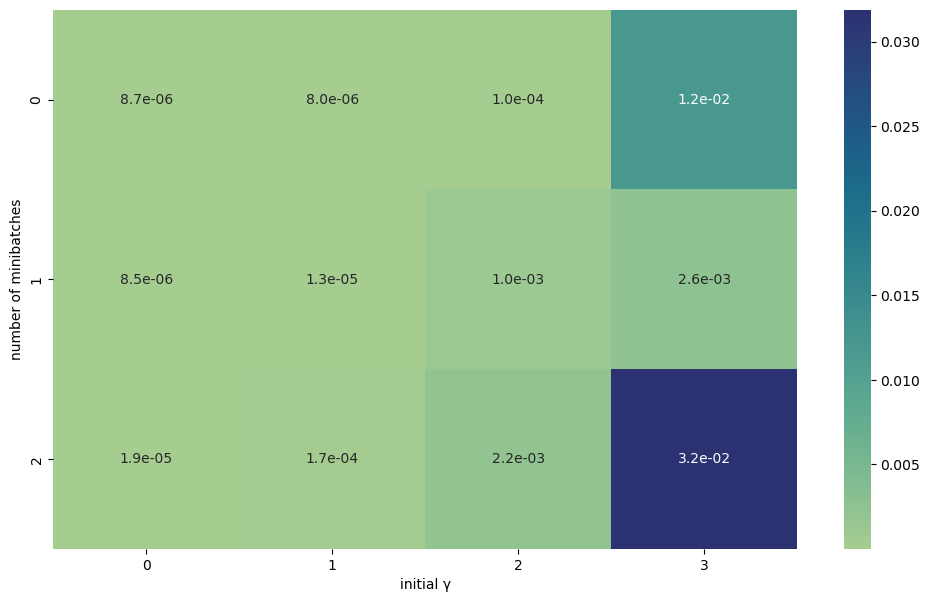

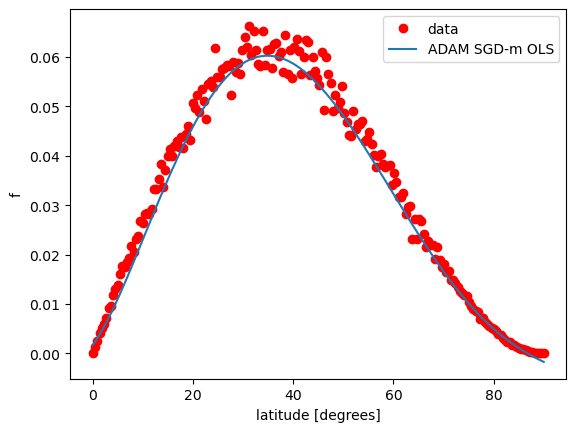

In [2]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import exp, sqrt
from random import random, seed

#grid size
n = 200 

# Make data set.
x = np.linspace(0,(np.pi)/2,n).reshape(-1, 1)

#Northern H. parameters
s0 = 1
s2 = -0.473
a0 = 0.675
a2 = -0.192
i2 = -0.165

#flux function (eqn. (14) from Stone_1978)
y = 0.5*(s0*a2+s2*a0+(2/7)*s2*a2-i2)*((np.sin(x))**3-np.sin(x))

#noisy flux function
y_noisy = np.random.normal(y, abs(y*0.05)) 

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#polynomial fit
degree=6
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(x)

# Hessian matrix
H = (2.0/n)* X.T @ X
invH = np.linalg.pinv(H)

# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)

n_epochs = 10000

nsizes= 3
sizes=[1, 2, 4]

ngammas = 4 
gammas = np.logspace(-3, -1, ngammas)

y_OLS_SGD_m_adam_array = np.zeros((nsizes, ngammas), dtype=object)
MSE_OLS_SGD_m_adam = np.zeros((nsizes, ngammas))
    
for s in range(nsizes):
    M=sizes[s] #we vary the size of the minibatches
    m = int(n/M) #number of minibatches
    
    for g in range(ngammas):
        gamma = gammas[g]

        beta_OLS = np.random.randn(degree+1,1)

        # Value for parameter rho_1
        rho_1 = 0.9
        # Value for parameter rho_2
        rho_2 = 0.999
        
        # Including AdaGrad parameter to avoid possible division by zero
        delta  = 1e-8

        for epoch in range(n_epochs):
            Giter_1 = np.zeros(shape=(degree+1,1))
            Giter_2 = np.zeros(shape=(degree+1,1))

            for i in range(m):
                random_index = M*np.random.randint(m)
                xi = X[random_index:random_index+M]
                yi = y_noisy[random_index:random_index+M]

                change_OLS = 0.0
                delta_momentum = 0.3   

                gradient_OLS = (2.0/M)* xi.T @ ((xi @ beta_OLS)-yi) #(6, 1)
                #print(np.shape(gradient_OLS))

                Previous_1= Giter_1
                #print(np.shape(Previous_1))

                Giter_1= gradient_OLS

                #update 1st momentum:        
                Gnew_1 = rho_1*Previous_1+(1-rho_1)*gradient_OLS
                #print(np.shape(Gnew_1))

                # Previous value for the outer product of gradients
                Previous_2 = Giter_2
                # Accumulated gradient
                Giter_2 += np.multiply(gradient_OLS, gradient_OLS)# @ gradient_OLS.T

                #update 2nd momentum:
                Gnew_2 = rho_2*Previous_2+(1-rho_2)*Giter_2

                #correction of 1st momentum bias:
                Gnew_1_bias= Gnew_1/(1.0-rho_1**epoch+1)#<-or maybe epochs??see the video
                #print(np.shape(Gnew_1_bias))

                #correction of 2nd momentum bias:
                Gnew_2_bias= Gnew_2/(1.0-rho_2**epoch+1)        

                # Hadamard product
                update = np.c_[gamma*Gnew_1_bias/(delta+np.sqrt(np.diagonal(Gnew_2_bias)))]+delta_momentum*change_OLS

                beta_OLS -= update

                # save the change
                change_OLS = update
        
        y_OLS_SGD_m_adam = X @ beta_OLS
        
        y_OLS_SGD_m_adam_array[s, g]= y_OLS_SGD_m_adam

        MSE_OLS_SGD_m_adam[s, g] = MSE(y_OLS_SGD_m_adam, y_noisy)
        
#finding the minimum value of the MSE
MSE_OLS_SGD_m_adam_optimal = np.min(MSE_OLS_SGD_m_adam)
conditon = (MSE_OLS_SGD_m_adam == MSE_OLS_SGD_m_adam_optimal)
#the l, g for which we have the minimum MSE
result = np.where(conditon)
print(result)

print('method MSE=', MSE_OLS_SGD_m_adam_optimal)  

#saving the y that gives the optimal MSE
y_OLS_SGD_m_adam_optimal= y_OLS_SGD_m_adam_array[result]
y_OLS_SGD_m_adam_optimal=(y_OLS_SGD_m_adam_optimal[0])

import pandas as pd
import seaborn as sns

pd.DataFrame(MSE_OLS_SGD_m_adam)
mse_data_ols_sgd_m_adam = pd.DataFrame(MSE_OLS_SGD_m_adam)

plt.figure(figsize=(12,7))
sns.heatmap(data=mse_data_ols_sgd_m_adam, annot=True,  fmt=".1e", cmap="crest")
plt.xlabel("initial γ")
plt.ylabel("number of minibatches")
plt.show()

plt.figure()
plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
plt.plot(x*180/np.pi, y_OLS_SGD_m_adam_optimal, label='ADAM SGD-m OLS')
plt.xlabel('latitude [degrees]')
plt.ylabel('f')
plt.legend()
plt.show()

#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')

In [ ]:
#6bii) ADAM SGD-m Ridge

0.0001 0.00630957344480193


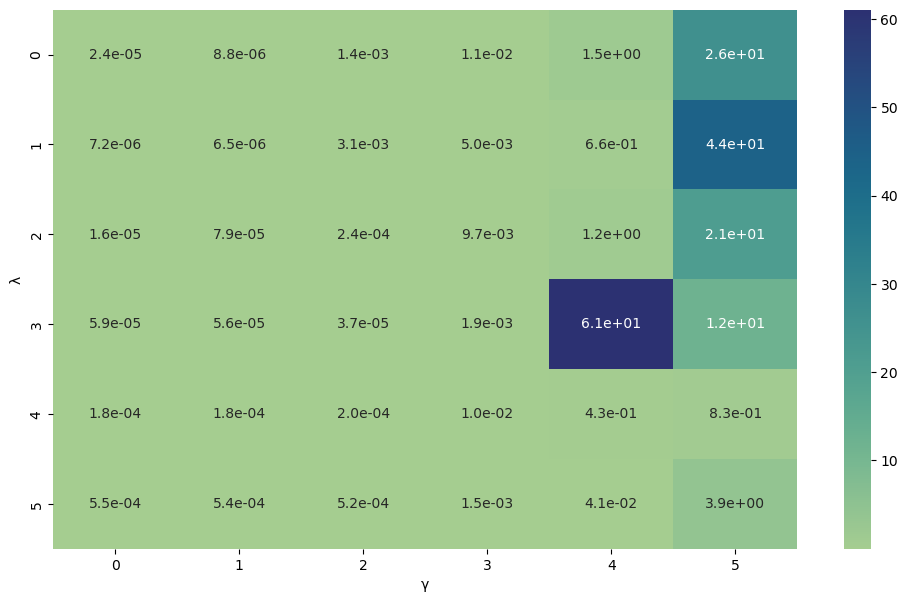

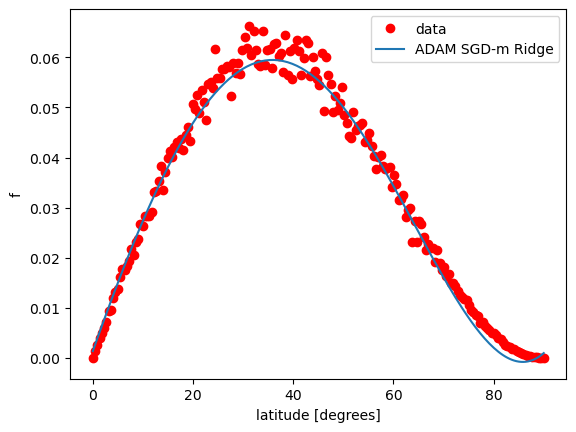

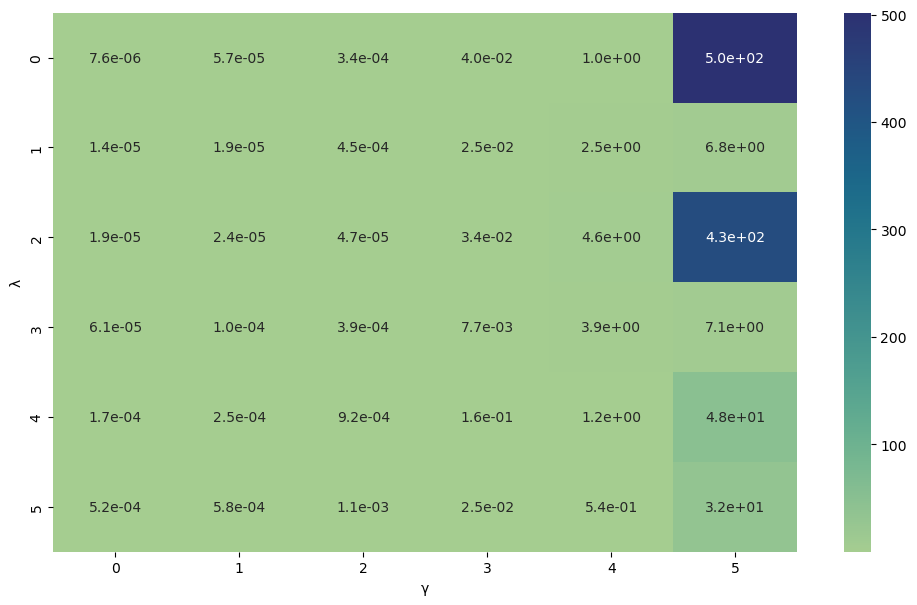

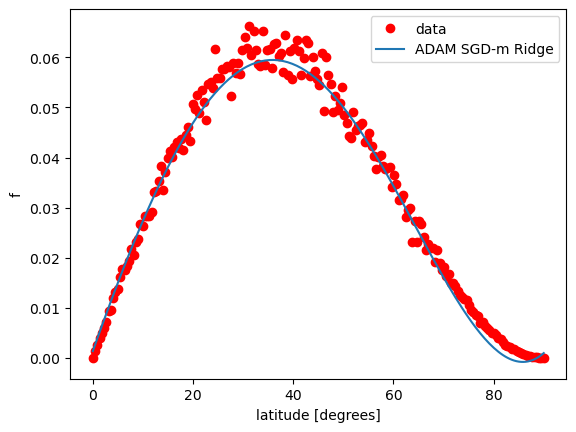

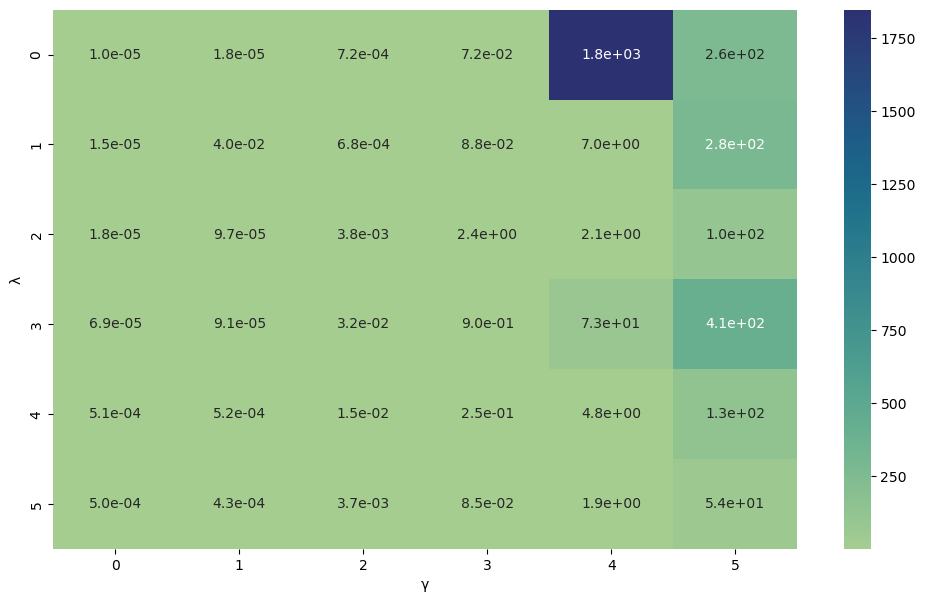

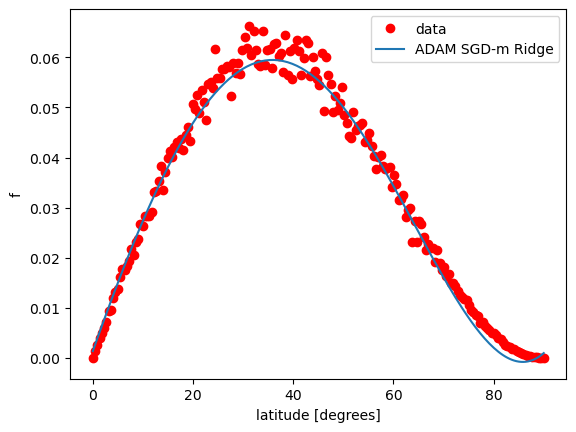

In [4]:
#Ridge parameter
nlambdas = 6 
lambdas = np.logspace(-5, 0, nlambdas)

ngammas = 6 
gammas = np.logspace(-3, 1, ngammas)

n_epochs = 10000

for M in [1, 2, 4]:  
    m = int(n/M) #number of minibatches

    beta_Ridge = np.random.randn(degree+1,1)
    
    y_Ridge_SGD_m_adam_array = np.zeros((nlambdas, ngammas), dtype=object)
    MSE_Ridge_SGD_m_adam = np.zeros((nlambdas, ngammas))

    # Value for parameter rho_1
    rho_1 = 0.9
    # Value for parameter rho_2
    rho_2 = 0.999
    
    # Including AdaGrad parameter to avoid possible division by zero
    delta  = 1e-8

    for l in range(nlambdas):
        lmbda = lambdas[l]
        beta_Ridge = np.random.randn(degree+1,1) 
        
        # We vary the learning rate
        for g in range(ngammas):
            gamma=gammas[g] 

            for epoch in range(n_epochs):
                Giter_1 = np.zeros(shape=(degree+1,1))    
                Giter_2 = np.zeros(shape=(degree+1,1))

                for i in range(m):
                    random_index = M*np.random.randint(m)
                    xi = X[random_index:random_index+M]
                    yi = y_noisy[random_index:random_index+M]

                    change_Ridge = 0.0
                    delta_momentum = 0.3   

                    gradient_Ridge = (2.0/M)*xi.T @ (xi @ (beta_Ridge)-yi)+2*lmbda*beta_Ridge

                    Previous_1= Giter_1
                    #print(np.shape(Previous_1))

                    Giter_1= gradient_Ridge

                    #update 1st momentum:        
                    Gnew_1 = rho_1*Previous_1+(1-rho_1)*gradient_Ridge
                    #print(np.shape(Gnew_1))

                    # Previous value for the outer product of gradients
                    Previous_2 = Giter_2
                    # Accumulated gradient
                    Giter_2 += np.multiply(gradient_Ridge, gradient_Ridge)# @ gradient_OLS.T

                    #update 2nd momentum:
                    Gnew_2 = rho_2*Previous_2+(1-rho_2)*Giter_2

                    #correction of 1st momentum bias:
                    Gnew_1_bias= Gnew_1/(1.0-rho_1**epoch+1)#<-or maybe epochs??see the video
                    #print(np.shape(Gnew_1_bias))

                    #correction of 2nd momentum bias:
                    Gnew_2_bias= Gnew_2/(1.0-rho_2**epoch+1)        

                    # Hadamard product
                    update = np.c_[gamma*Gnew_1_bias/(delta+np.sqrt(np.diagonal(Gnew_2_bias)))]+delta_momentum*change_Ridge

                    beta_Ridge -= update

                    # save the change
                    change_Ridge = update

            y_Ridge_SGD_m_adam = X @ beta_Ridge
            
            y_Ridge_SGD_m_adam_array[l, g]= y_Ridge_SGD_m_adam

            MSE_Ridge_SGD_m_adam[l, g]=MSE(y_noisy, y_Ridge_SGD_m_adam)    

    #finding the minimum value of the MSE
    MSE_Ridge_SGD_m_adam_optimal = np.min(MSE_Ridge_SGD_m_adam)
    conditon = (MSE_Ridge_SGD_m_adam == MSE_Ridge_SGD_m_adam_optimal)
    #the l, g for which we have the minimum MSE
    result = np.where(conditon)
    print(result)

    print('method MSE=', MSE_Ridge_SGD_m_adam_optimal)  

    #saving the y that gives the optimal MSE
    y_Ridge_SGD_m_adam_optimal= y_Ridge_SGD_m_adam_array[result]
    y_Ridge_SGD_m_adam_optimal=(y_Ridge_SGD_m_adam_optimal[0])

            
    pd.DataFrame(MSE_Ridge_SGD_m_adam)
    mse_data_ridge_sgd_m_adam = pd.DataFrame(MSE_Ridge_SGD_m_adam)

    plt.figure(figsize=(12,7))
    sns.heatmap(data=mse_data_ridge_sgd_m_adam, annot=True,  fmt=".1e", cmap="crest")
    plt.xlabel("γ")
    plt.ylabel("λ")
    plt.show()

    plt.figure()
    plt.plot(x*180/np.pi, y_noisy, 'ro', label='data')
    plt.plot(x*180/np.pi, y_Ridge_SGD_m_adam_optimal, label='ADAM SGD-m Ridge')
    plt.xlabel('latitude [degrees]')
    plt.ylabel('f')
    plt.legend()
    plt.show()
    
#Calculating the time processing time
import time
start_time = time.time()
print("execution time=", (time.time() - start_time), 's')